---
title: Final Project Methods, Exploratory Data Analysis
author: Sophie Seiple, Julia Joy, Lindsey Schweitzer
date: '2024-01-01'
description: "Visualizing the data we used."
bibliography: refs.bib
format: html
---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
allergies = pd.read_csv('allergies.csv')
cancer = pd.read_csv('cancer.csv')
careplans = pd.read_csv('careplans.csv')
claims = pd.read_csv('claims.csv')
conditions = pd.read_csv('conditions.csv')
diabetes = pd.read_csv('diabetes.csv')
encounters = pd.read_csv('encounters.csv') 
etc = pd.read_csv('etc.csv')
heart = pd.read_csv('heart.csv')
immunizations = pd.read_csv('immunizations.csv')
lungs = pd.read_csv('lungs.csv')
medications = pd.read_csv('medications.csv')
observations = pd.read_csv('observations.csv')
patients = pd.read_csv('patients.csv')
pregnancy = pd.read_csv('pregnancy.csv')
procedures = pd.read_csv('procedures.csv')

## Exploring general trends of the dataset 

#### Careplans visualization

                              DESCRIPTION  count
67                      Stress management    830
34                       Exercise therapy    719
22  Deep breathing and coughing exercises    641
57       Recommendation to avoid exercise    641
60                    Respiratory therapy    641
6                     Antenatal education    609
62                 Routine antenatal care    609
53               Pregnancy diet education    609
27                          Diabetic diet    498
26          Diabetes self management plan    498


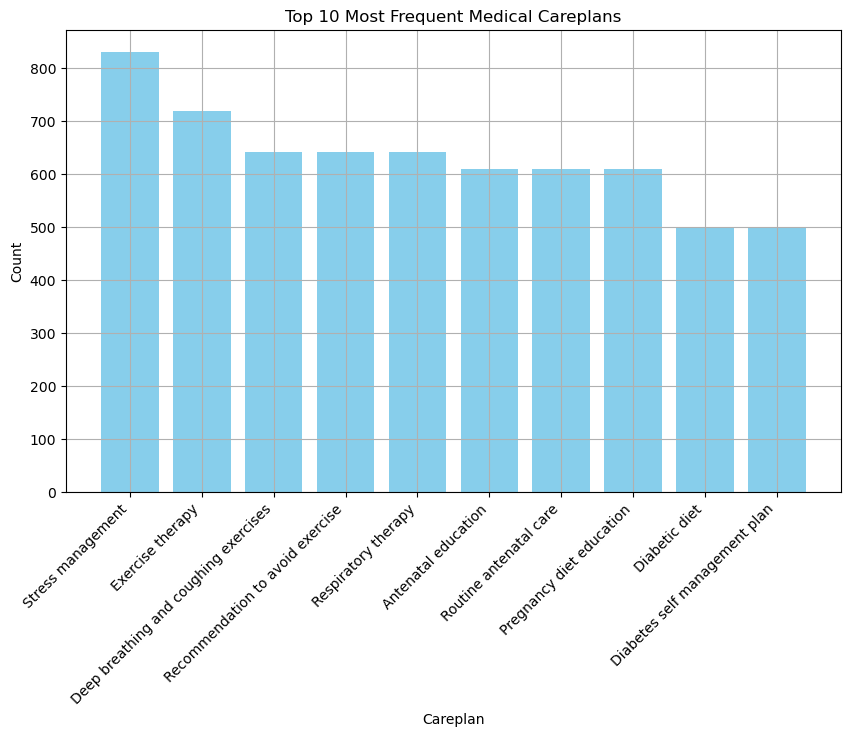

In [3]:
# careplans viz 
careplanCounts = careplans.groupby('DESCRIPTION').size().reset_index(name='count')
careplanCounts = careplanCounts.sort_values(by='count', ascending=False)
top10Careplans = careplanCounts.head(10)
print(top10Careplans)

plt.figure(figsize=(10, 6))
plt.bar(top10Careplans['DESCRIPTION'], top10Careplans['count'], color='skyblue')
plt.xlabel('Careplan')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Careplans')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

#### Visualizing conditions dataset

                              DESCRIPTION  count
116            Viral sinusitis (disorder)   1125
3      Acute viral pharyngitis (disorder)    602
2             Acute bronchitis (disorder)    508
86                            Prediabetes    458
52                           Hypertension    373
75                       Normal pregnancy    339
20           Chronic sinusitis (disorder)    329
79                           Otitis media    202
110  Streptococcal sore throat (disorder)    146
85                         Polyp of colon    108


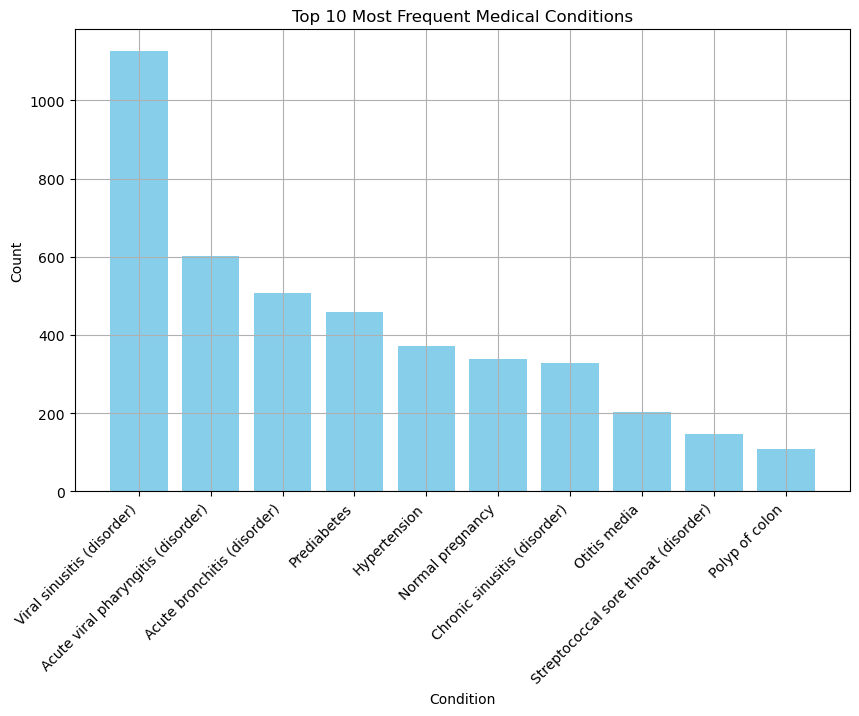

In [4]:
conditionsCounts = conditions.groupby('DESCRIPTION').size().reset_index(name='count')
conditionsCounts = conditionsCounts.sort_values(by='count', ascending=False)
top10Conditions = conditionsCounts.head(10)
print(top10Conditions)

plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(top10Conditions['DESCRIPTION'], top10Conditions['count'], color='skyblue')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()

#note that there is some matchup between top 10 careplans and top 10 conditions. this is good bc is expected behavior 

Sinusitis seems like the most common condition in our dataset, which makes sense given its link to common colds.

#### Visualizing encounters

                    DESCRIPTION  count
22         Outpatient Encounter   8629
17        Encounter for symptom   2852
24  Patient encounter procedure   1524
27               Prenatal visit   1383
23         Outpatient procedure   1281
5    Consultation for treatment    899
15     Encounter for 'check-up'    751
13     Emergency room admission    694
16        Encounter for problem    628
6           Death Certification    461


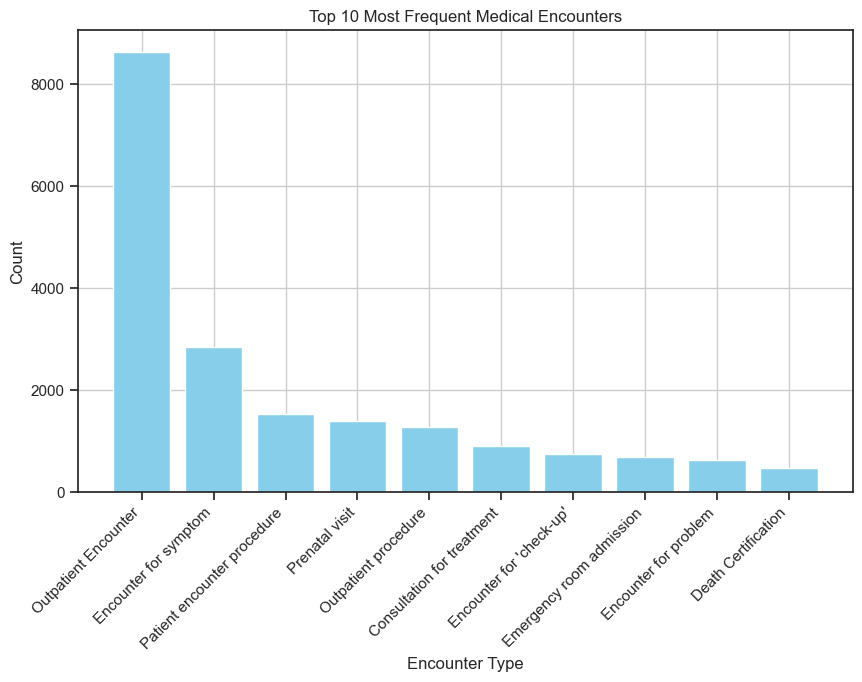

In [74]:
#encounters viz 
encountersCounts = encounters.groupby('DESCRIPTION').size().reset_index(name='count')
encountersCounts = encountersCounts.sort_values(by='count', ascending=False)
top10Encounters = encountersCounts.head(10)
print(top10Encounters)

plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(top10Encounters['DESCRIPTION'], top10Encounters['count'], color='skyblue')
plt.xlabel('Encounter Type')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Encounters')
plt.xticks(rotation=45, ha='right')
plt.show()

The most common encounter was outpatient encounter, which makes sense as it includes general doctor visits like annuals and check-ups.

#### Examining the distribution of patient identities

In [75]:
#what the 'average' patient looks like in terms of race and gender

#find most frequent race to represent average
patientRaceCount = patients.groupby('race').size().reset_index(name='raceCount')
patientRaceCount = patientRaceCount.sort_values(by='raceCount', ascending=False)
top5FreqRace = patientRaceCount.head(5)
print(top5FreqRace)

#repeat for gender
patientGenderCount = patients.groupby('gender').size().reset_index(name='genderCount')
patientGenderCount = patientGenderCount.sort_values(by='genderCount', ascending=False)
top5FreqGender = patientGenderCount.head(5)
print(top5FreqGender)

       race  raceCount
3     white       1085
2  hispanic        155
1     black        129
0     asian         93
  gender  genderCount
1      M          741
0      F          721


White patients are the most common racial group in our dataset, which may make sense for Massachussetts although this could be overrepresentation in comparison to actual demographic proportions. Male and female patients are somewhat evenly split.

In [76]:
#visualization for what the 'average' patient looks like in terms of body stat characteristics
observationsRadar = observations.drop(columns = ['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'UNITS'])
observationsRadar = observationsRadar.dropna()
observationsRadar['VALUE'] = pd.to_numeric(observationsRadar['VALUE'], errors='coerce')
averageVals = observationsRadar.groupby('DESCRIPTION')['VALUE'].mean().reset_index()
averageVals = averageVals[averageVals['DESCRIPTION'].isin(['Body Height', 'Body Weight', 'Body Mass Index', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Quality adjusted life years'])]
averageVals


DESCRIPTION       VALUE
3                   Body Height  145.246010
4               Body Mass Index   27.837863
5                   Body Weight   65.032186
16     Diastolic Blood Pressure   84.485896
40  Quality adjusted life years   41.901321
45      Systolic Blood Pressure  129.587277

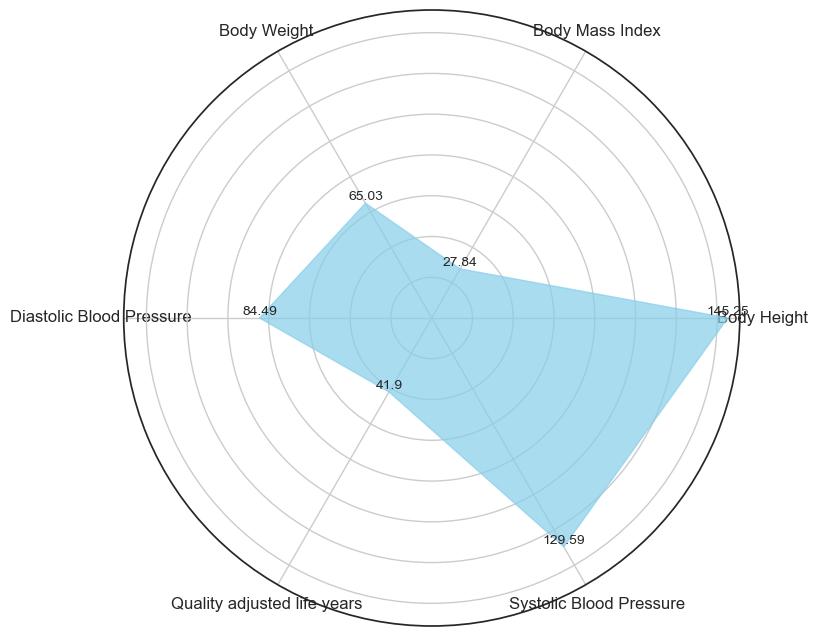

In [77]:
#CREATION OF RADAR CHART OBTAINED FROM ONLINE CODE 
descriptions = averageVals['DESCRIPTION'].tolist()
values = averageVals['VALUE'].tolist()

#to close the circle
values.append(values[0])

num_vars = len(descriptions)

#compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

#need to "complete the loop" and append the start value to the end since plot is a cirlce
values += values[:1]
angles += angles[:1]
values.pop()

#plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.7)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(descriptions, fontsize=12)

ax.set_yticklabels([])

#add values to each point
for angle, value in zip(angles[:-1], values[:-1]):
    ax.text(angle, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

This represents the average vital signs of our patients.

## Pulmonary Diseases EDA

### PULMONARY DISEASES BY RACE

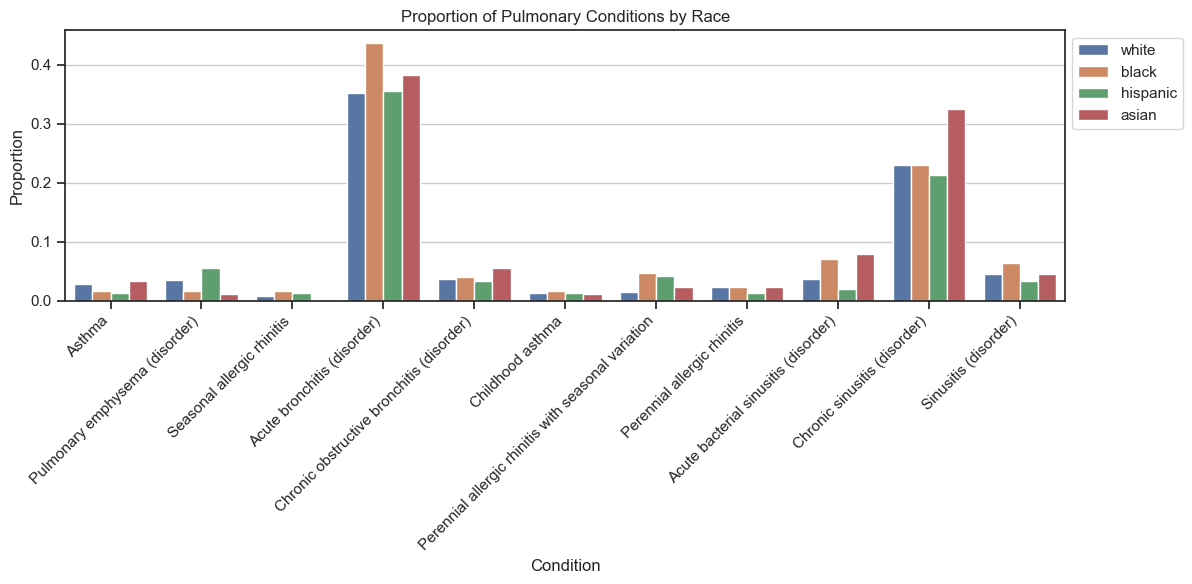

In [78]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in lungs.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(lungs, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Pulmonary Conditions by Race')
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.tight_layout()
plt.show()

It seems as though black patients are the most likely to get acute bronchitis while asian patients are most likely to get chronic sinusitus. This is important as analyzing these conditions together mike give us more mixed results in total.

### PULMONARY DISEASES BY ETHNICITY

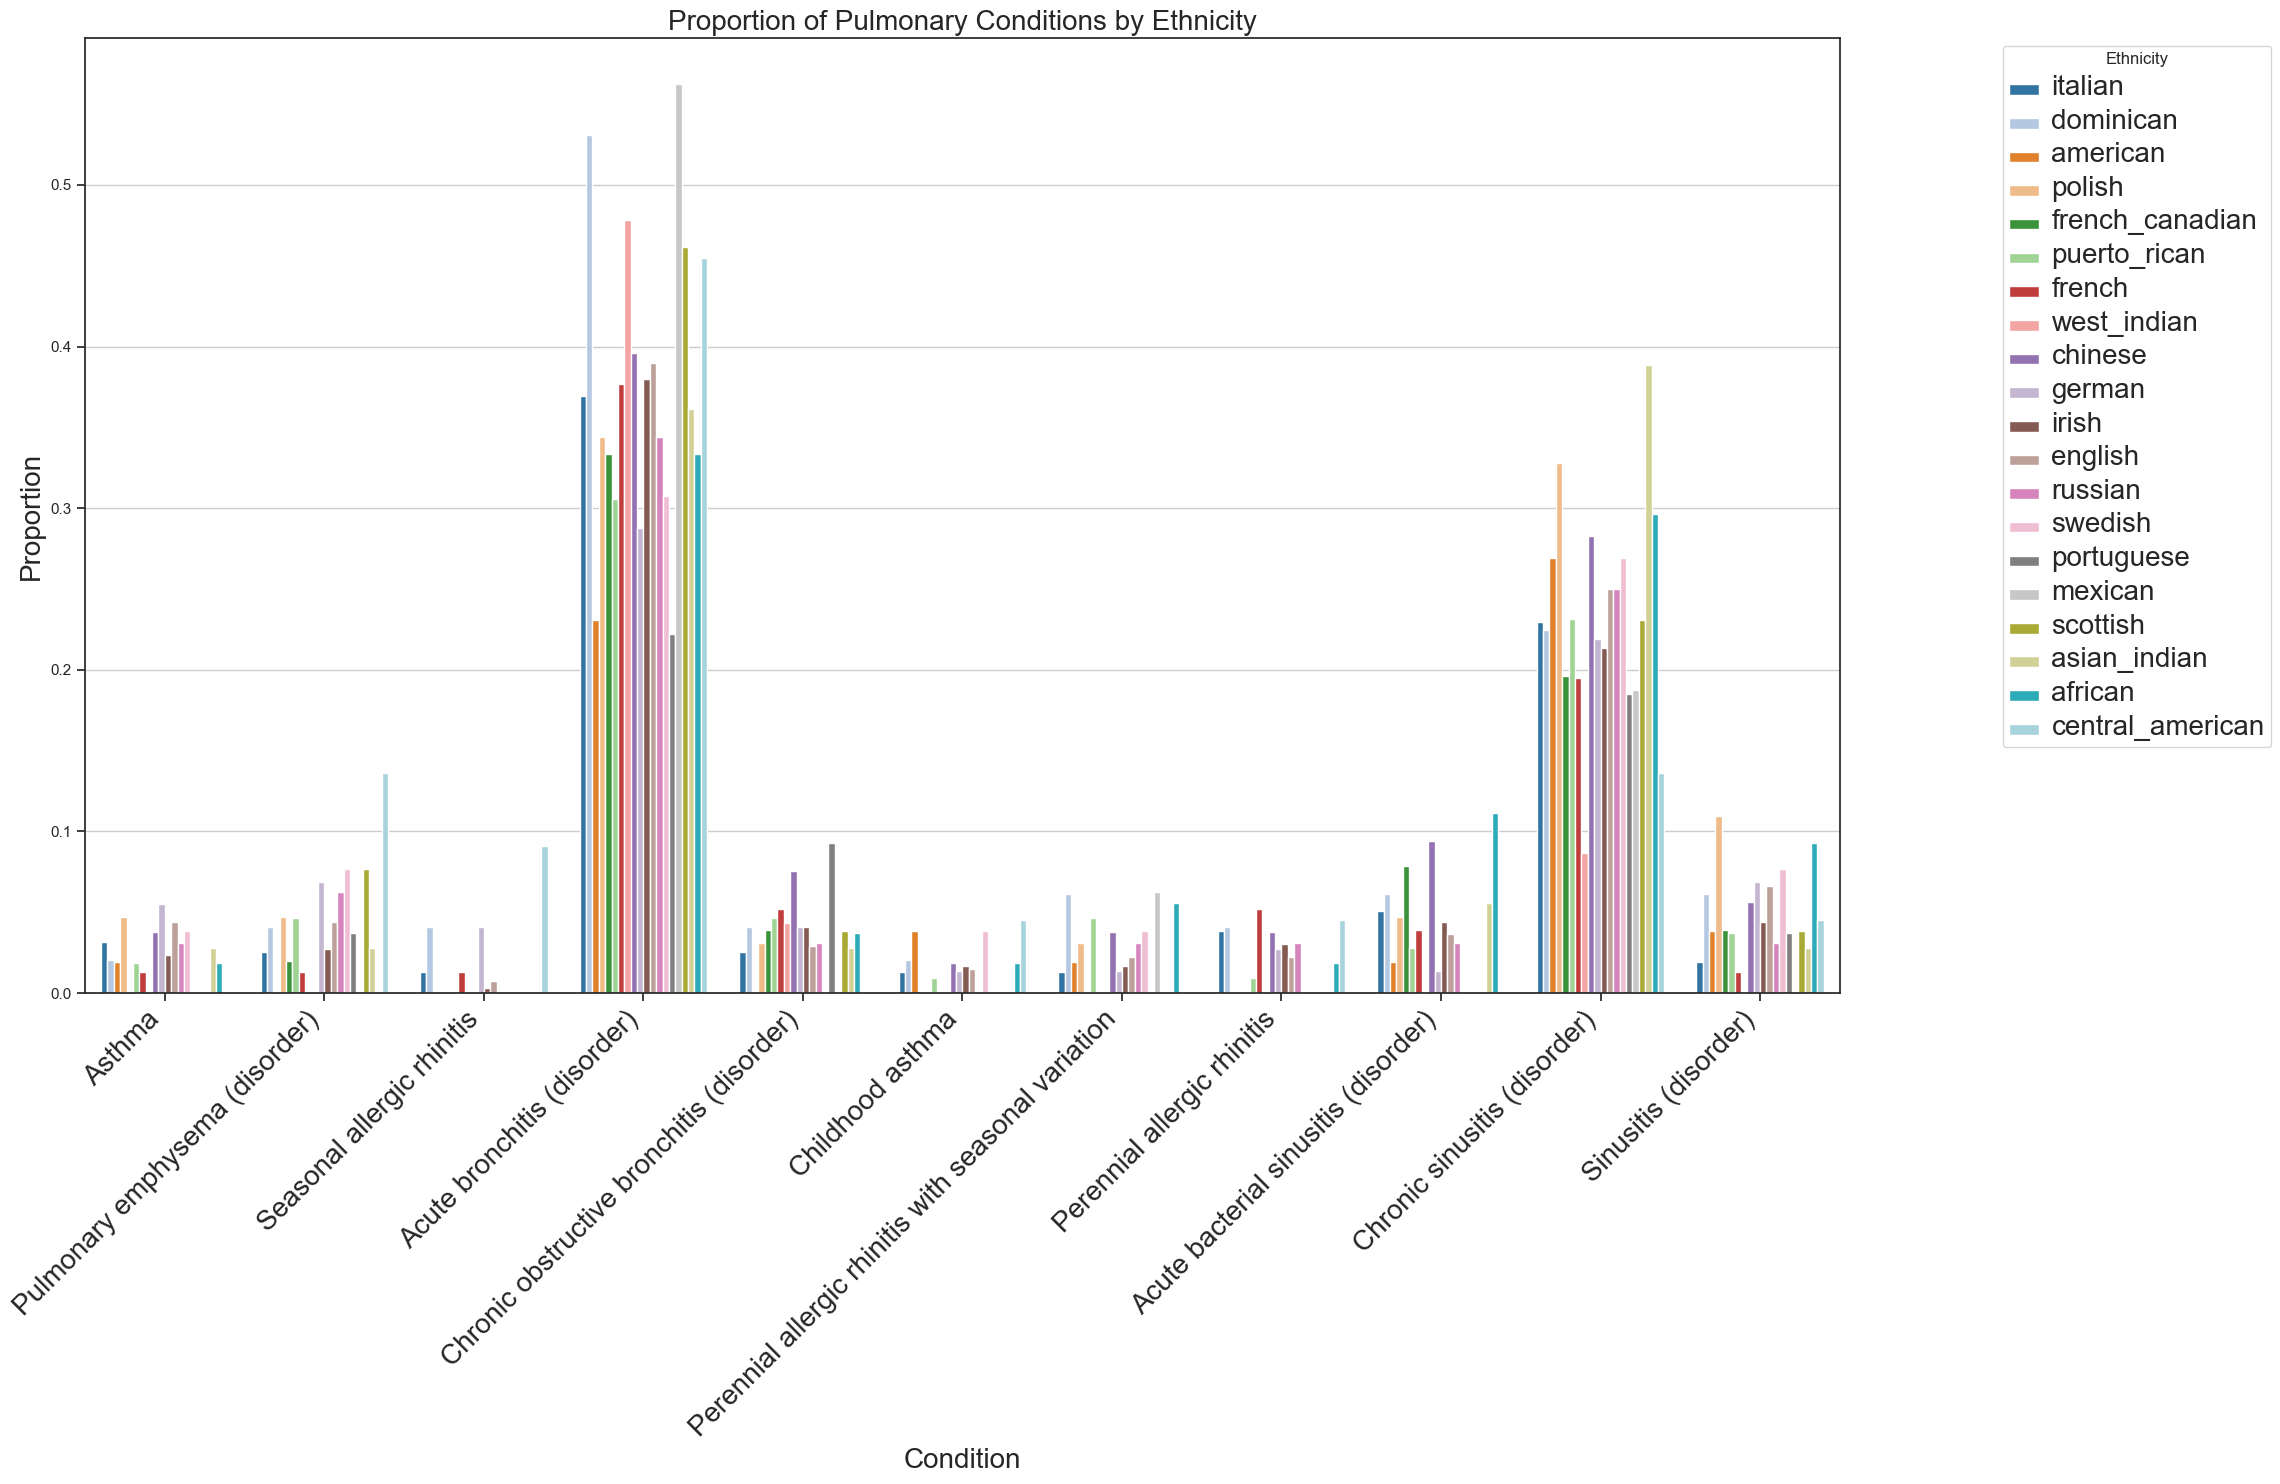

In [79]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in lungs.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(lungs, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Pulmonary Conditions by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

Again, these vary by different diseases. However, we can see that Dominican and Mexican patients are most likely to be diagnosed with Acute bronchitis while Asian Indian patients are far more likely to get Chronic sinusitis.

### PULMONARY DISEASES BY BIRTHPLACE

Creating a dataframe of populations of all the towns present in our data (all in Massachusetts), in order to calculate adjusted prevalance.

In [5]:
populations = pd.DataFrame()
unique_birthplaces = lungs['birthplace'].unique()
populations['birthplace'] = unique_birthplaces
populations['pop'] = [37819, 101727, 35313, 93682, 3785, 53896, 87954,
                       62698, 60803, 5025, 18317, 23662, 1734, 79762, 205319, 1641,
                       25334, 650706, 6362, 31531, 59922, 6802, 58528, 87381, 19872,
                       17612, 54980, 25121, 24747, 17489, 35022, 64065, 22992, 6196, 15946, 27395,
                       44722, 25905, 9806, 11657, 65399, 8485, 15988, 113608, 28854, 4301, 104826, 
                       118488, 29155, 13885, 12265, 23315, 1677, 28501, 67153, 49350, 29327, 10293,
                       29349, 8270, 154064, 19808, 43310, 29862, 22325, 16593, 6388, 6379, 17619, 14939, 
                       16720, 40971, 31747, 43646, 25050, 38637, 1802, 15702, 15101, 29195, 18448, 16732,
                       16516, 11048, 7754, 11066, 19948, 4688, 100891, 33792, 18181, 11115, 37286, 100682,
                       36229, 14570, 46601, 10911, 11625, 17669, 13697, 20902, 10667, 19163, 22666, 10580,
                       32158, 11777, 1861, 2215, 6347, 64712, 23629, 34307, 752, 9547, 16705, 13866, 18510,
                       43784, 35744, 21478, 70963, 42844, 40535, 16296, 16127, 7973, 31296, 26123, 3265, 13320,
                       53241, 3234, 7839, 14749, 8055, 24498, 9640, 42235, 1730, 5798, 37973, 8316, 23923, 18662,
                       10084, 6975, 15827, 49532, 11964, 136913, 6279, 7214, 17806, 41248, 6358, 10874, 19063, 6569,
                       23184, 11753, 11386, 2985, 16450, 9182, 7764, 21374, 11802, 41502, 4111, 16053, 6183, 27003,
                       15710, 6125, 8471, 4963, 29836, 1029, 15227, 10000, 12337, 1793, 491, 4678, 11988, 8168, 28950,
                       1566, 12904, 57410, 6850, 13427, 11327, 6532, 917, 17456, 25209, 717, 17182, 15168, 12777, 
                       8153, 14313, 13435, 1264, 7884, 9230, 14180, 3056, 12418, 14382, 31248, 10169, 8541, 16188, 
                       36500, 31388, 17027, 16094, 13911, 28385, 9395, 11261, 1489, 12925, 27999, 5943, 16693, 5346,
                       9811, 27400, 4871, 24296, 12133, 6346, 31635, 11688, 1245, 5284, 5966, 1458, 780, 27135, 316,
                       5429, 17765, 12629, 3390, 6952, 7144, 2180, 7649, 4907, 5139, 4852, 5125, 5135, 2901, 5398, 4519]

In [6]:
condition_columns = [col for col in lungs.columns if col.endswith('_CONDITIONS')]
conditions_summed = lungs.groupby('birthplace')[condition_columns].sum().reset_index()
prevdatalungs = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdatalungs[f'prevalence_{condition_column}'] = prevdatalungs[condition_column] / prevdatalungs['pop']

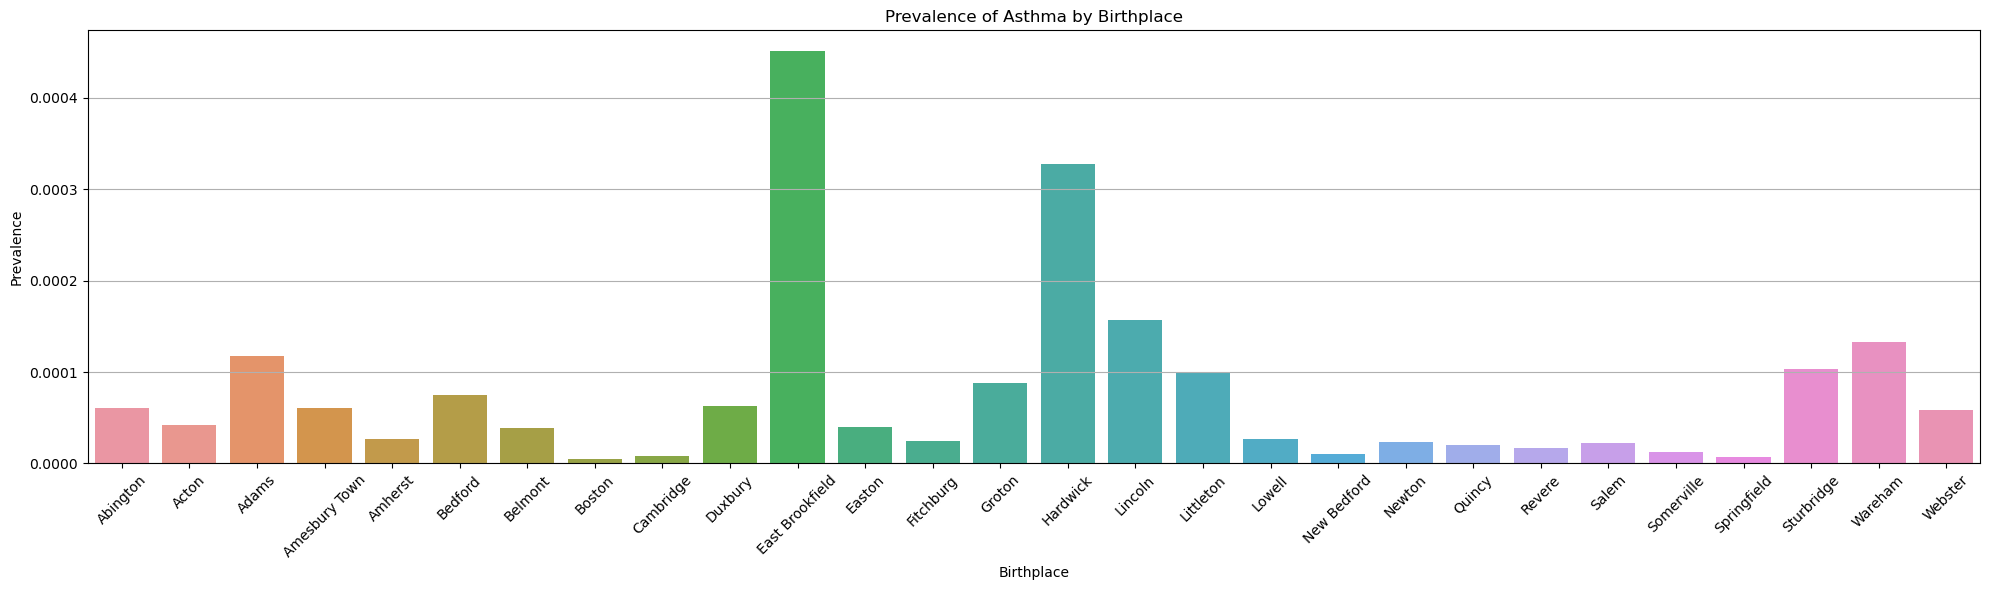

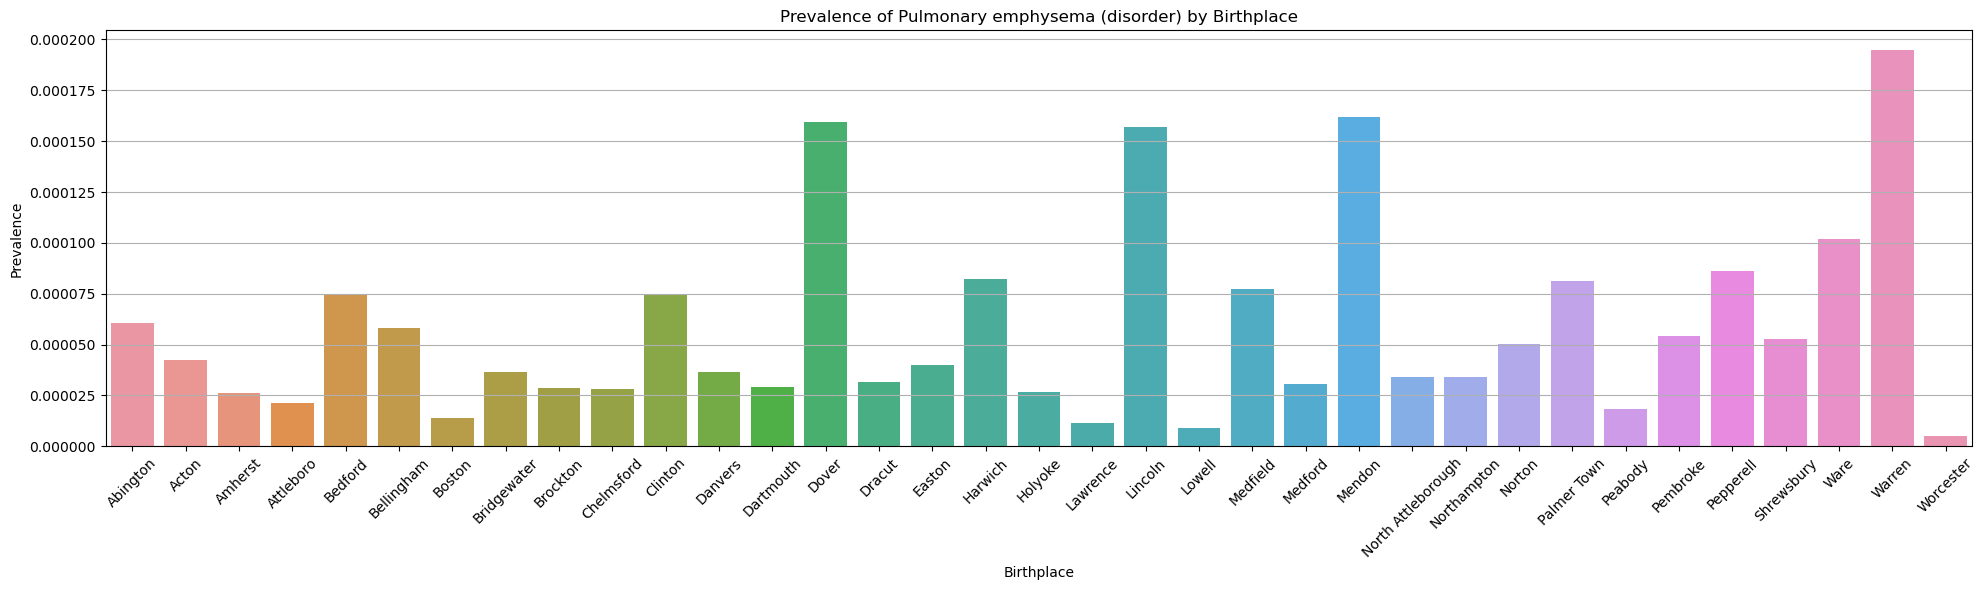

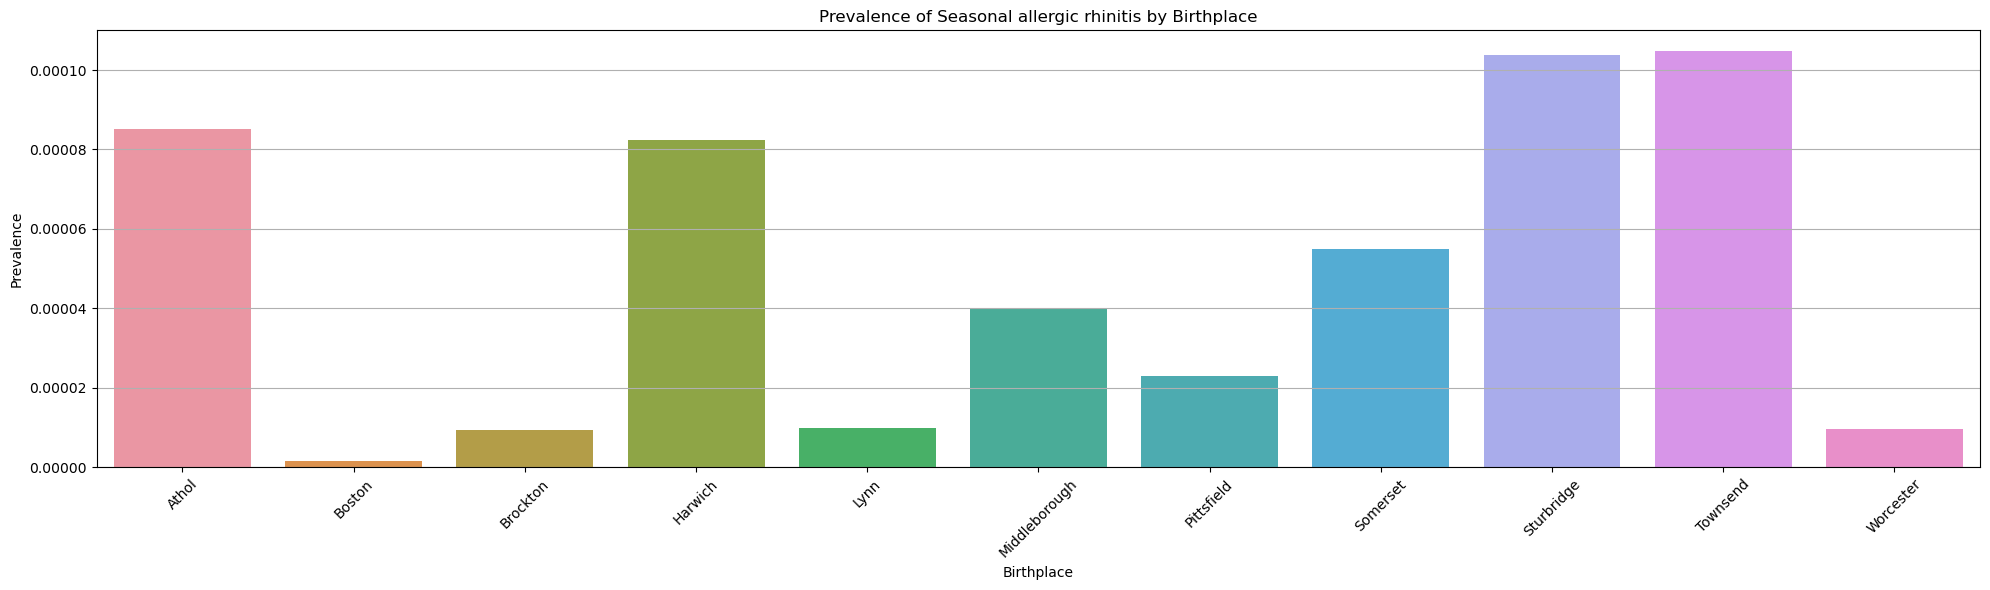

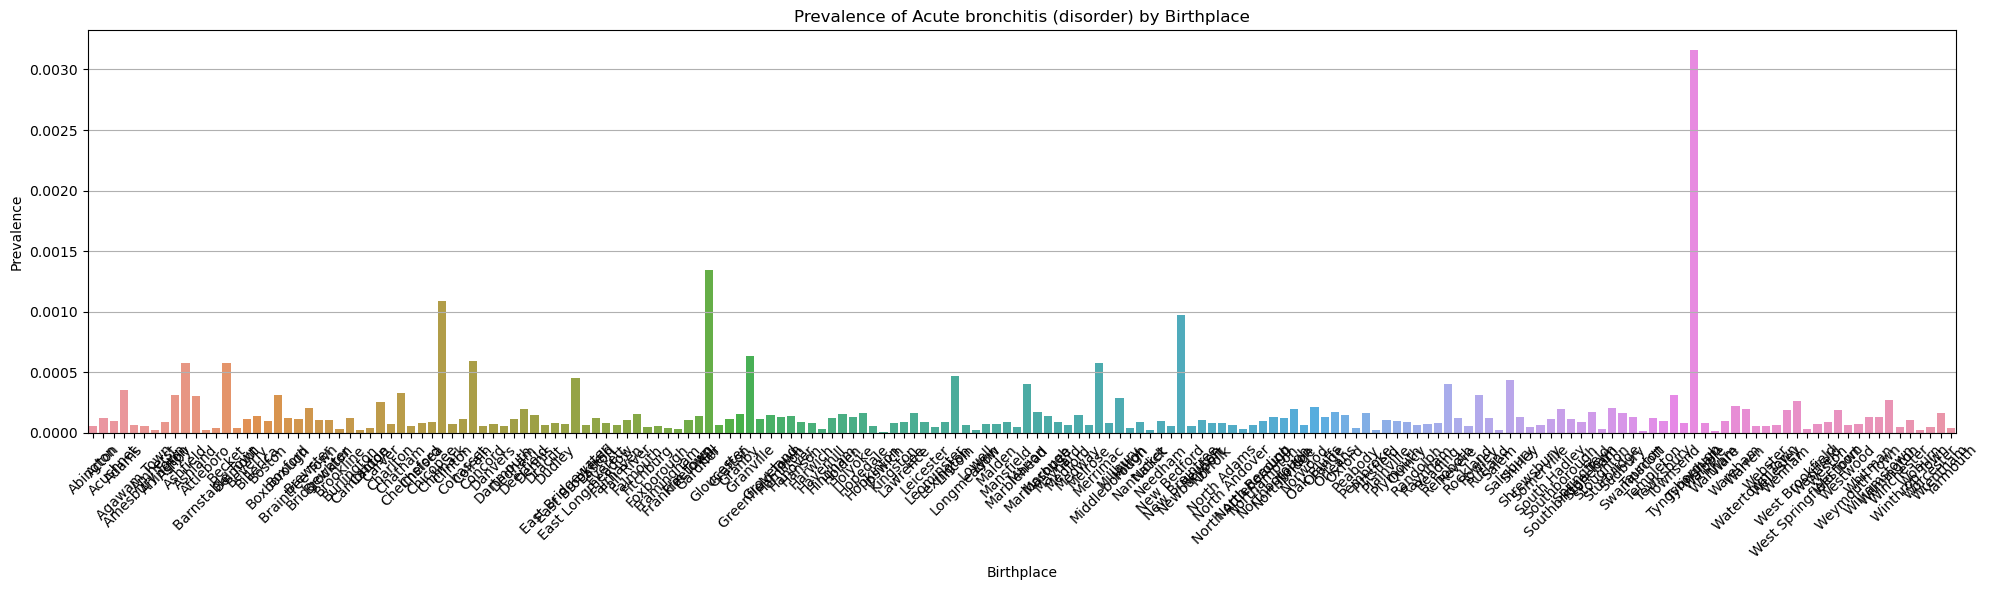

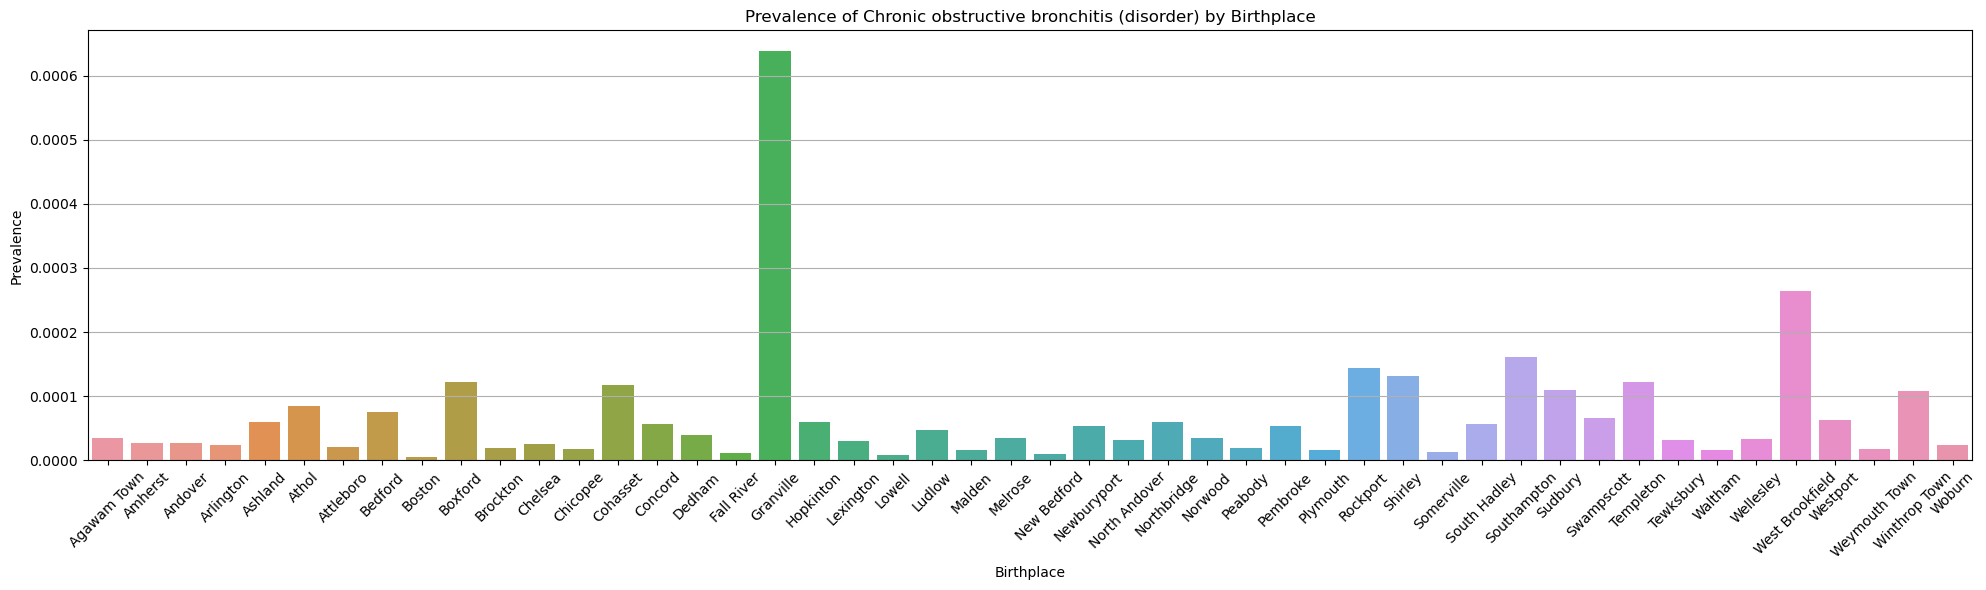

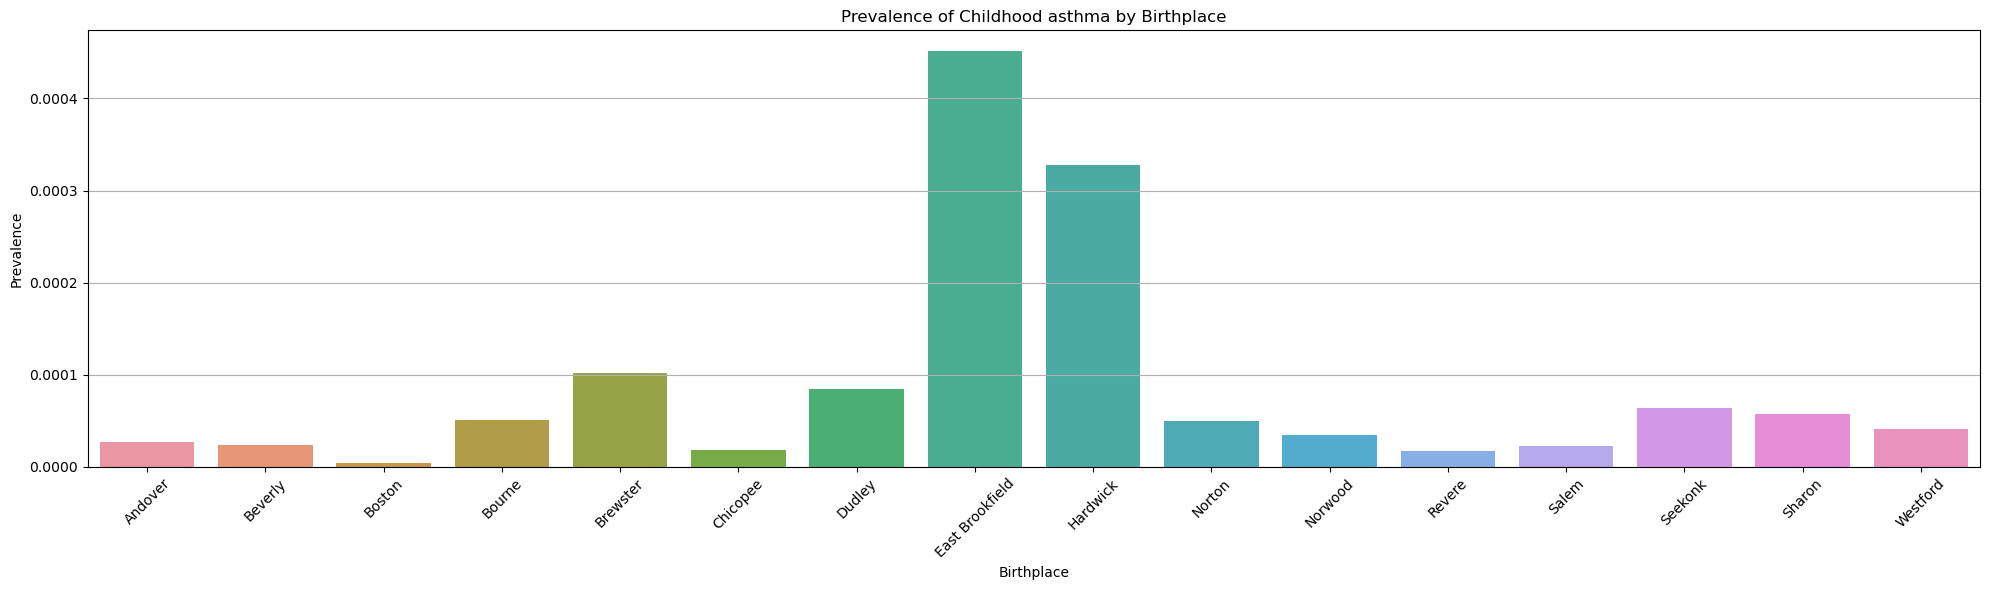

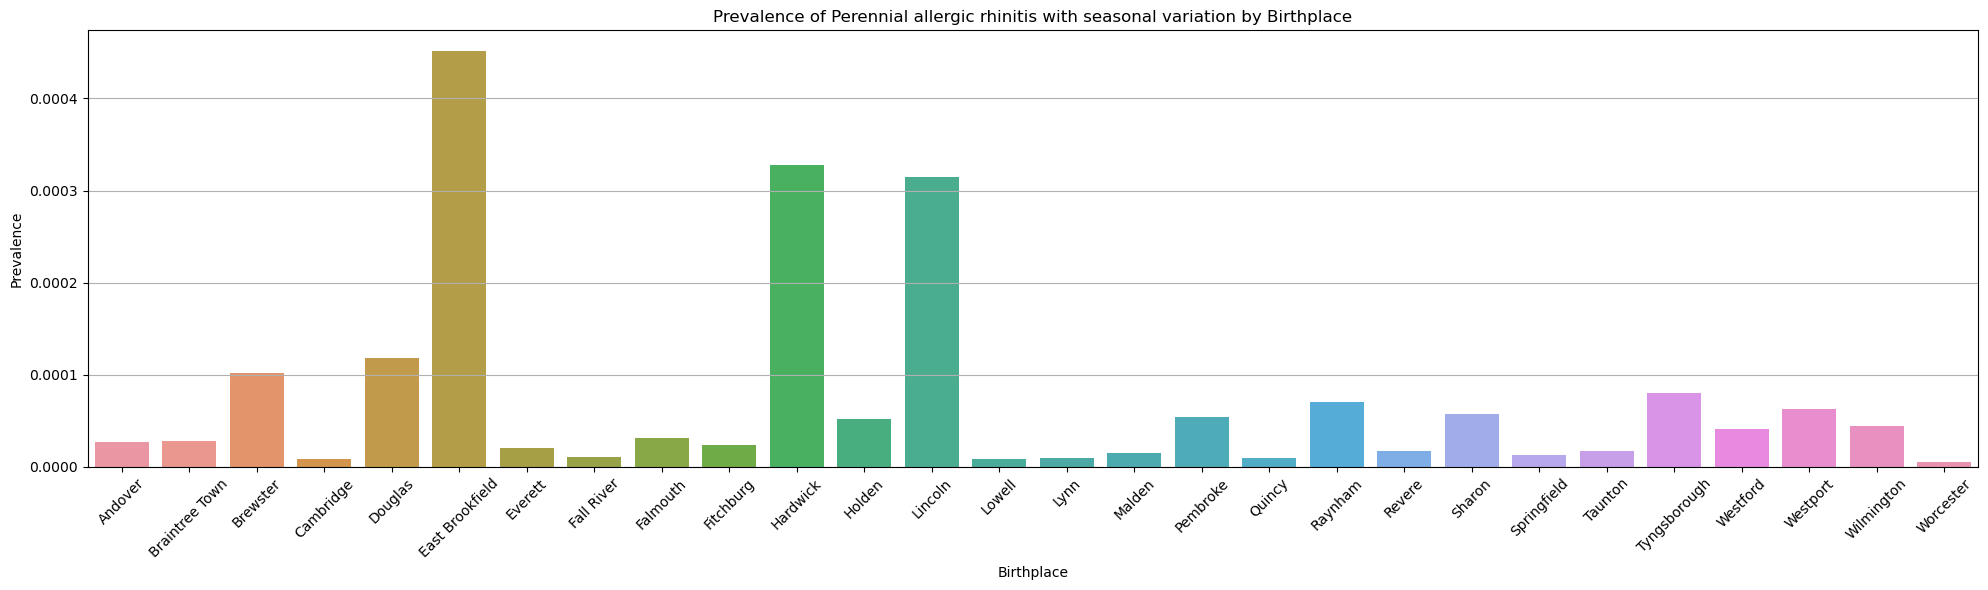

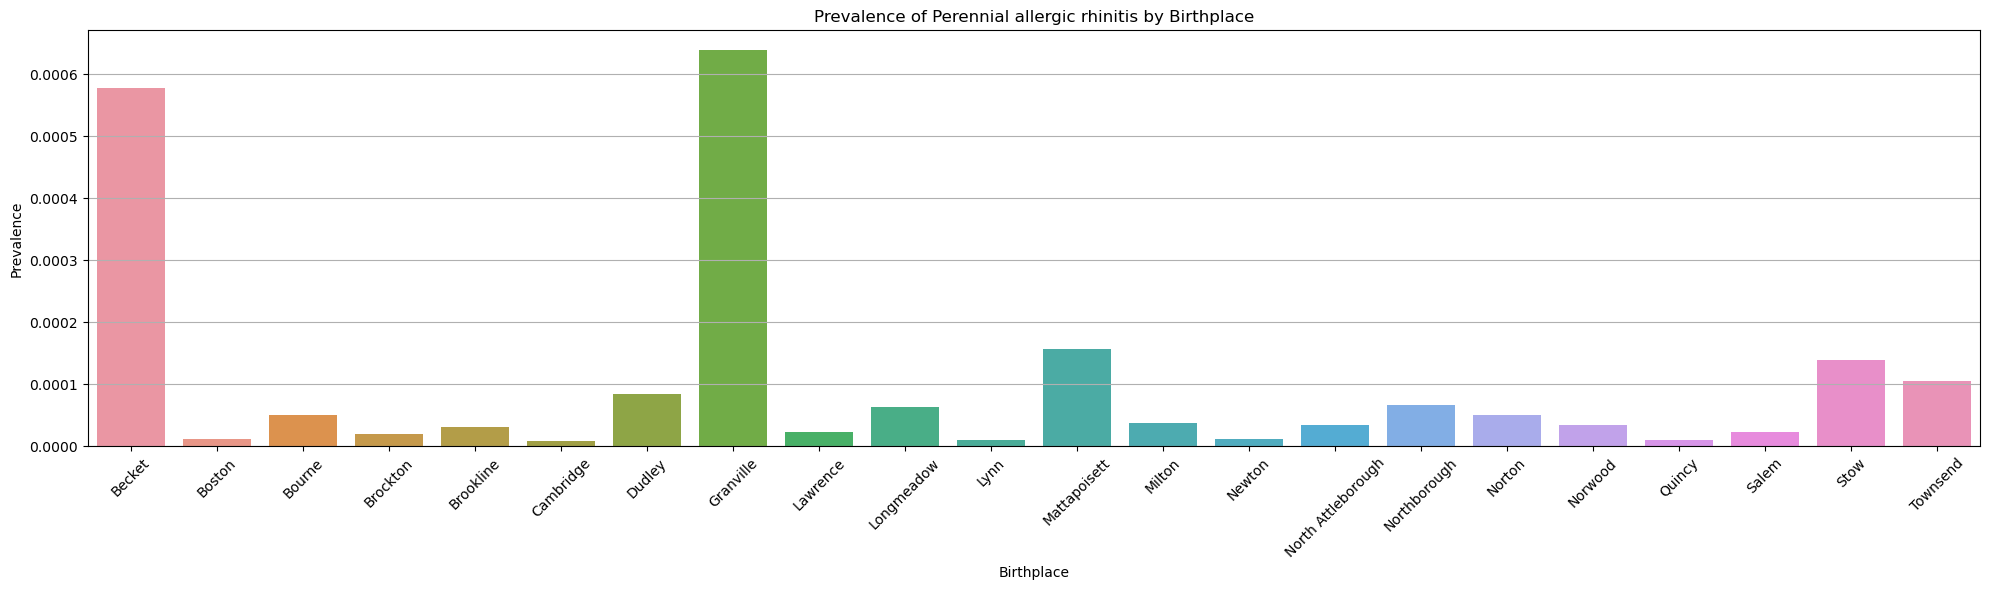

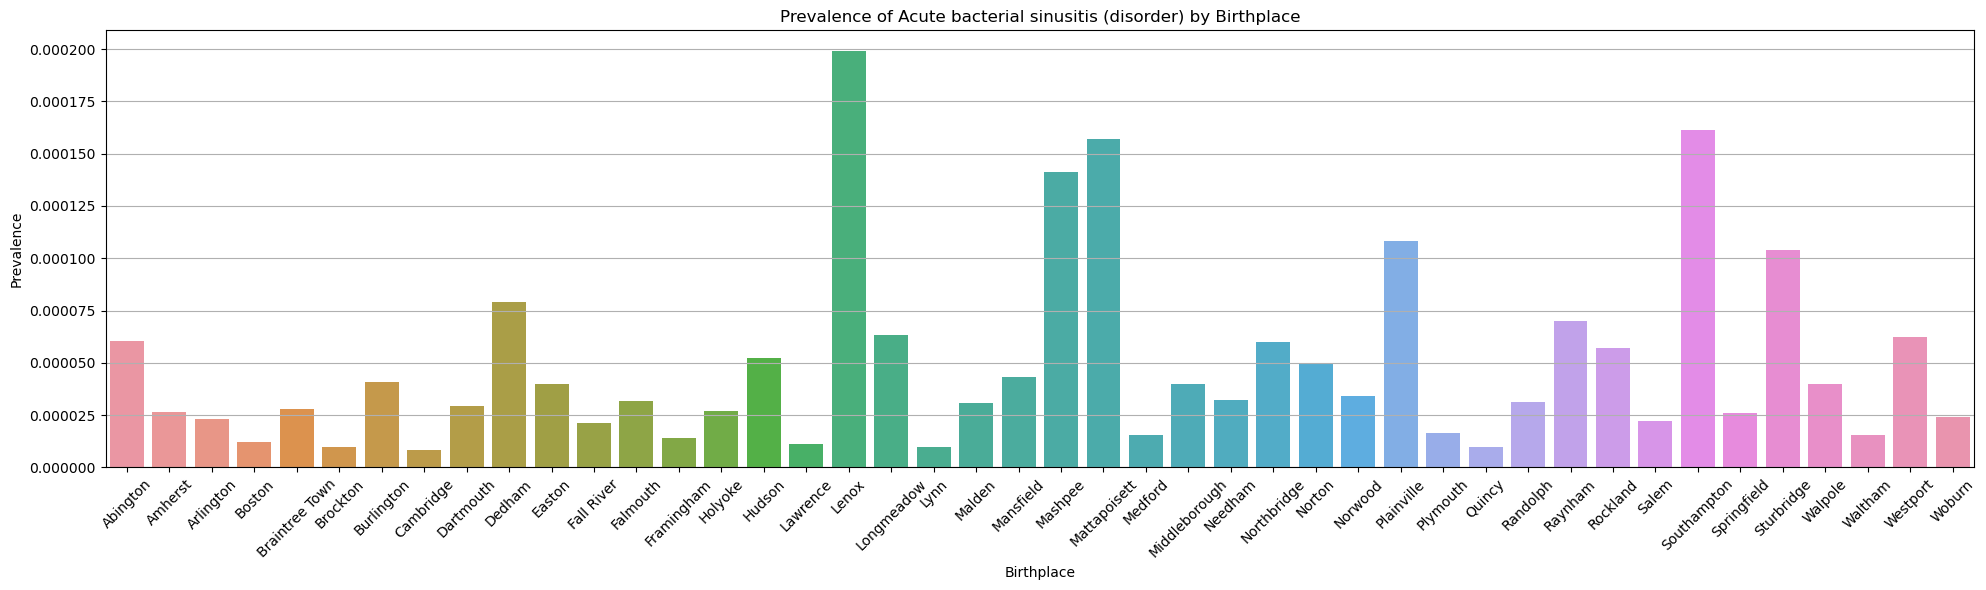

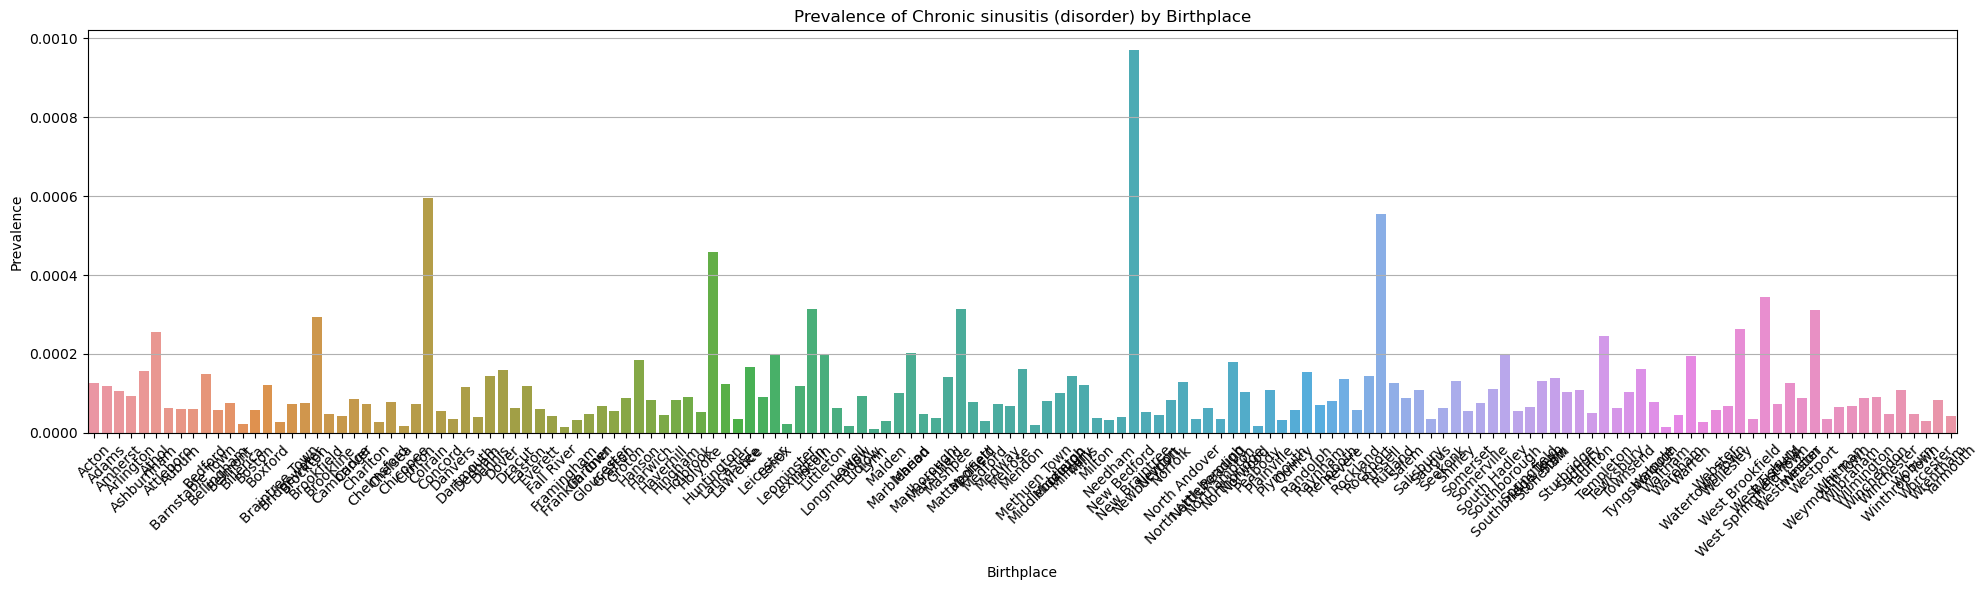

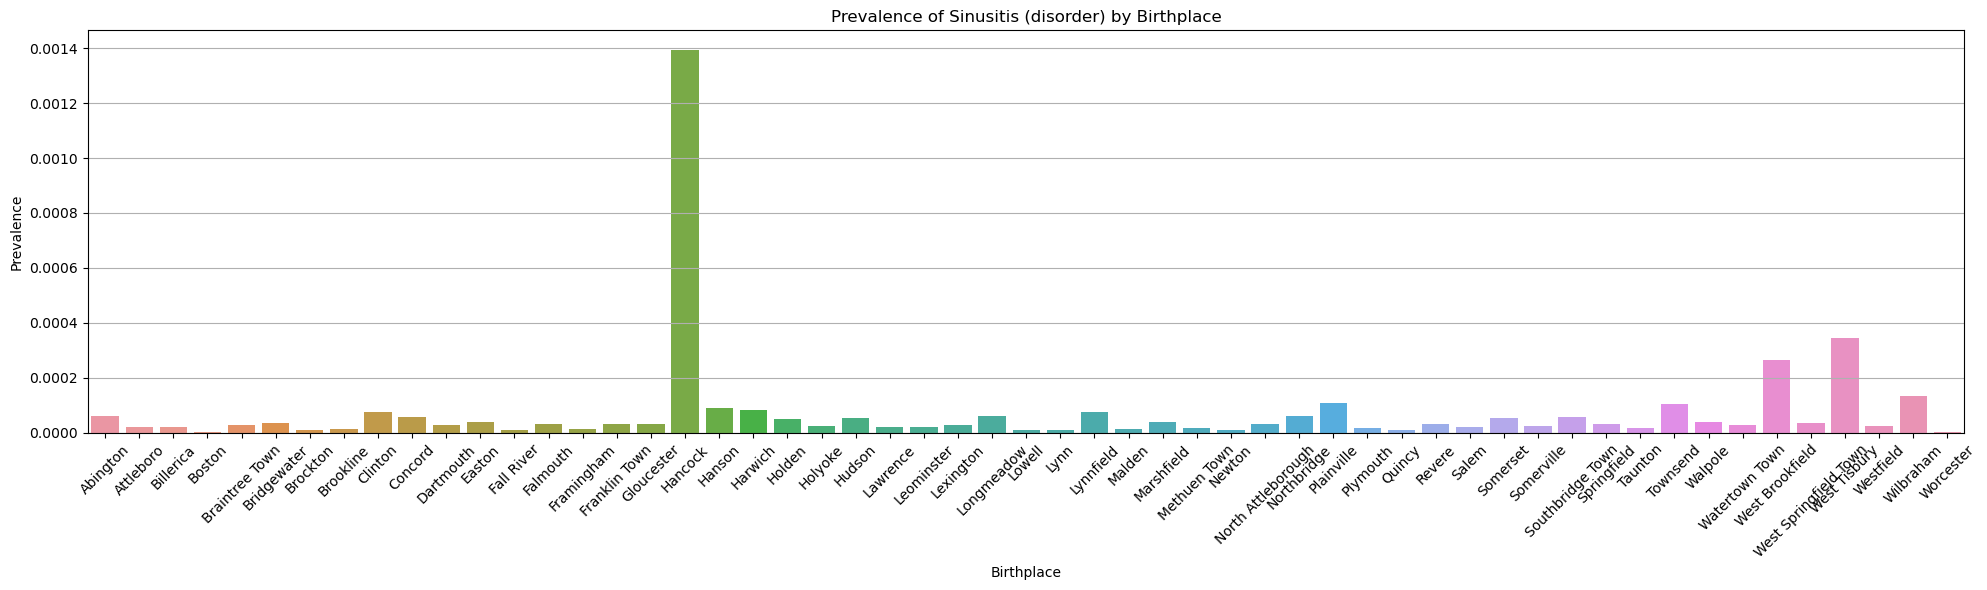

In [7]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdatalungs[prevdatalungs[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In many of these conditions, it's worth nothing that one town in particular has a much higher prevelance. Unfortunately, with the vast number of towns and conditions there are so many it is difficult to accurately visualize. However, Hancock is extremely high for Sinusitus. This could be notable as Hancock ranked as the [287th richest town in Mass out of 341](https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income), so it is less wealthy compares to others in our dataset.

## Cancer EDA

### CANCER BY RACE

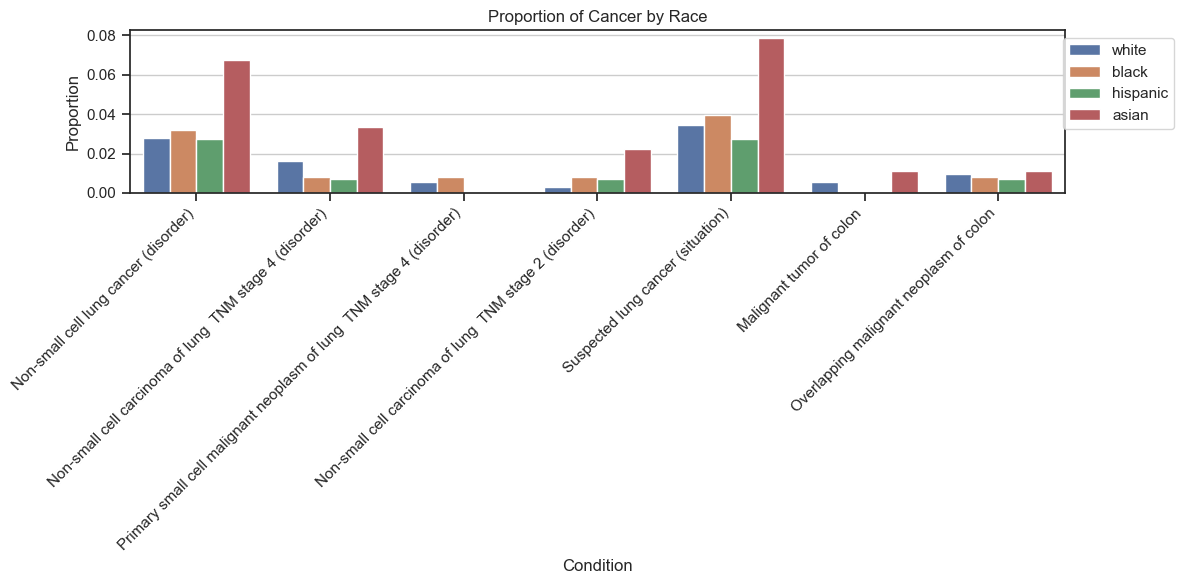

In [83]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in cancer.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(cancer, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Cancer by Race')
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.tight_layout()
plt.show()

Asian patients seem to dominate many categories.

### CANCER BY ETHNICITY

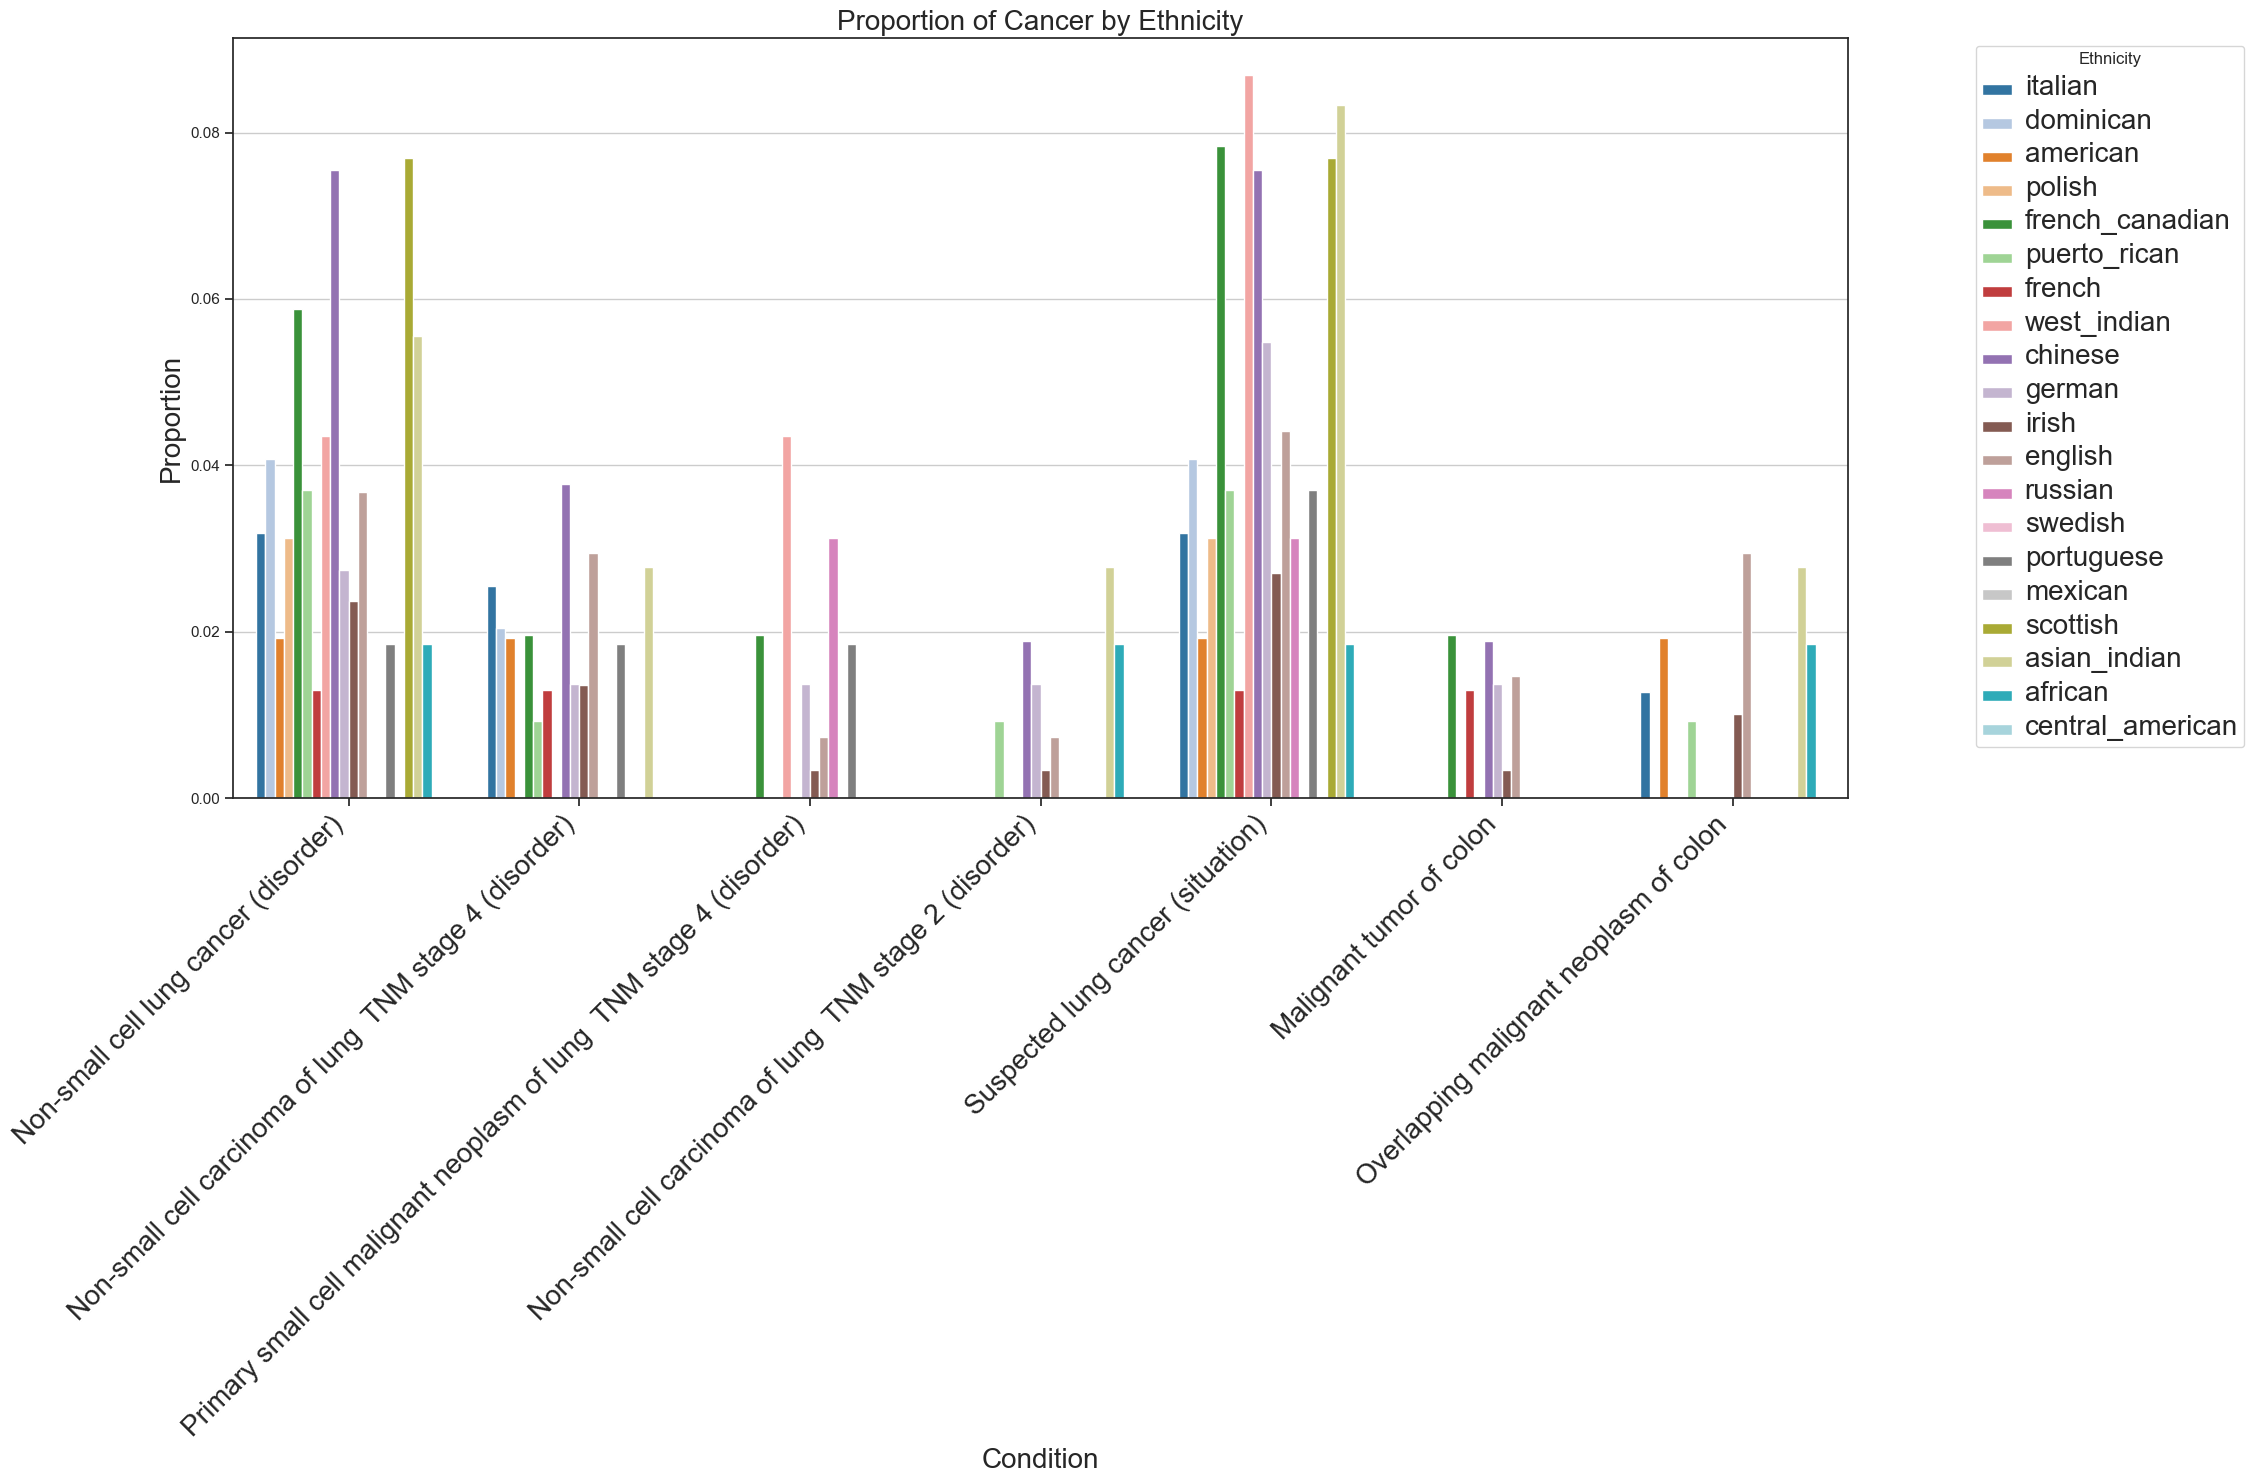

In [84]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in cancer.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(cancer, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Cancer by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

### CANCER PREVALANCE BY BIRTHPLACE

In [85]:
condition_columns = [col for col in cancer.columns if col.endswith('_CONDITIONS')]
conditions_summed = cancer.groupby('birthplace')[condition_columns].sum().reset_index()
prevdatacanc = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdatacanc[f'prevalence_{condition_column}'] = prevdatacanc[condition_column] / prevdatacanc['pop']

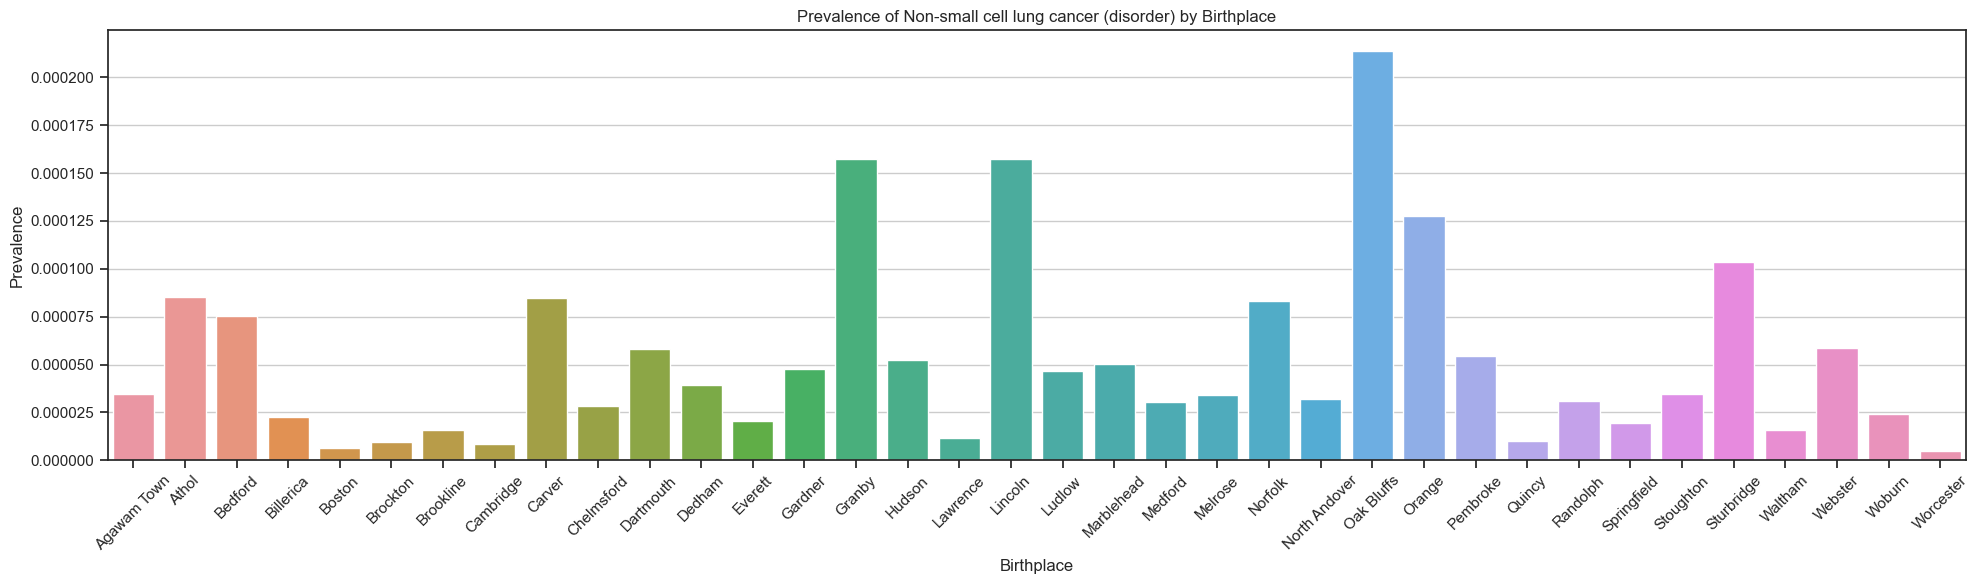

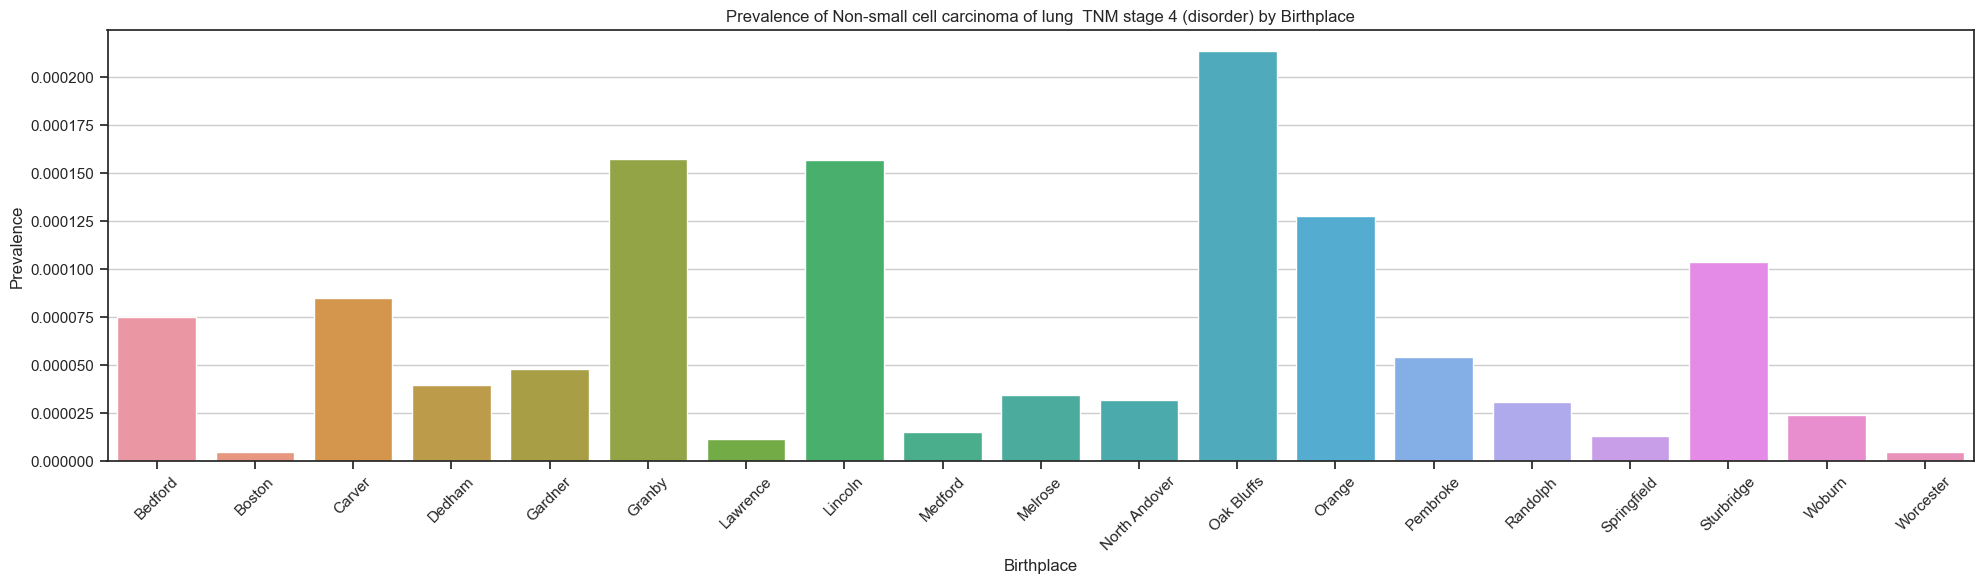

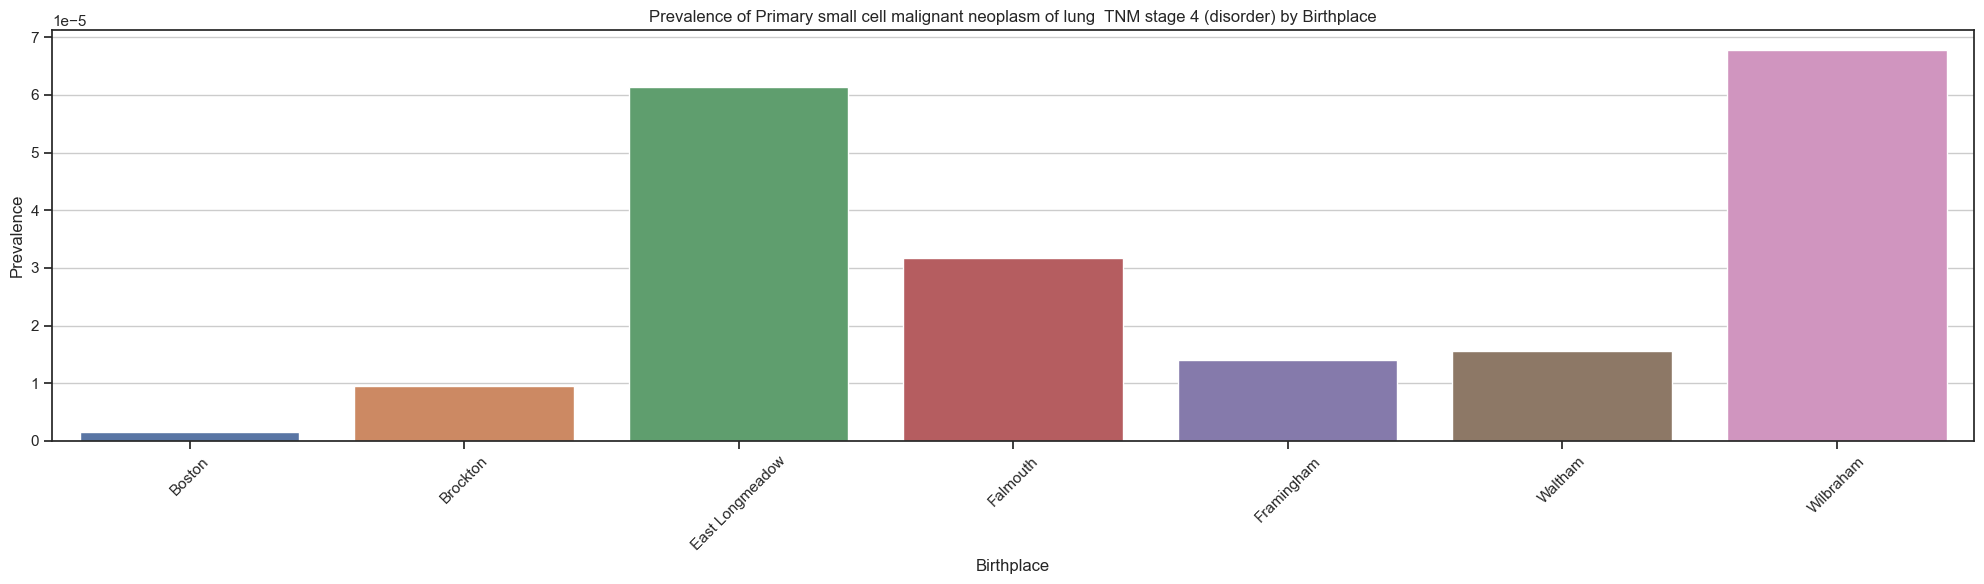

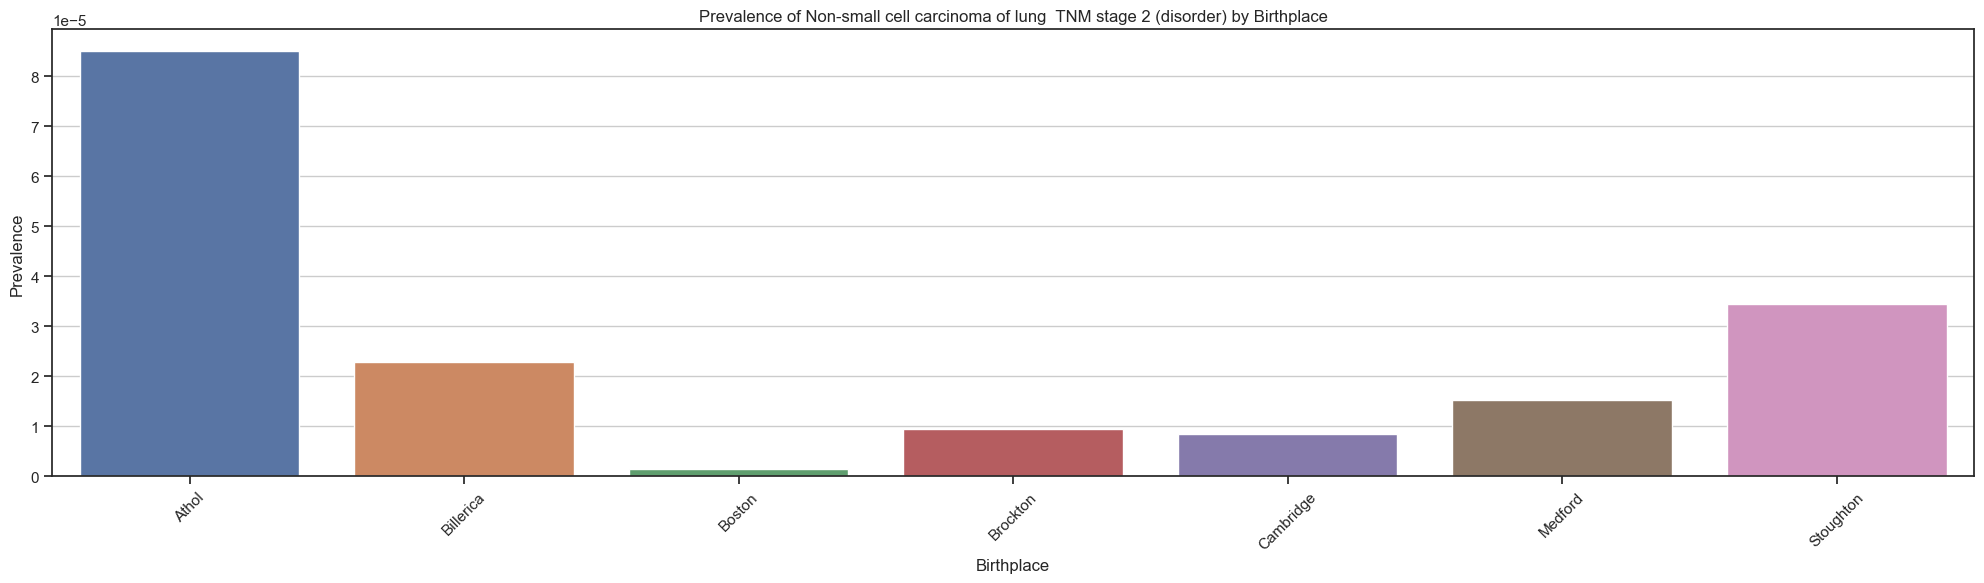

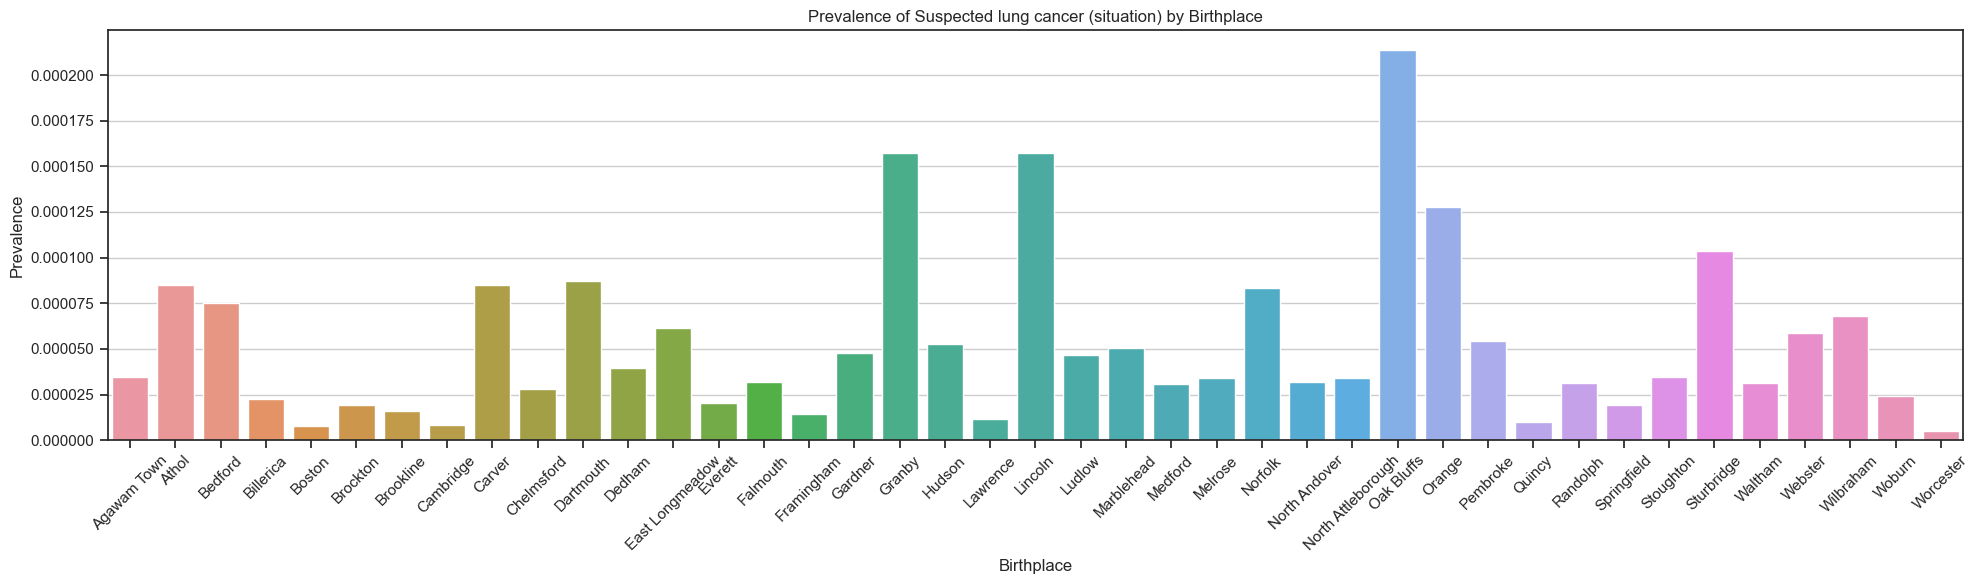

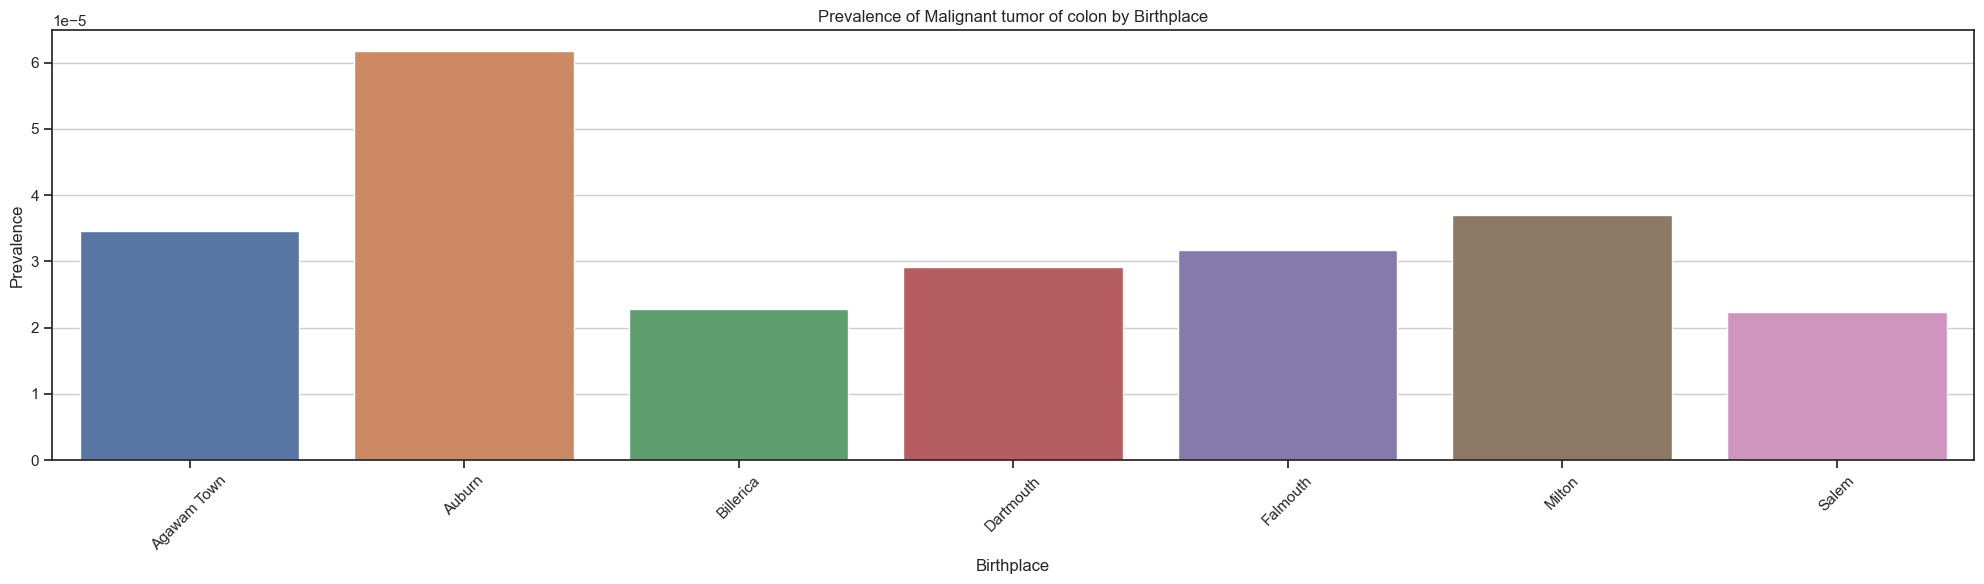

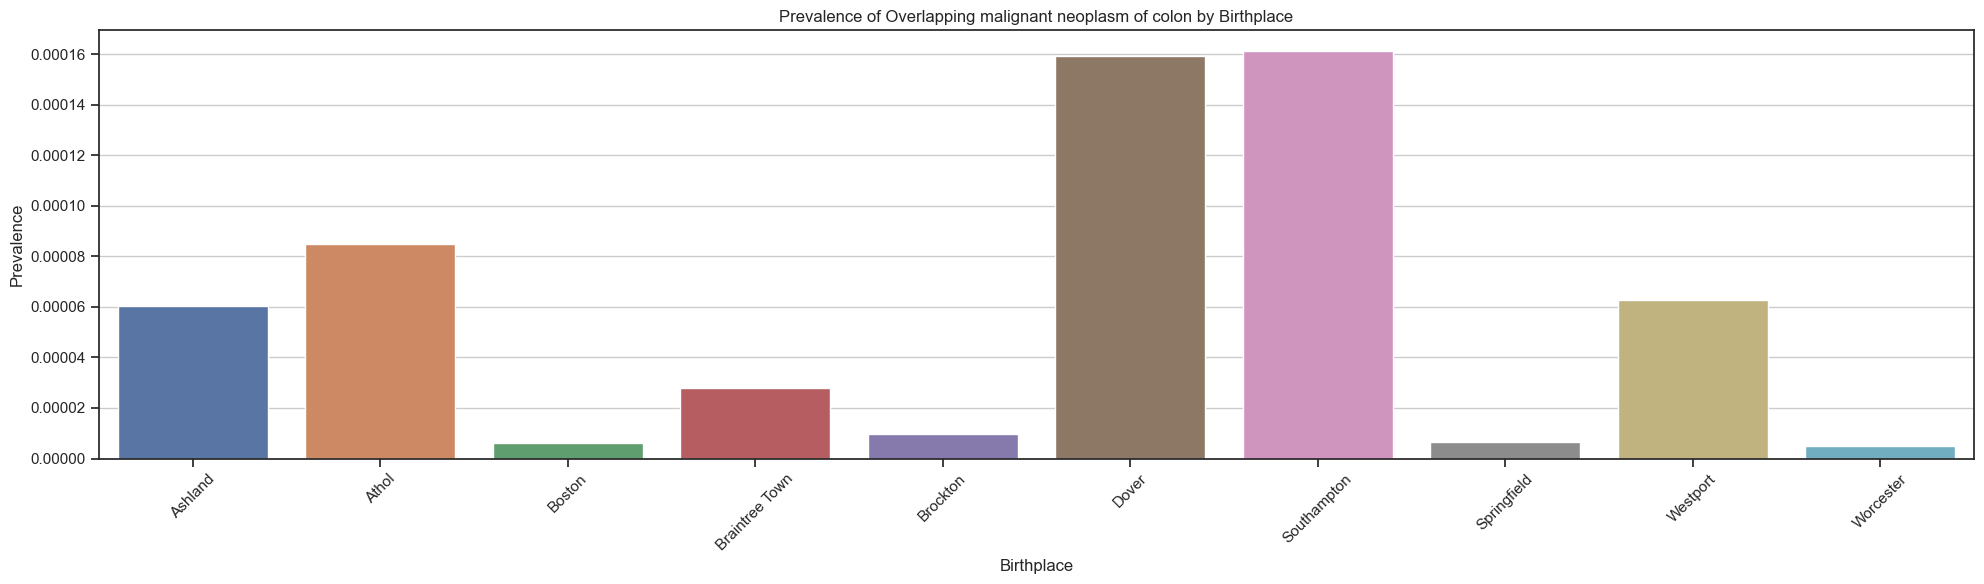

In [86]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdatacanc[prevdatacanc[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For some cancer types, very few places record incidents. It is harder to draw conclusion for different conditions with this lack of data.

## Diabetes EDA

### DIABETES BY RACE

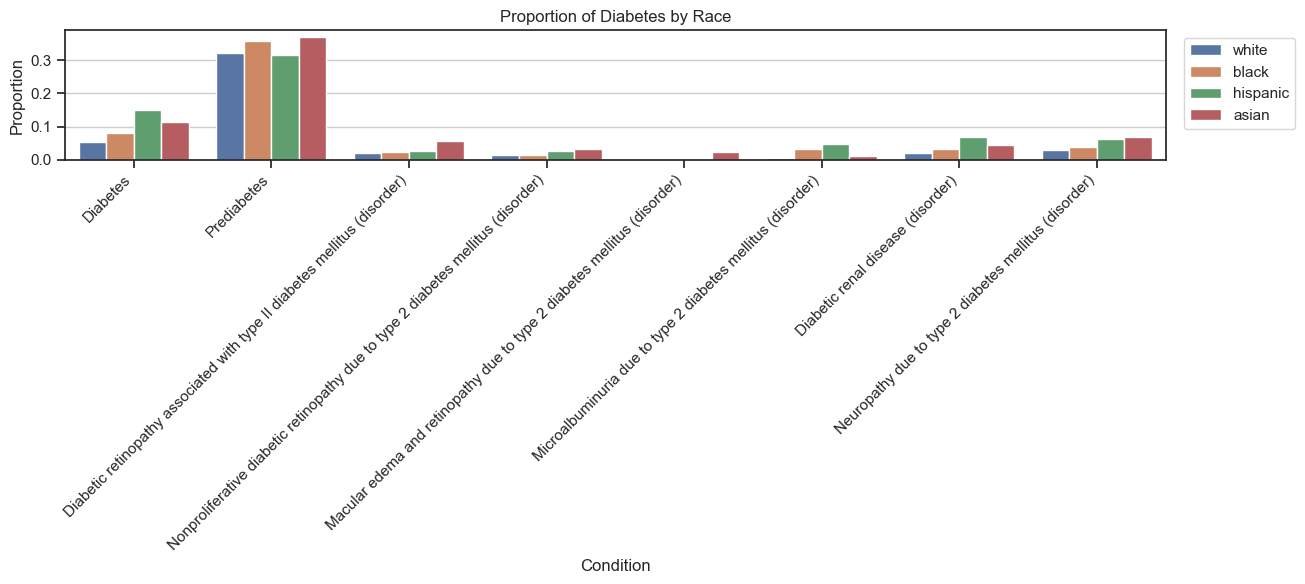

In [87]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in diabetes.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(diabetes, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Diabetes by Race')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.show()

### DIABETES BY ETHNICITY

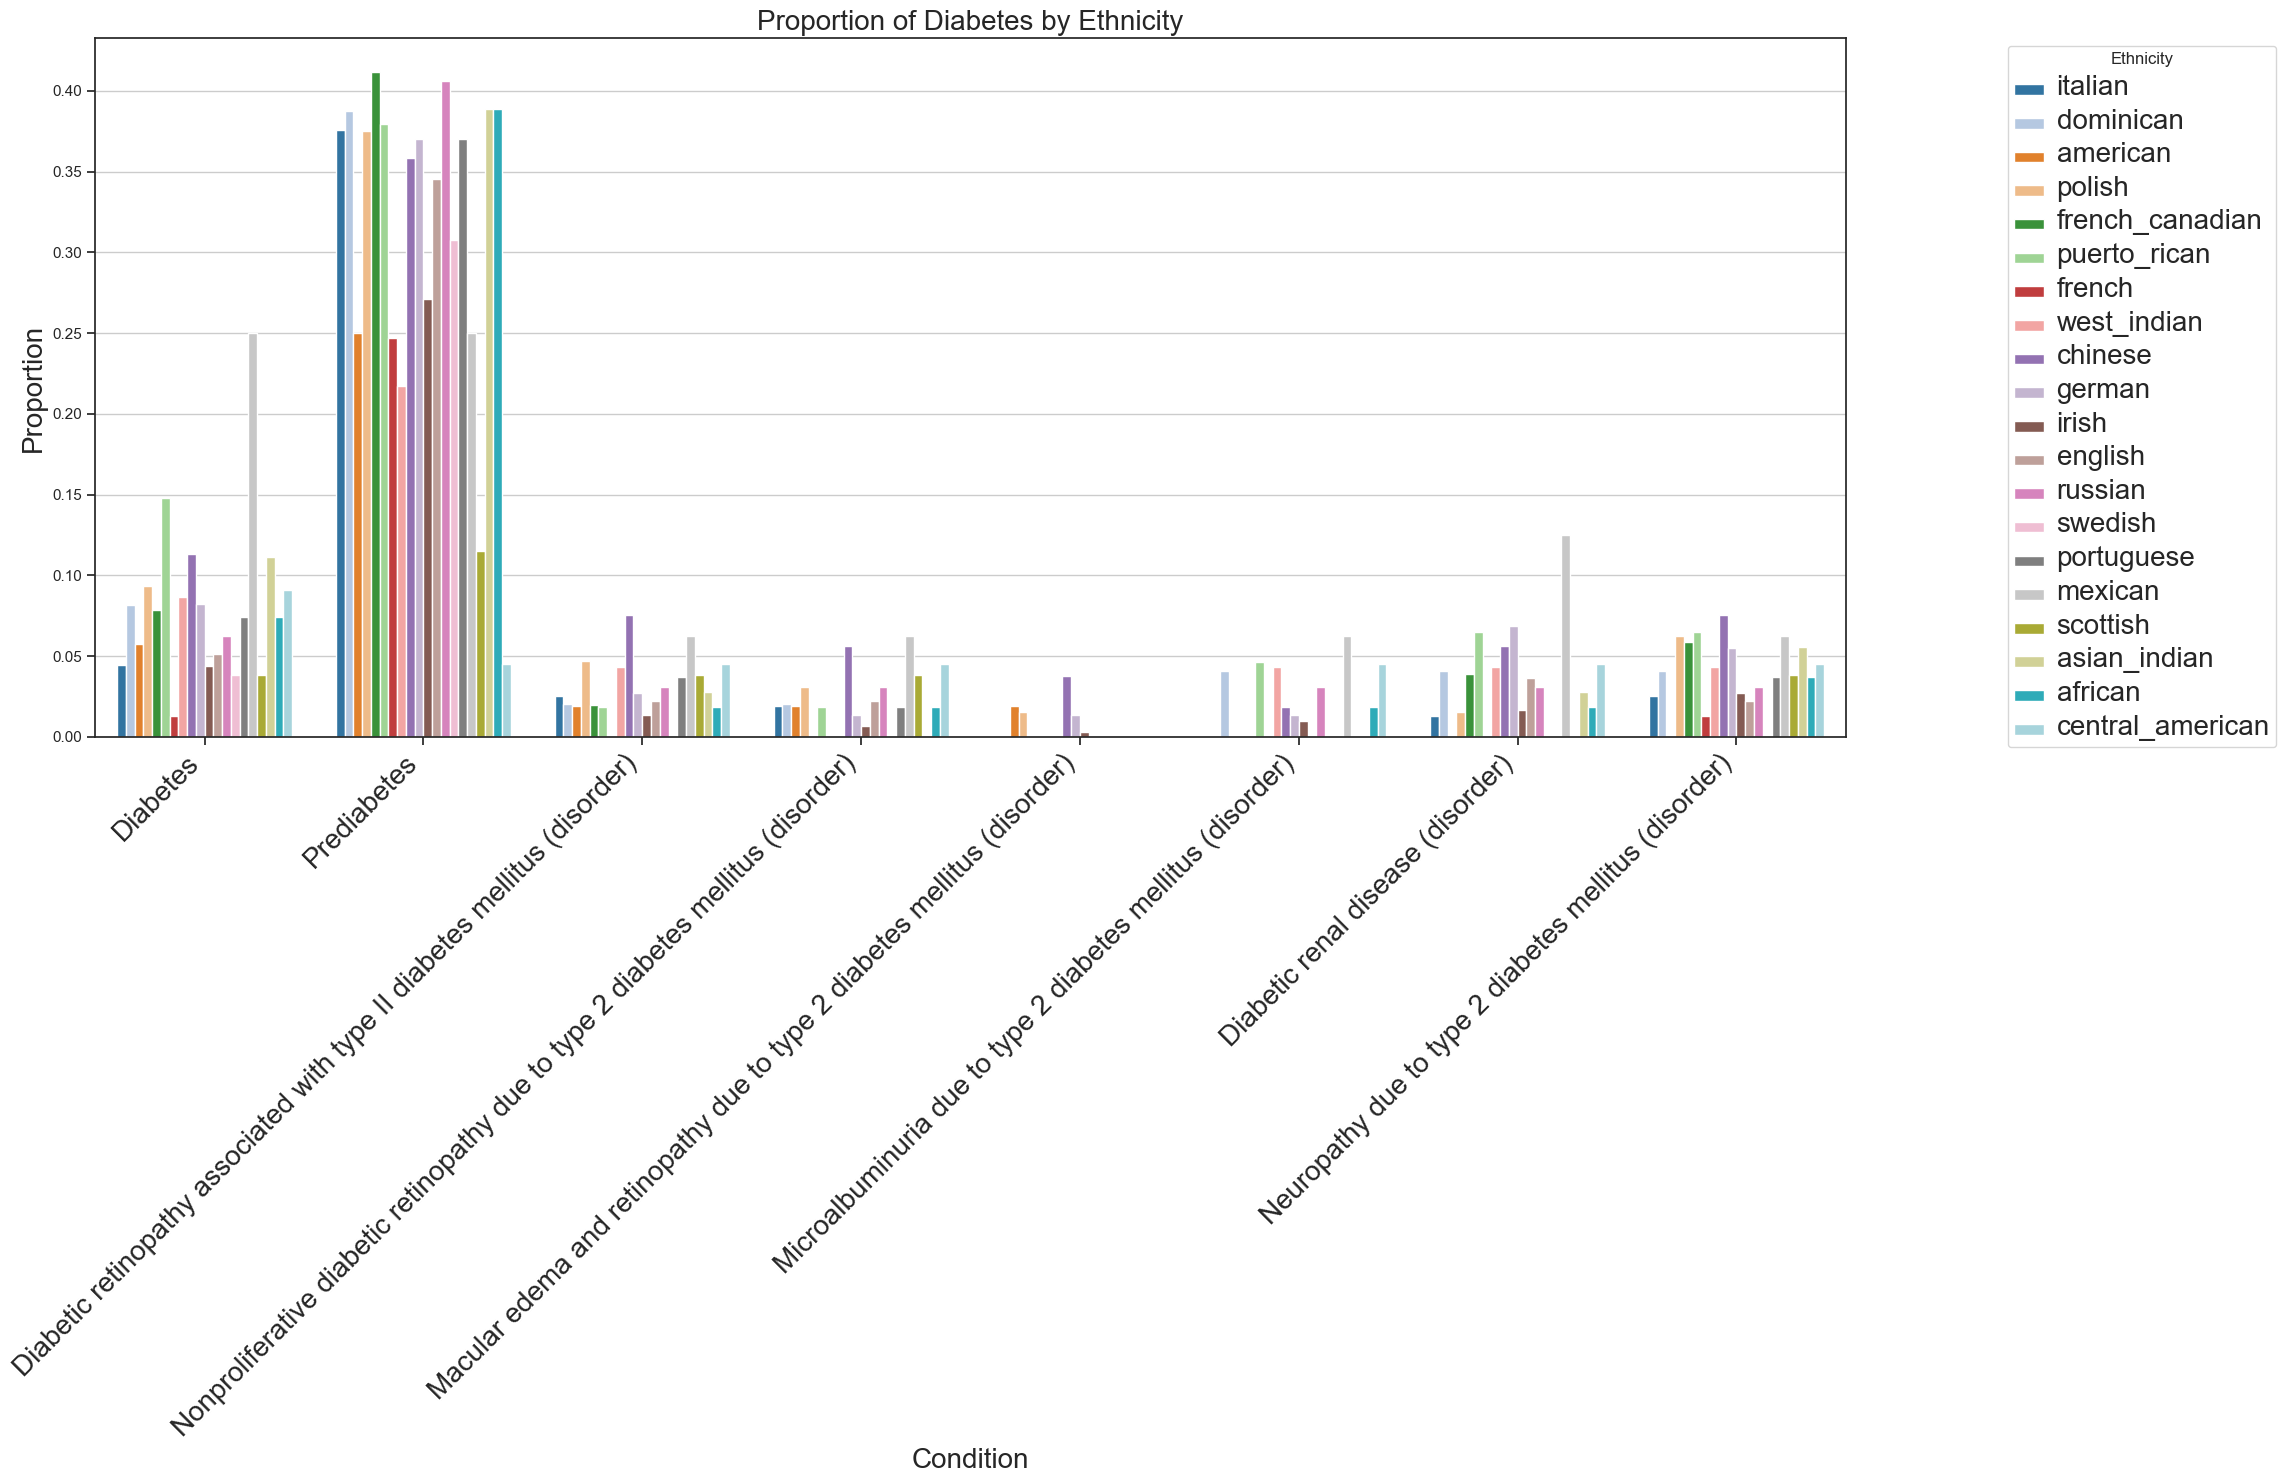

In [88]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in diabetes.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(diabetes, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Diabetes by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

We don't see significant race of ethnicity disparities for the different diabetes conditions.

### DIABETES PREVALENCE BY BIRTHPLACE

In [89]:
condition_columns = [col for col in diabetes.columns if col.endswith('_CONDITIONS')]
conditions_summed = diabetes.groupby('birthplace')[condition_columns].sum().reset_index()
prevdatadiab = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdatadiab[f'prevalence_{condition_column}'] = prevdatadiab[condition_column] / prevdatadiab['pop']

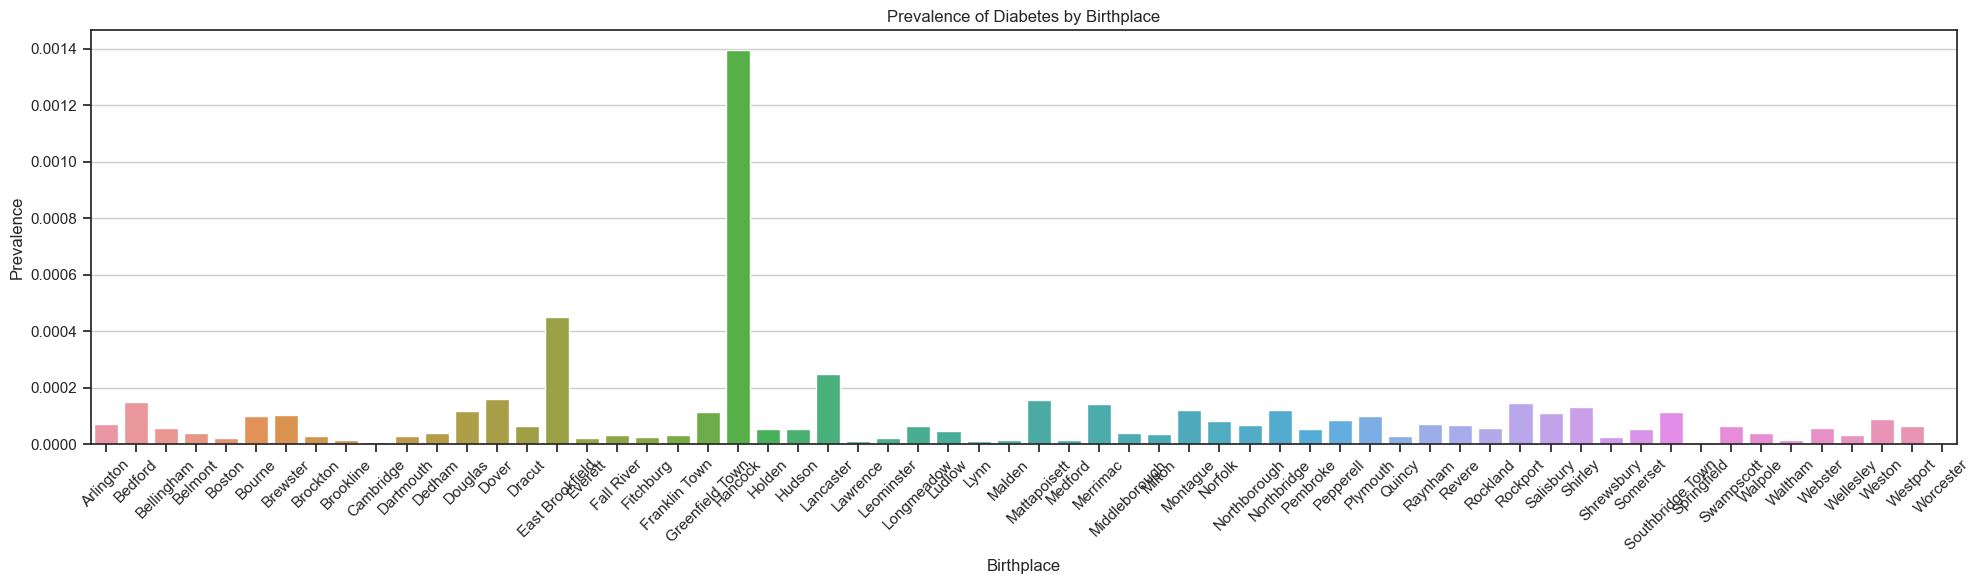

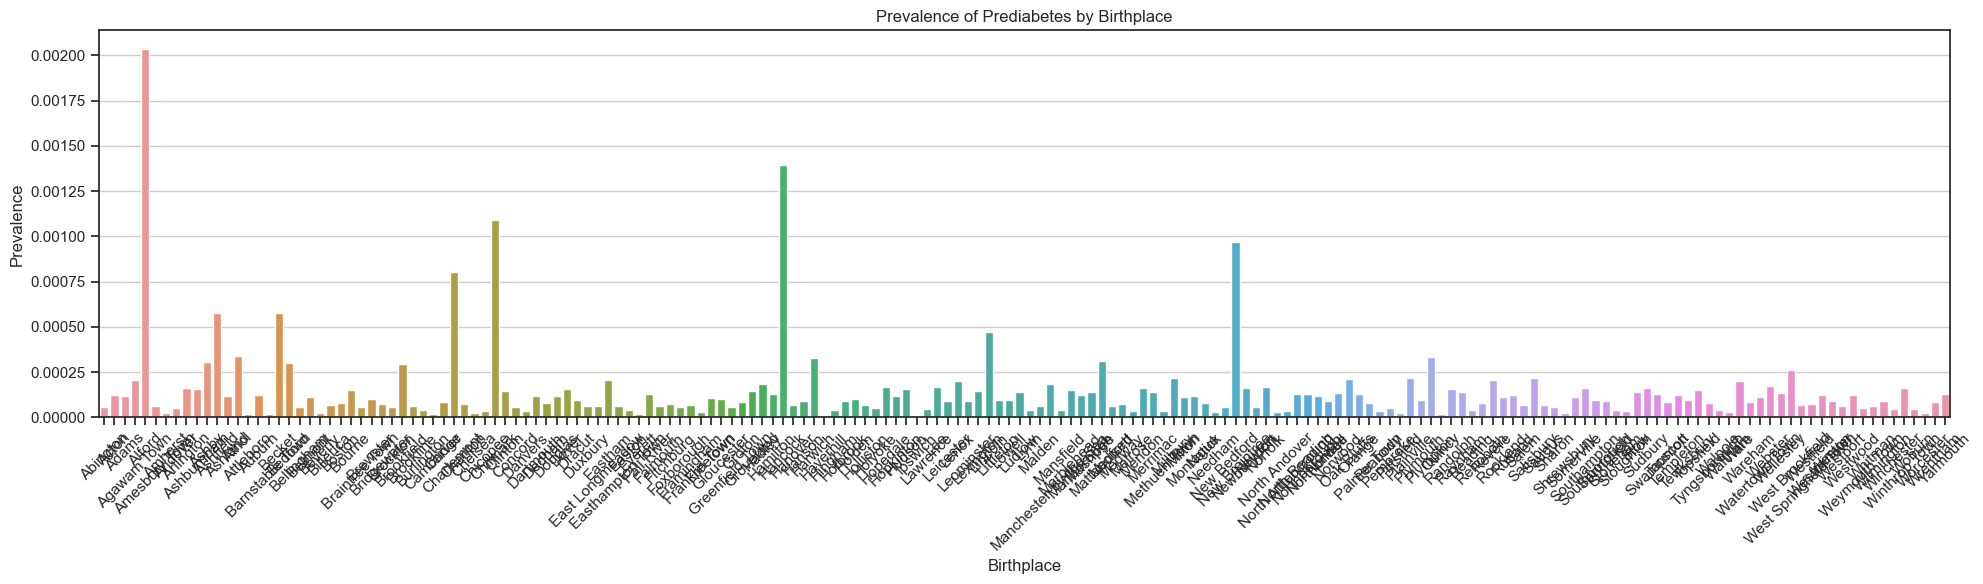

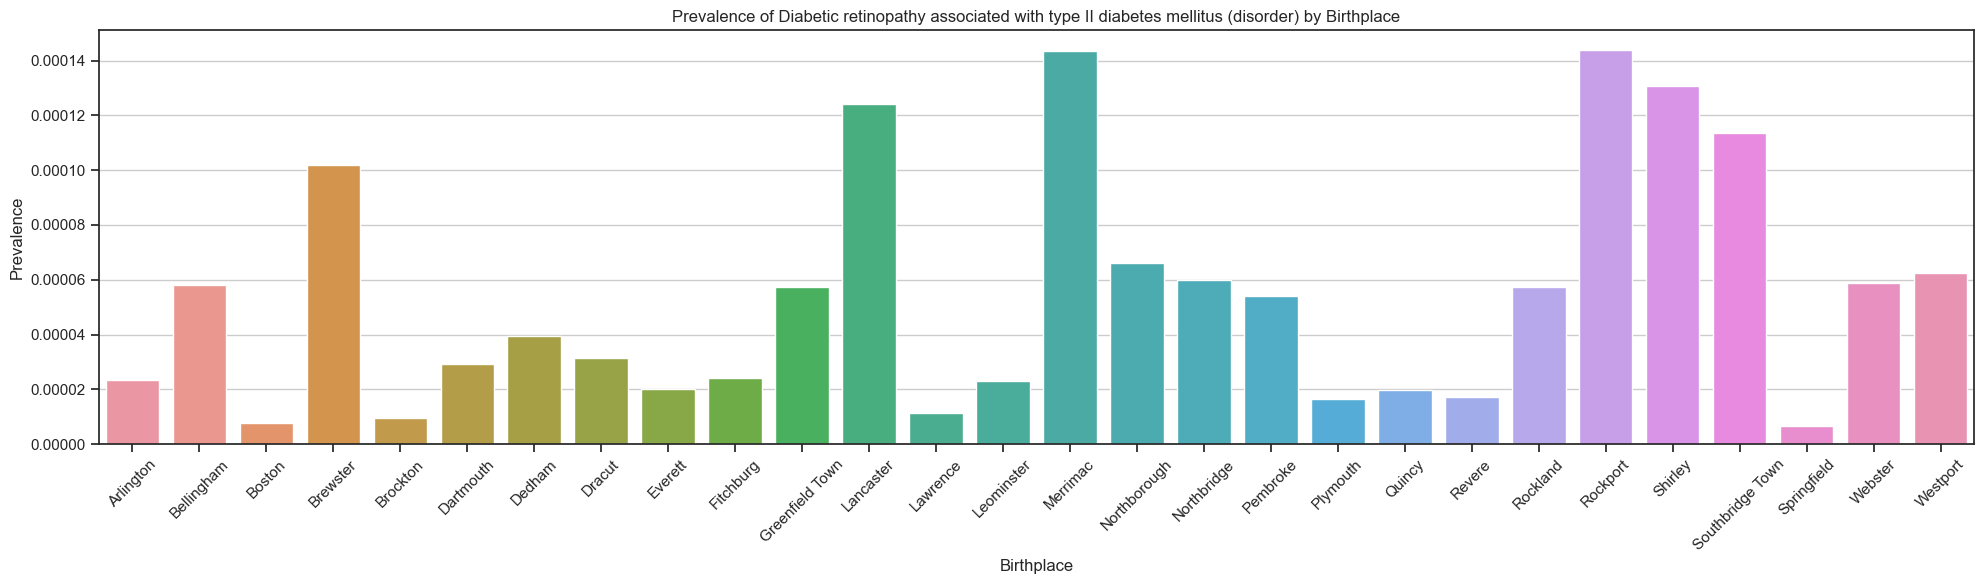

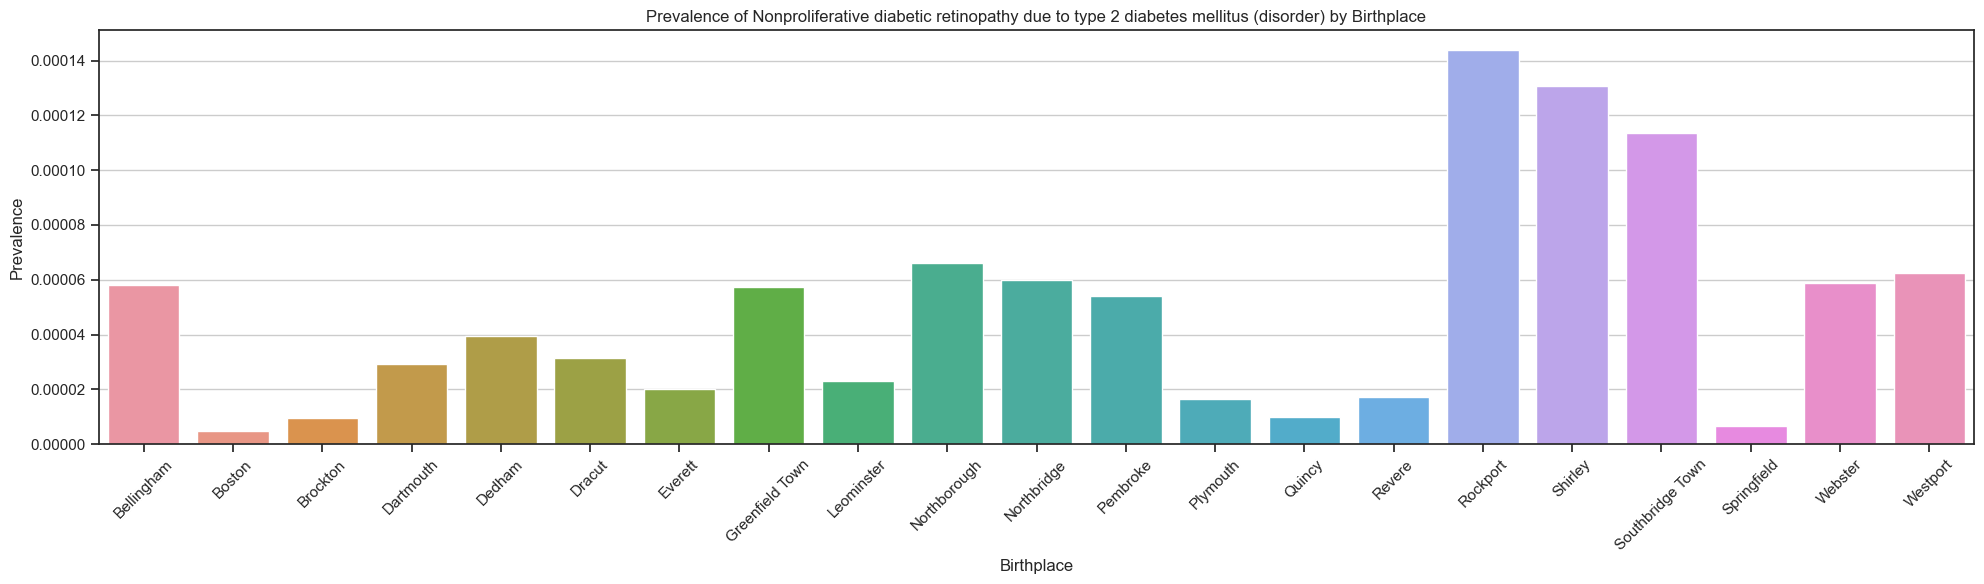

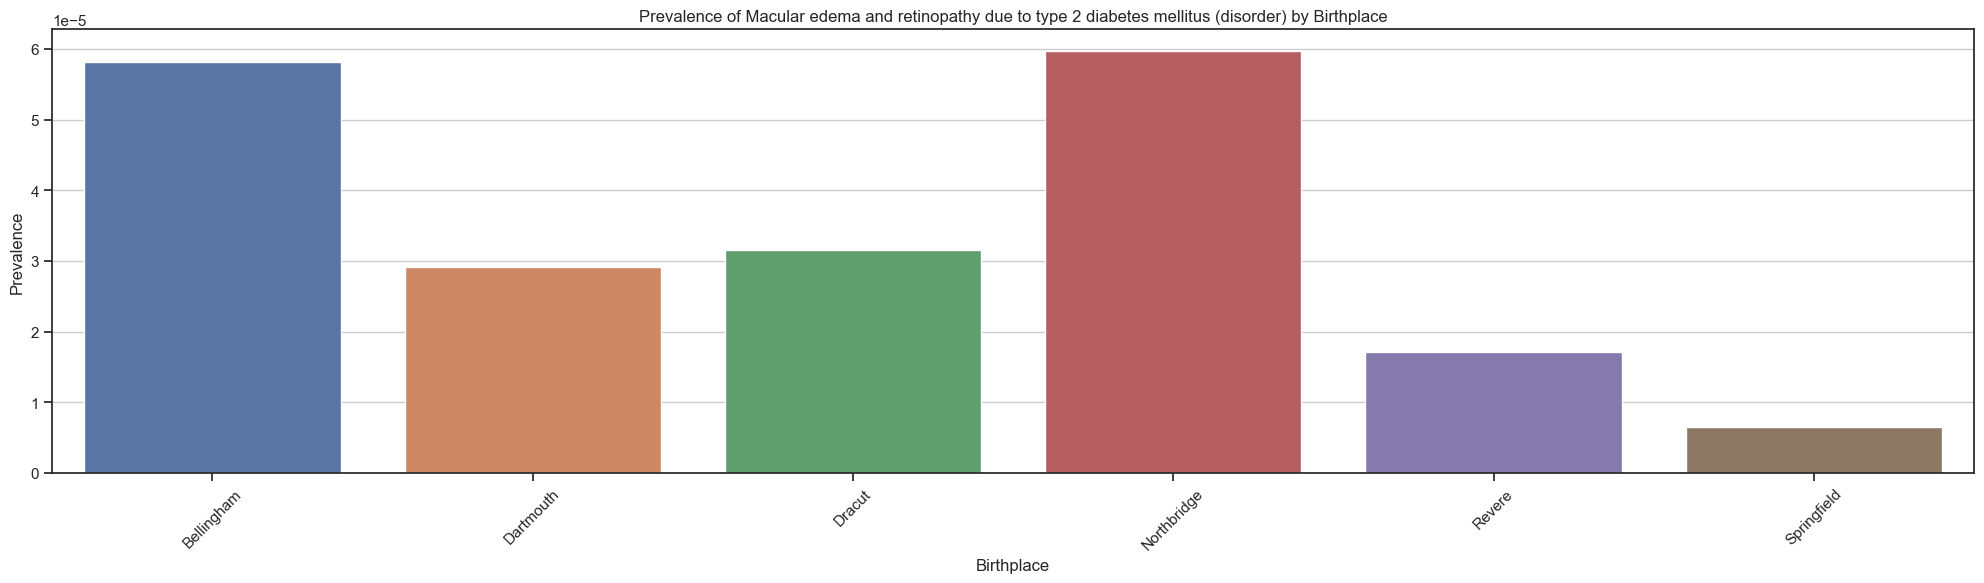

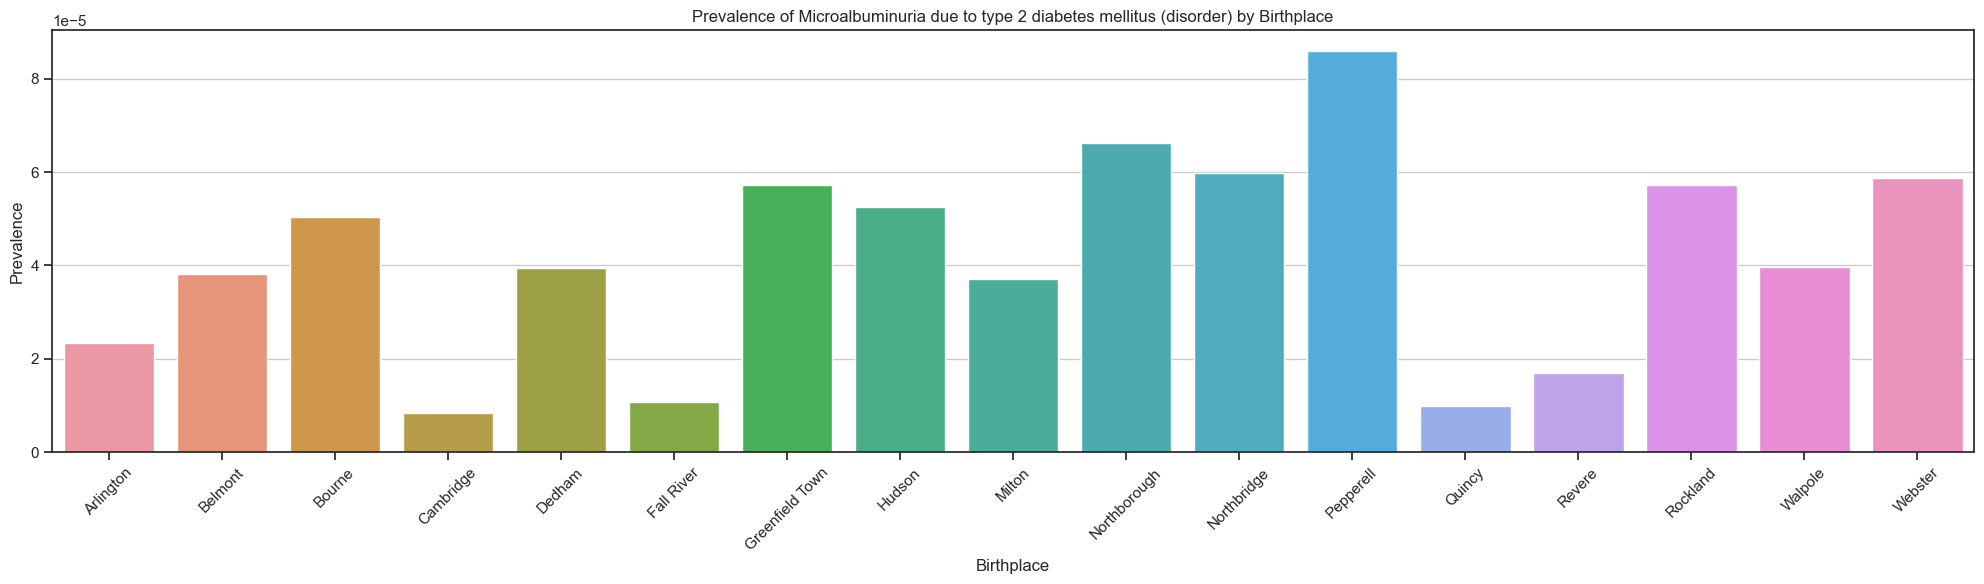

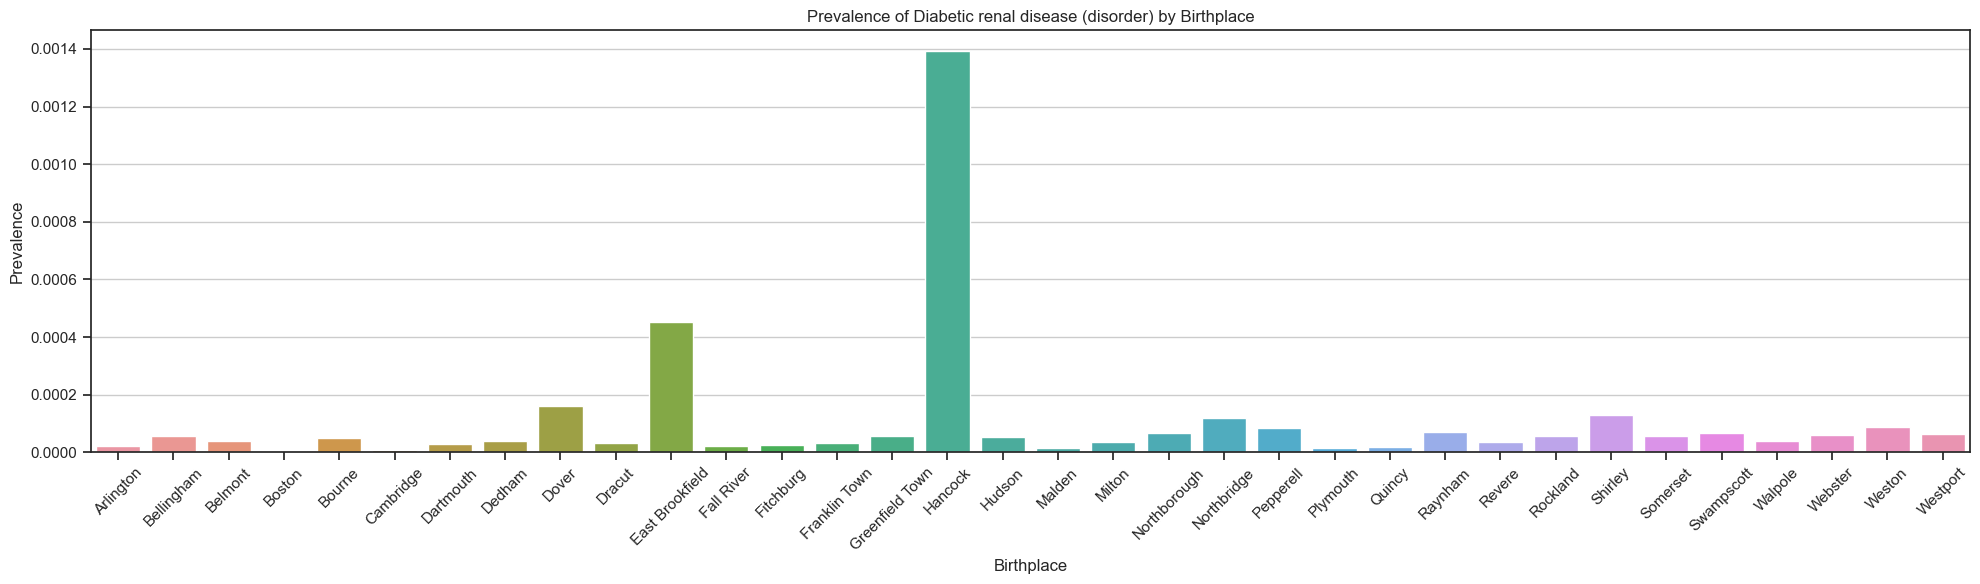

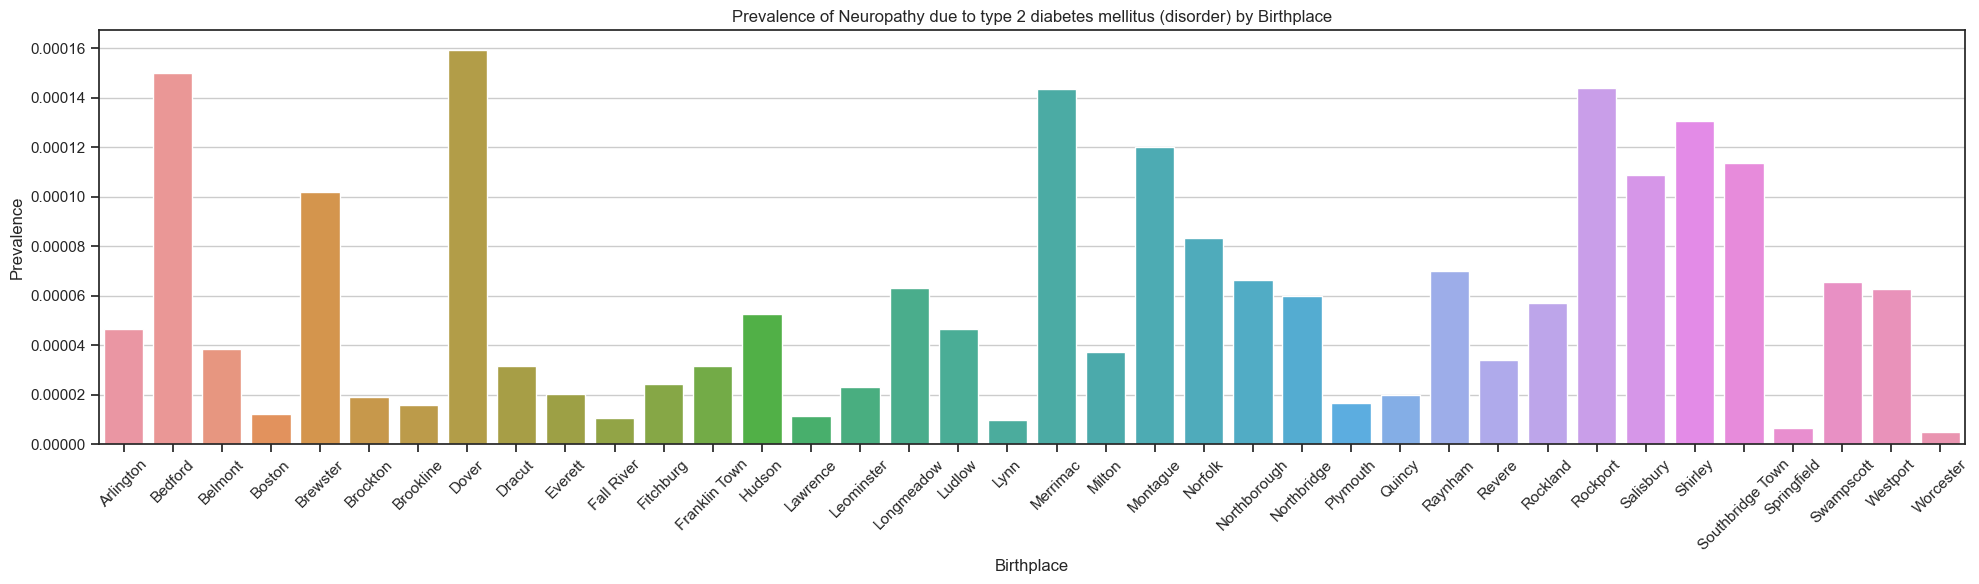

In [90]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdatadiab[prevdatadiab[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Here there is a mix of some towns dominating prevelance, and some diabetes cormorbidities being generally quite rare.

## Cardiovascular Diseases EDA

### CARDIOVASCULAR DISEASES BY RACE

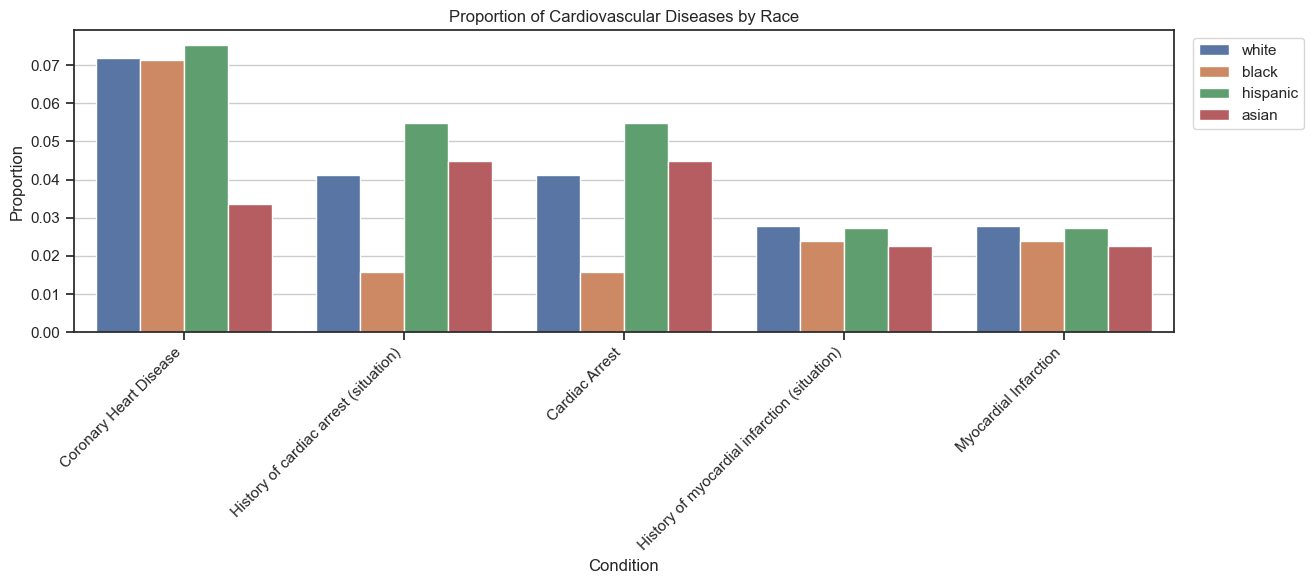

In [91]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in heart.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(heart, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Cardiovascular Diseases by Race')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.show()

Hispanic patients seem slightly more common in our heart condition dataset.

### CARDIOVASCULAR DISEASES BY ETHNICITY

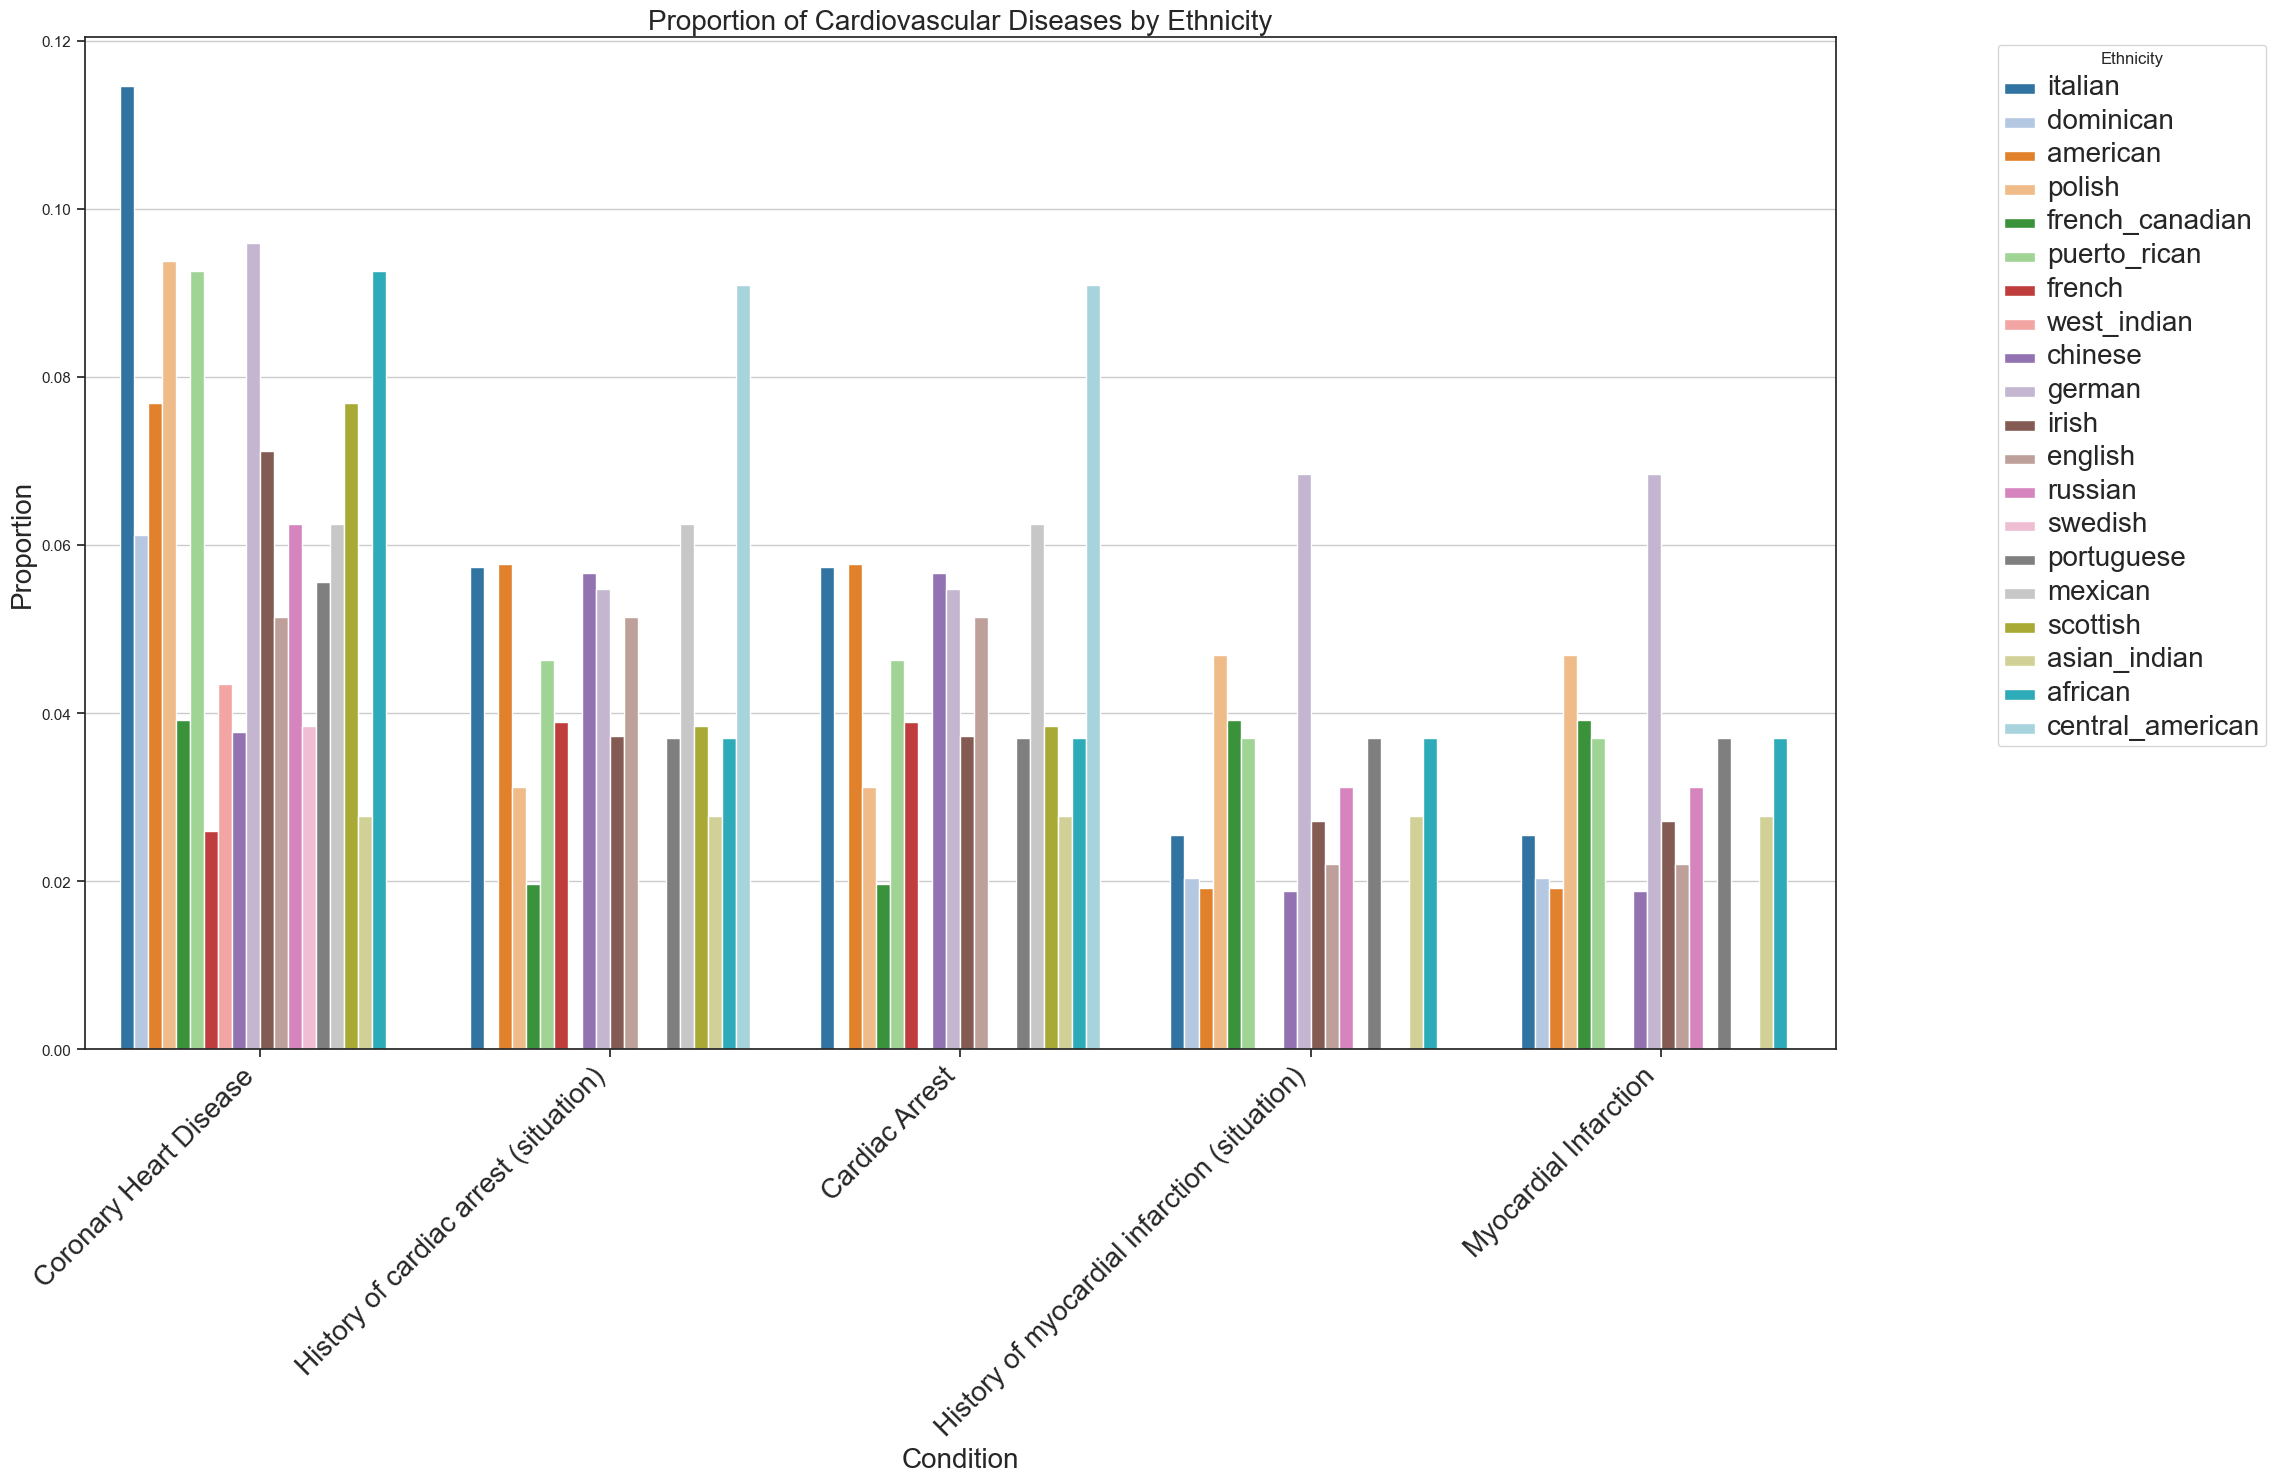

In [92]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in heart.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(heart, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Cardiovascular Diseases by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

### CARDIOVASCULAR DISEASE PREVALENCE BY BIRTHPLACE

In [93]:
condition_columns = [col for col in heart.columns if col.endswith('_CONDITIONS')]
conditions_summed = heart.groupby('birthplace')[condition_columns].sum().reset_index()
prevdataheart = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdataheart[f'prevalence_{condition_column}'] = prevdataheart[condition_column] / prevdataheart['pop']

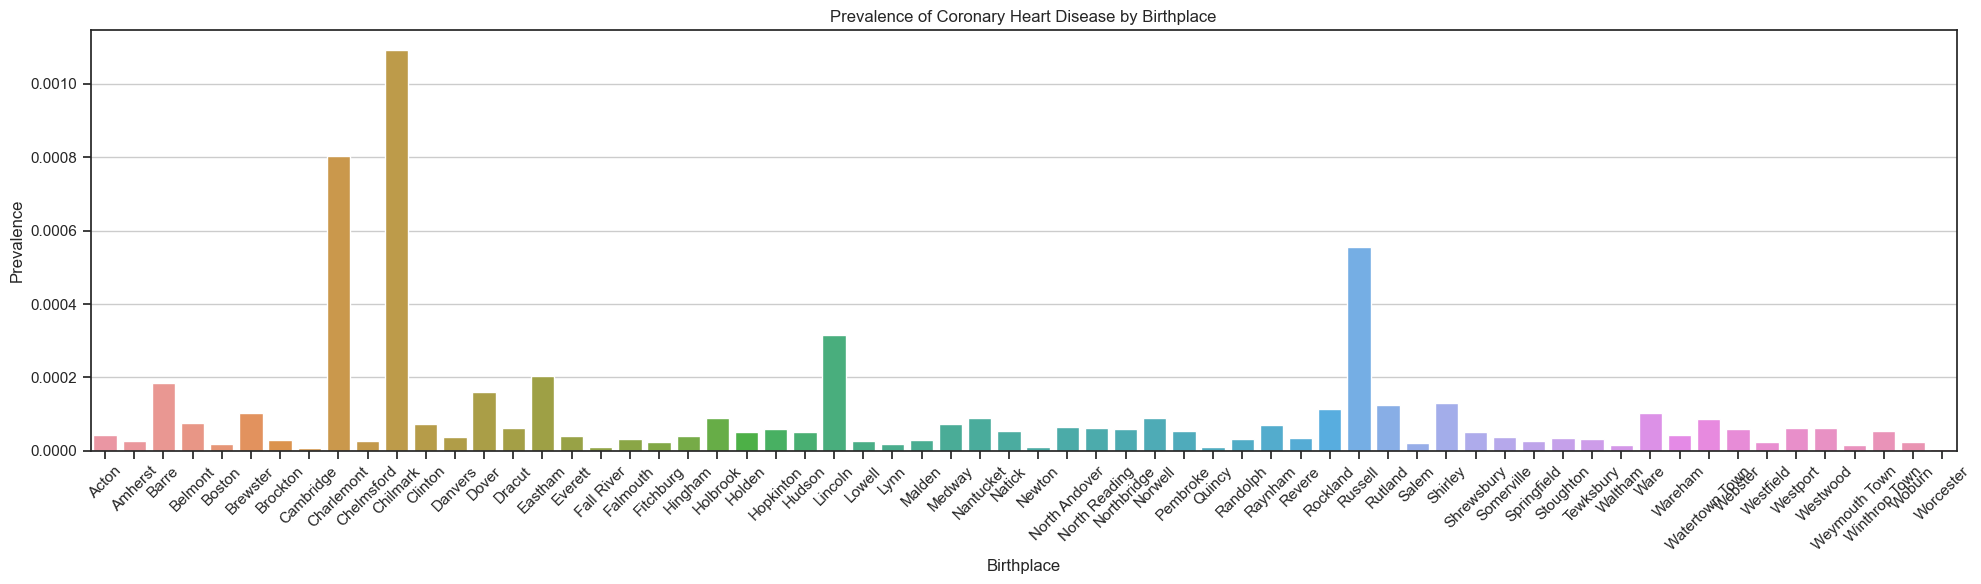

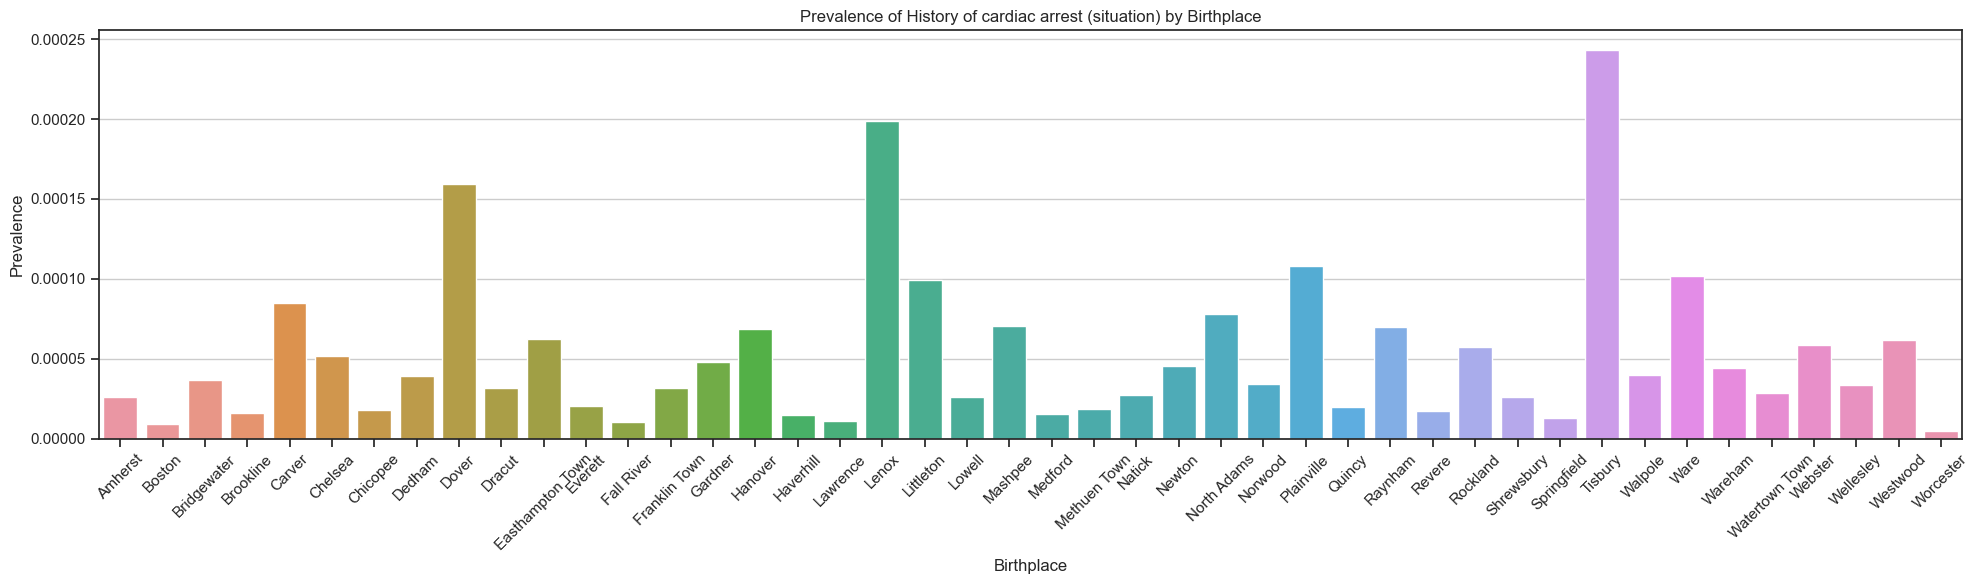

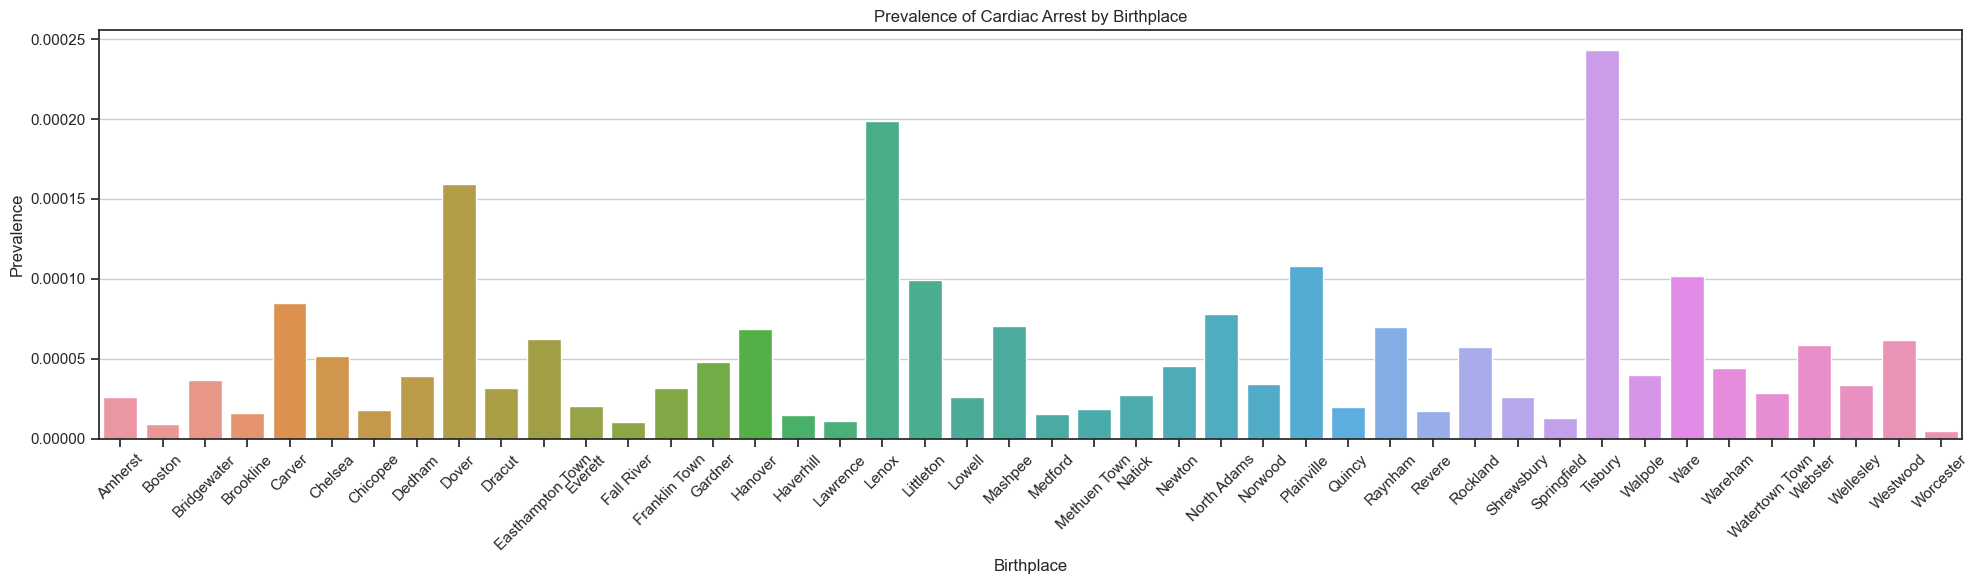

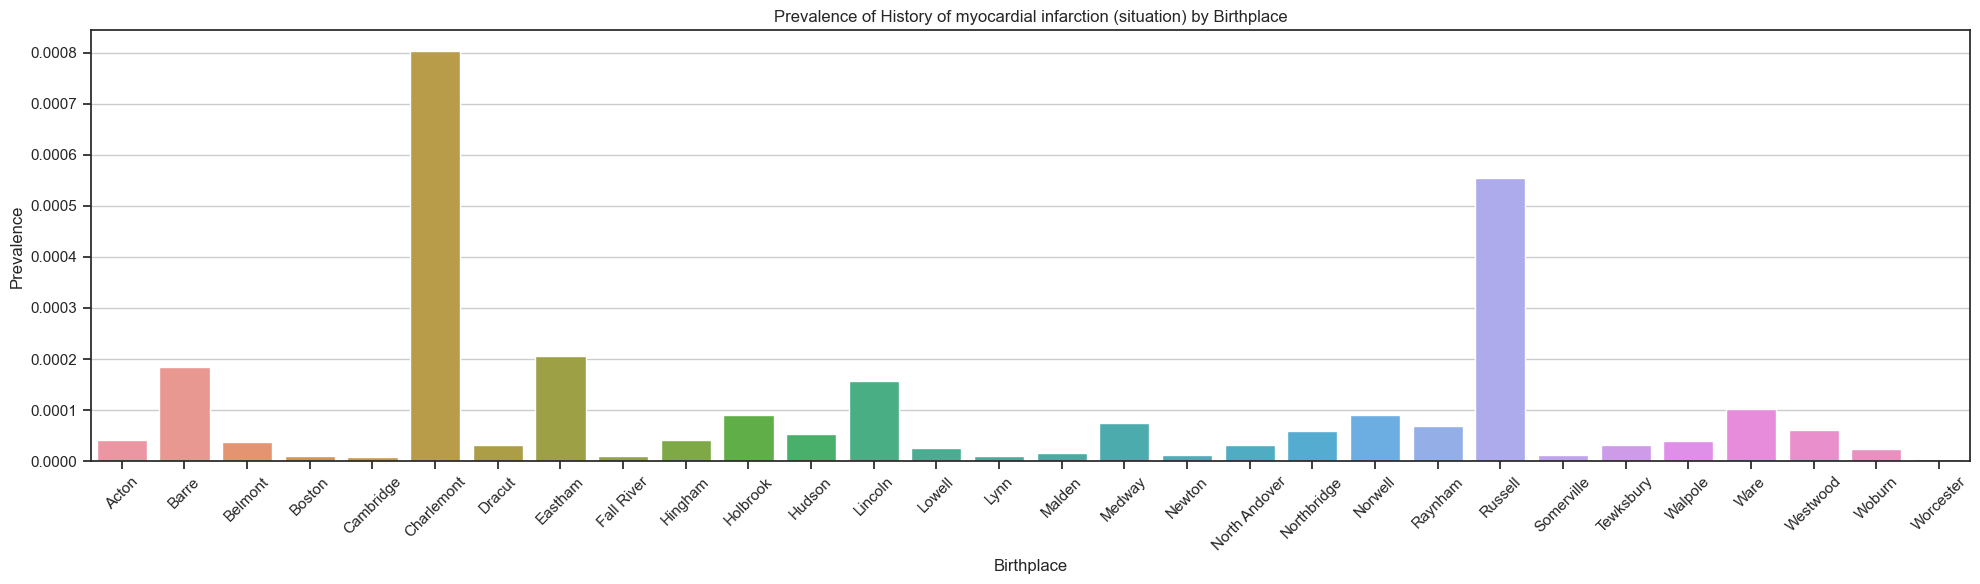

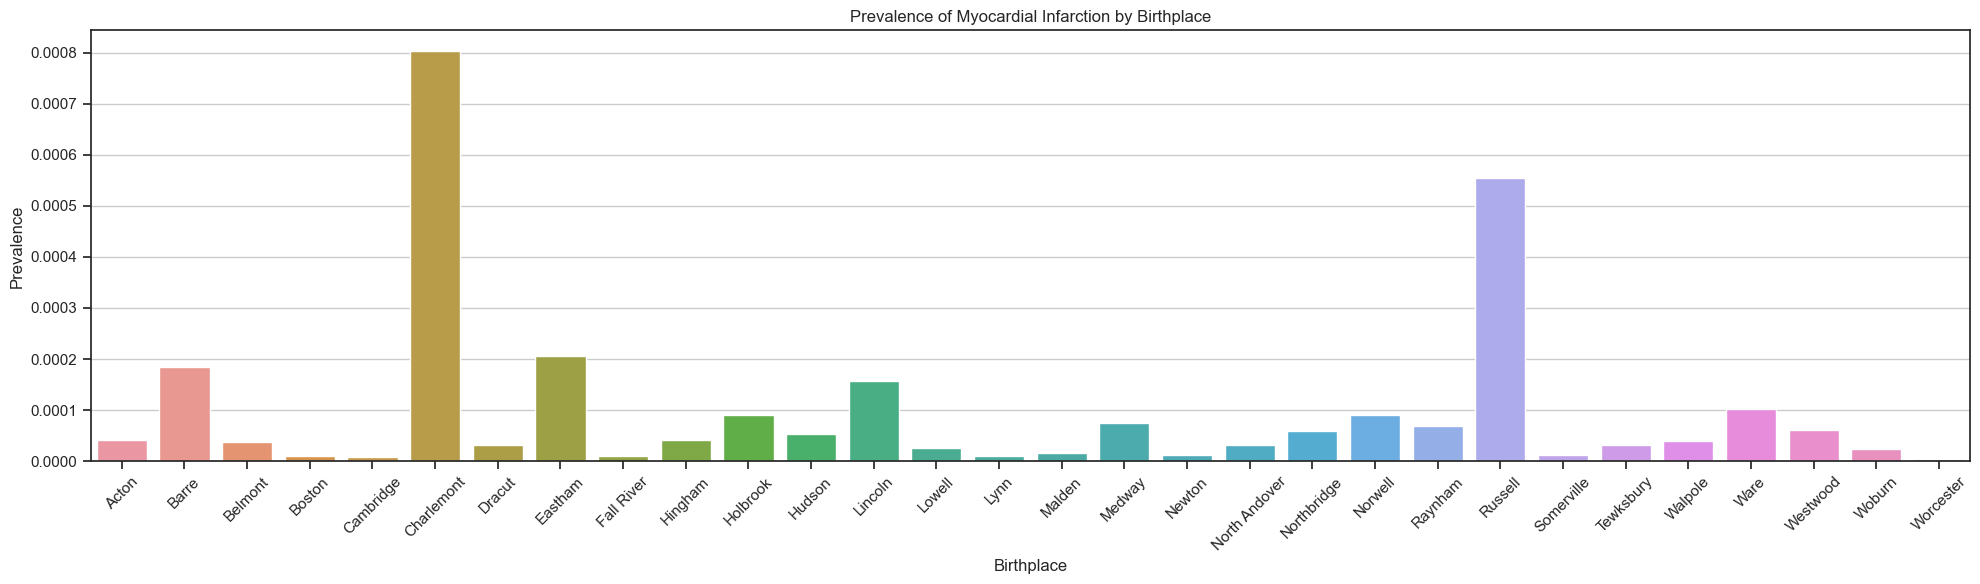

In [94]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdataheart[prevdataheart[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Charlemont and Russell seem to stand out with high levels of heart defects, [with a wealth rating of 306 and 280 out of 341 respectively](https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income).

## Pregnancy Complicationsn EDA

### PREGNANCY COMPLICATIONS BY RACE

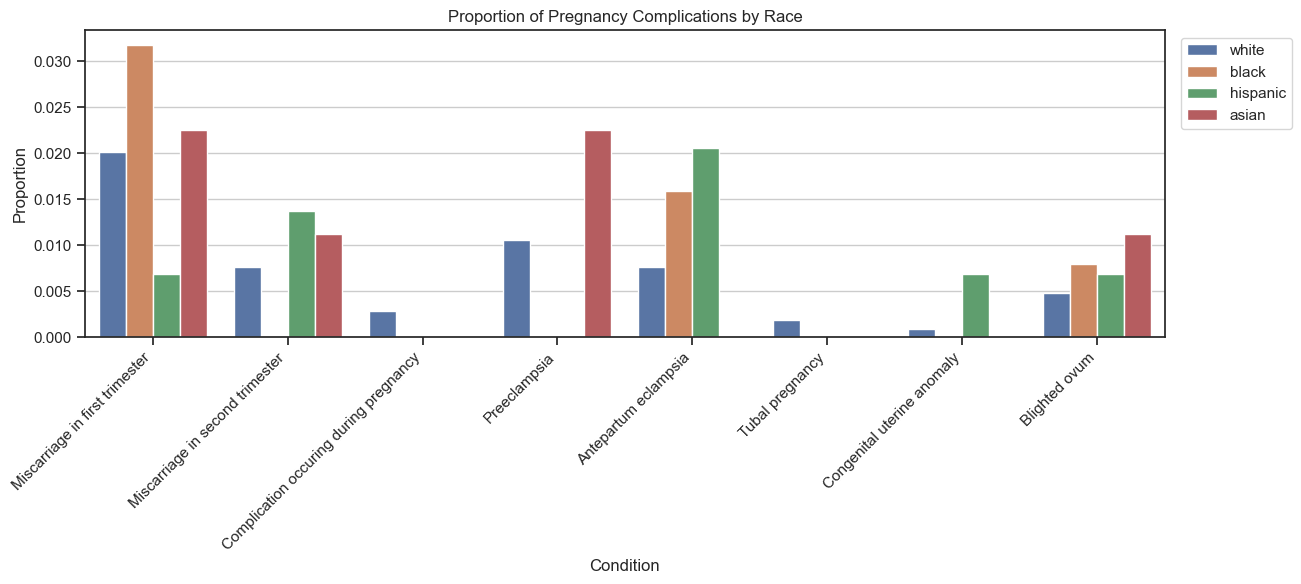

In [95]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in pregnancy.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(pregnancy, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Pregnancy Complications by Race')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.show()

Generally non-white patients seem to have generally higher risks here.

### PREGNANCY COMPLICATIONS BY ETHNICITY

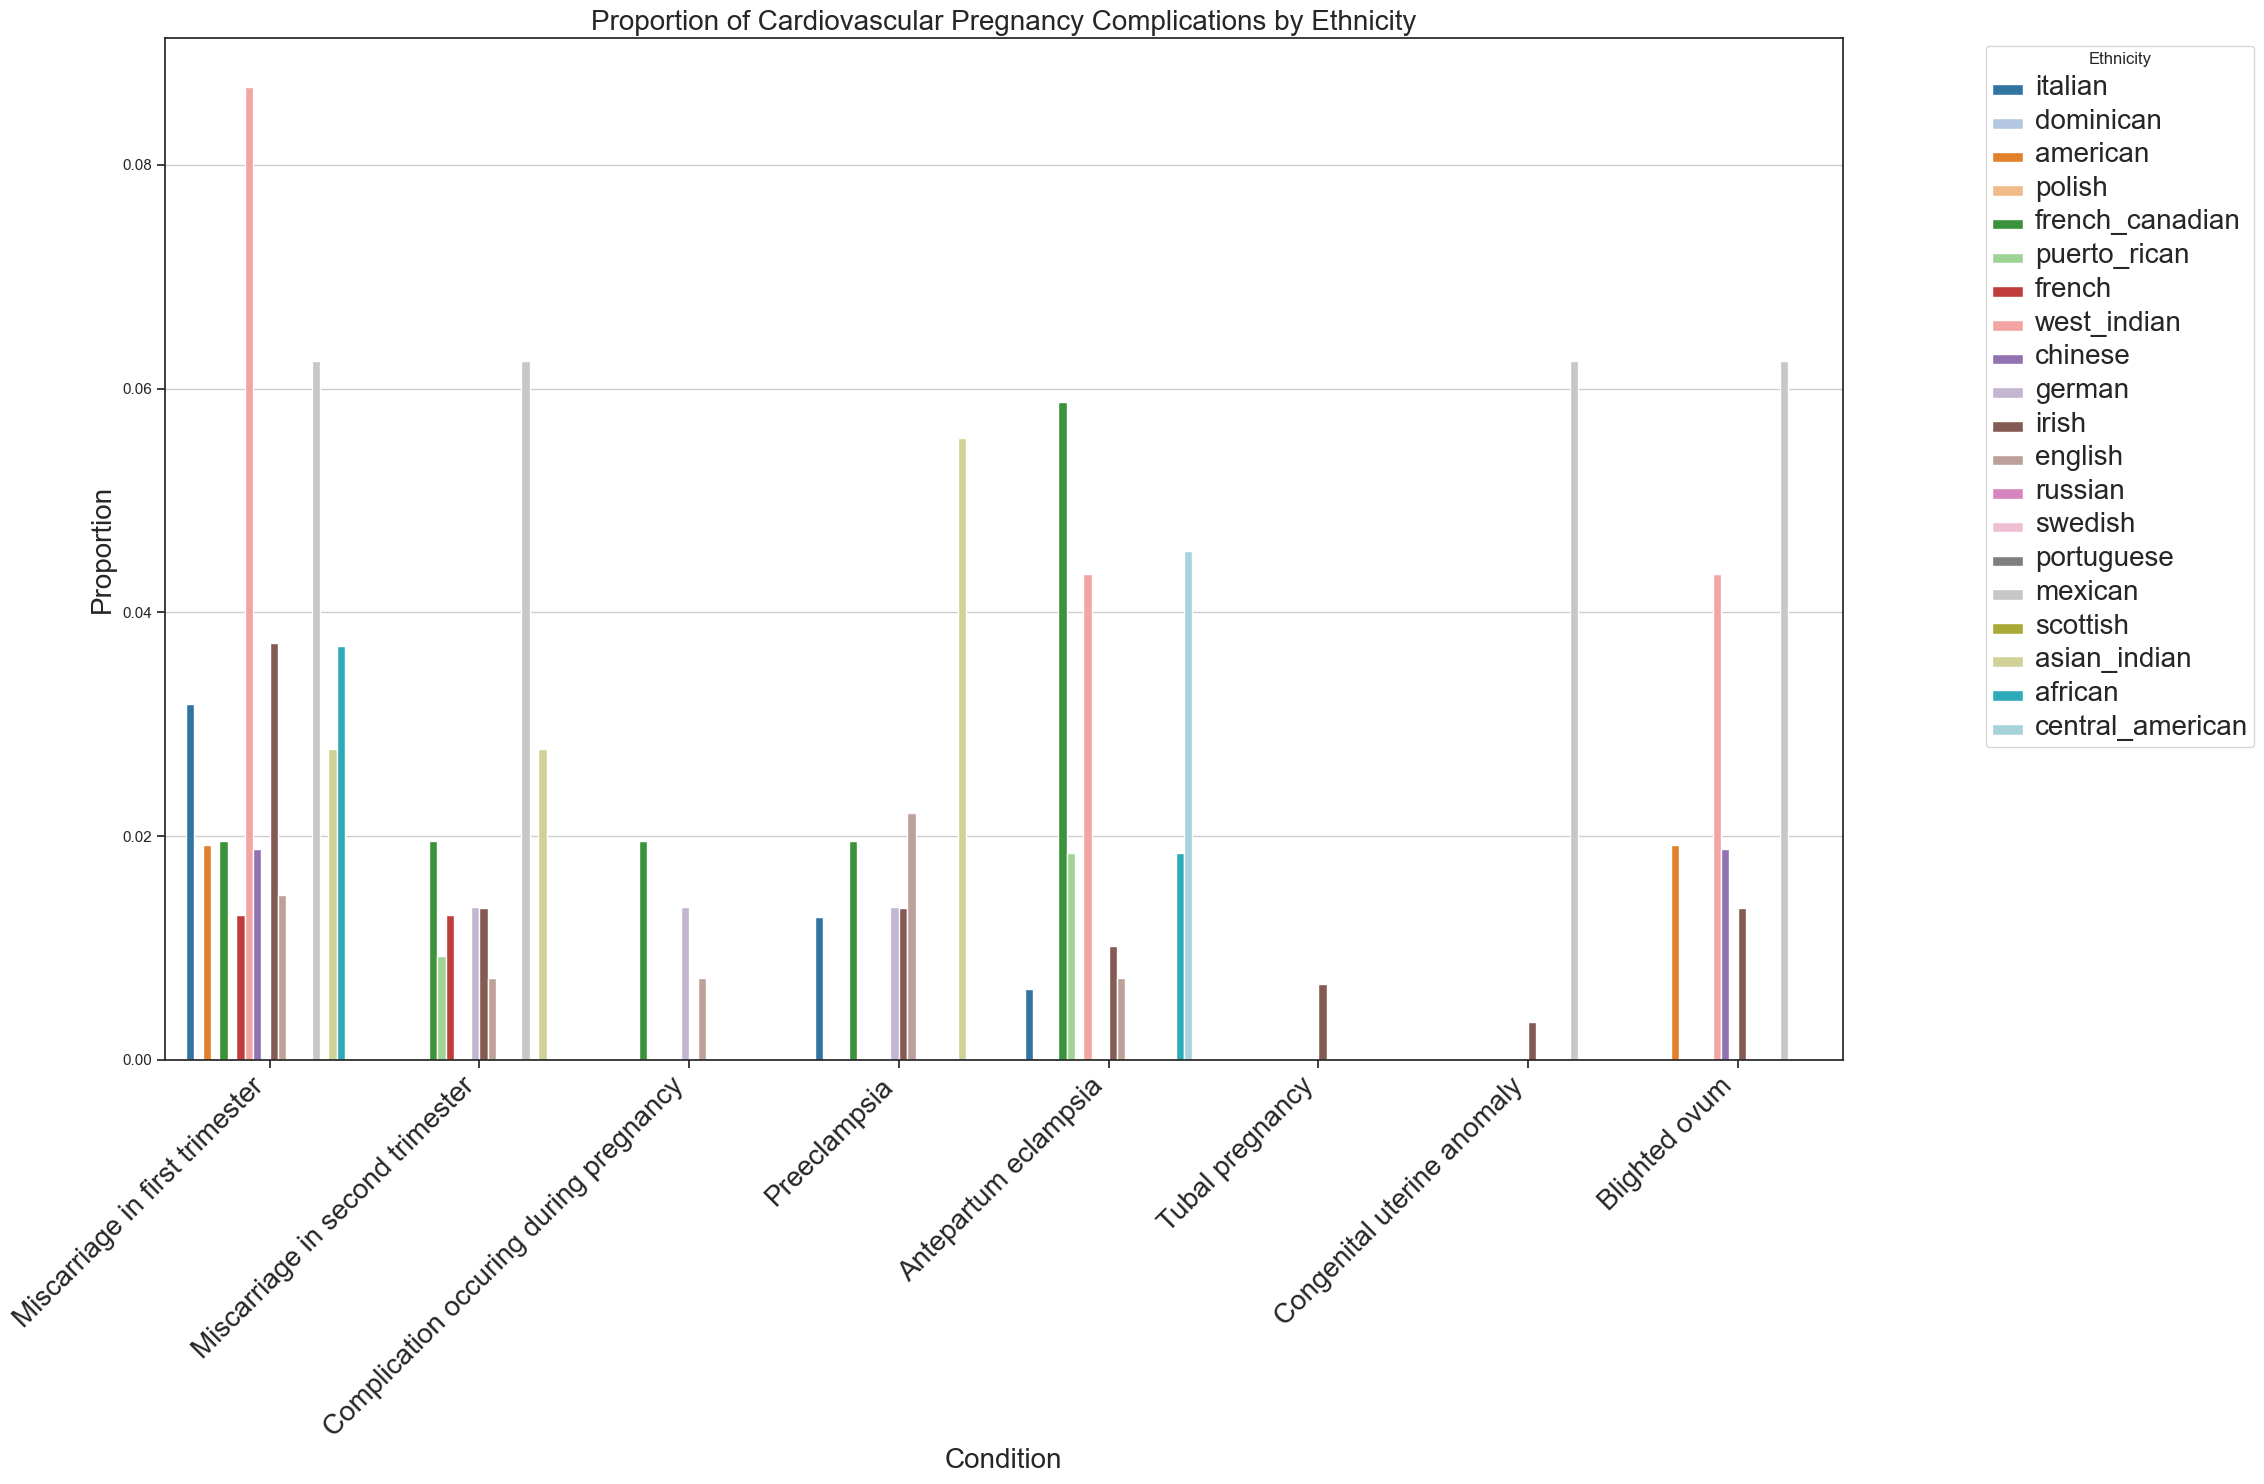

In [96]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in pregnancy.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(pregnancy, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Cardiovascular Pregnancy Complications by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

West-Indian patients seem to dominate a few of these conditions.

### PREGNANCY COMPLICATIONS BY BIRTHPLACE

In [97]:
condition_columns = [col for col in pregnancy.columns if col.endswith('_CONDITIONS')]
conditions_summed = pregnancy.groupby('birthplace')[condition_columns].sum().reset_index()
prevdatapreg = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdatapreg[f'prevalence_{condition_column}'] = prevdatapreg[condition_column] / prevdatapreg['pop']

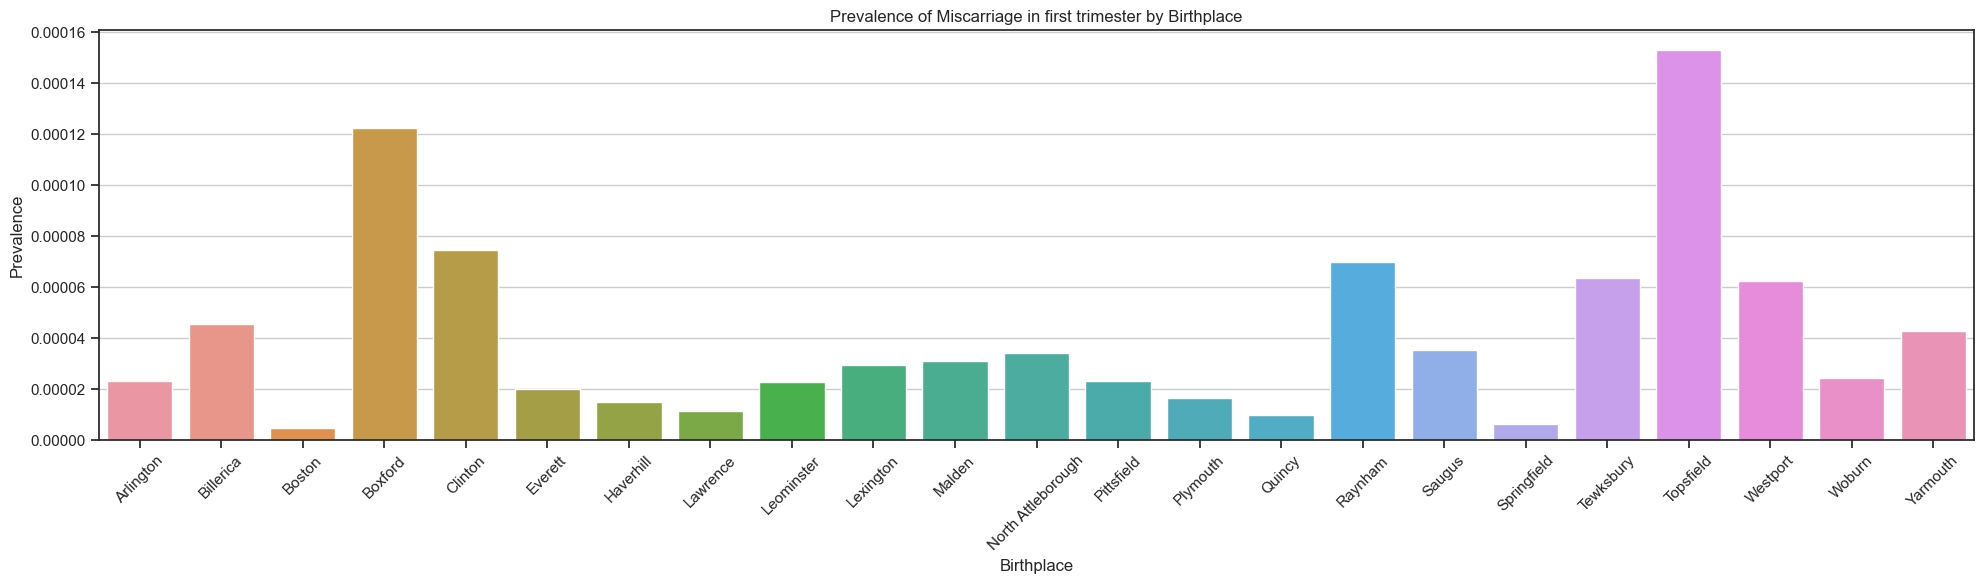

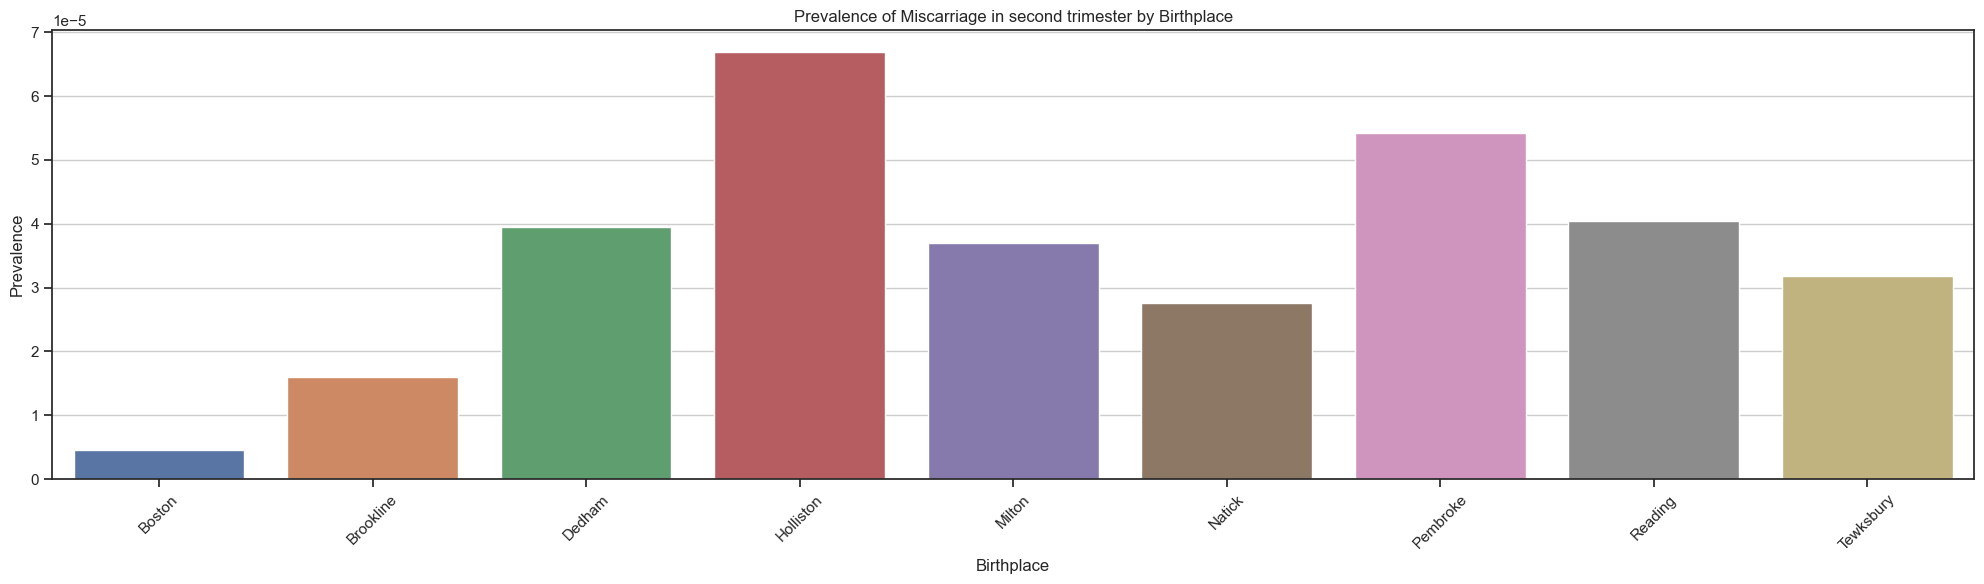

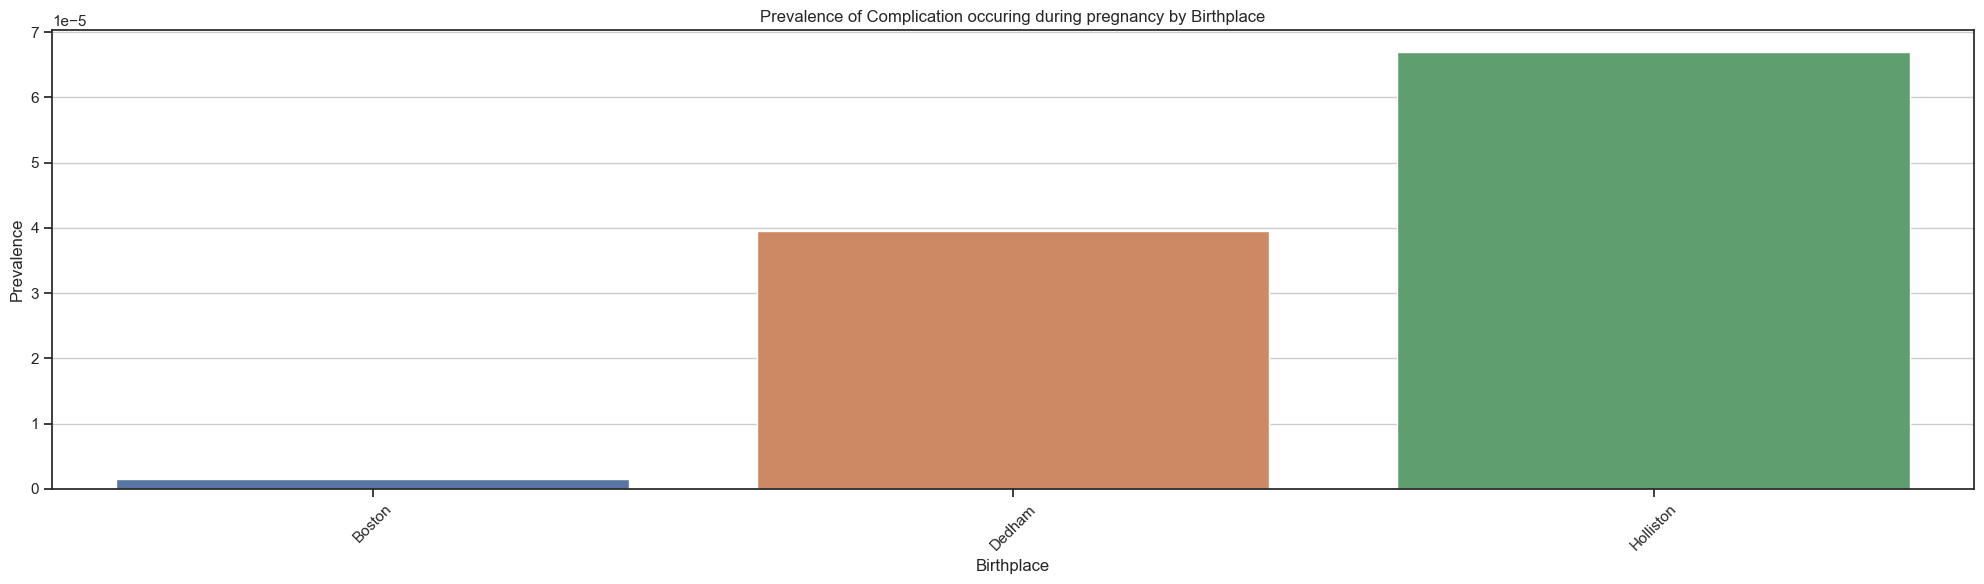

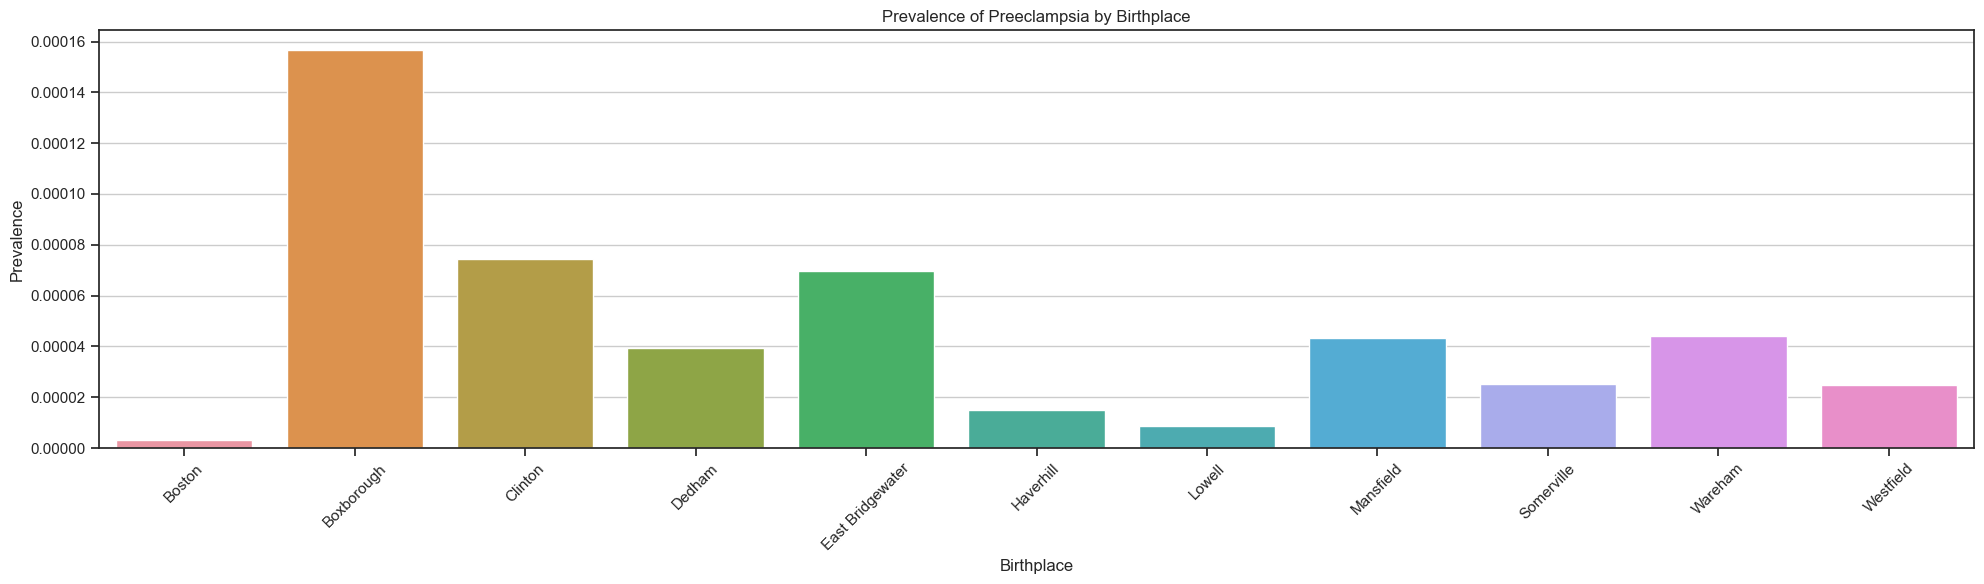

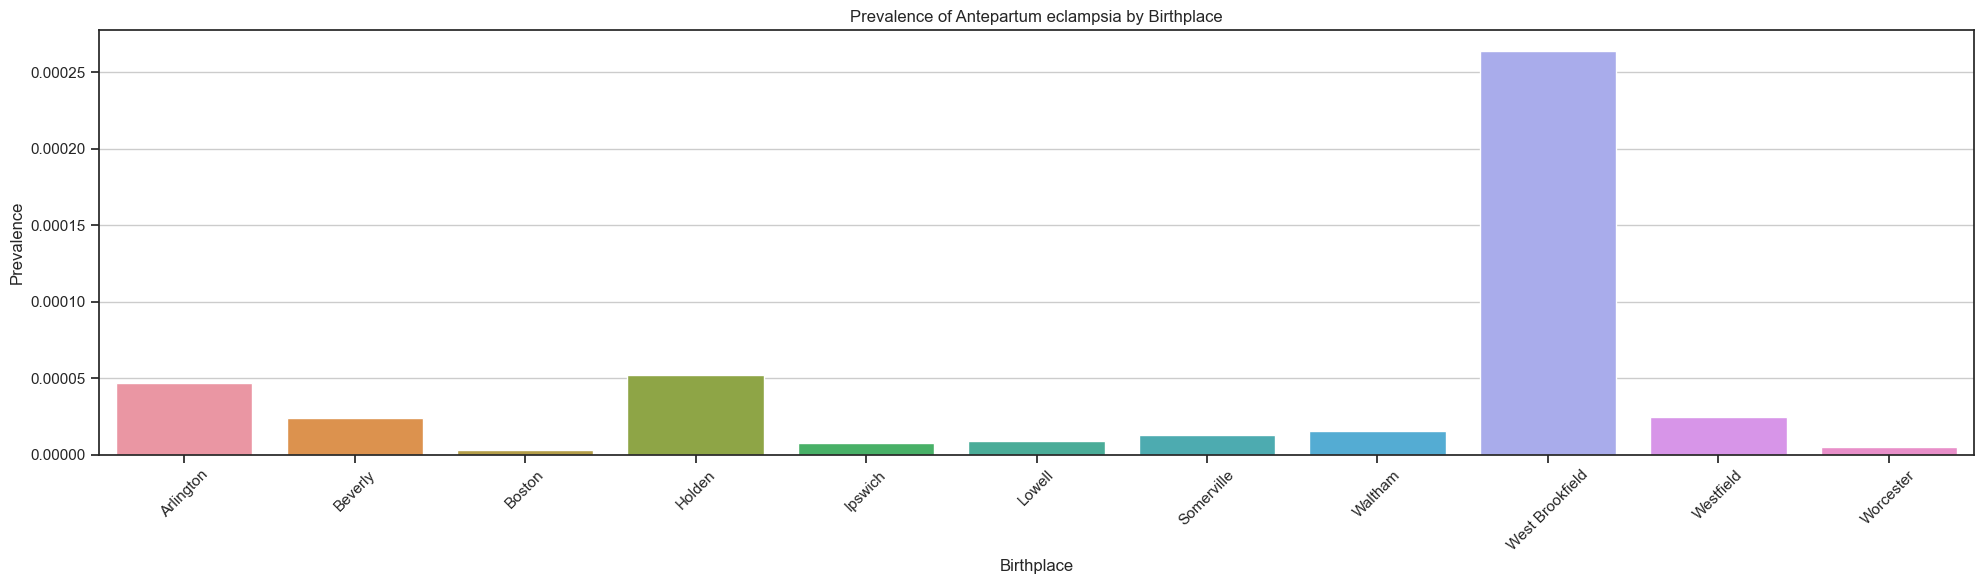

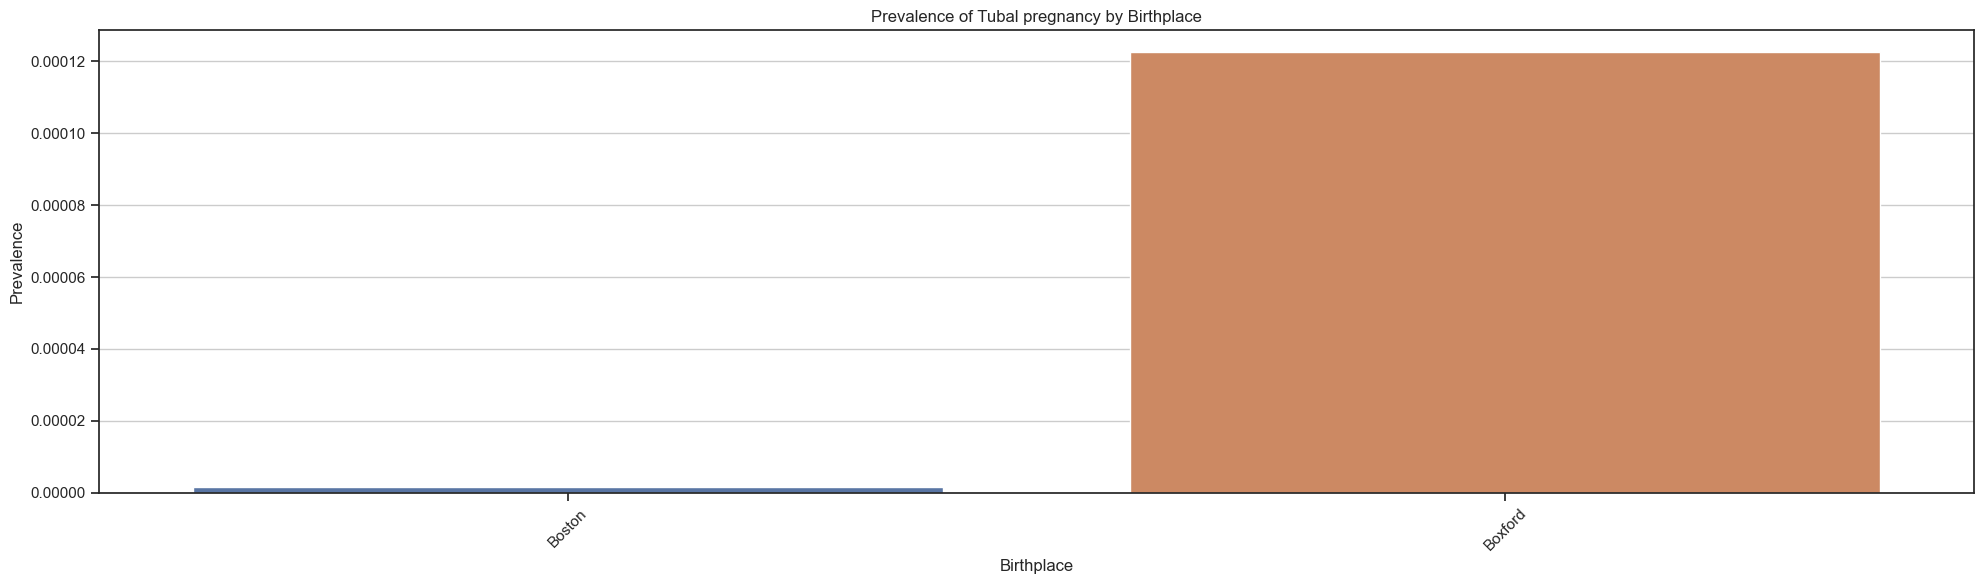

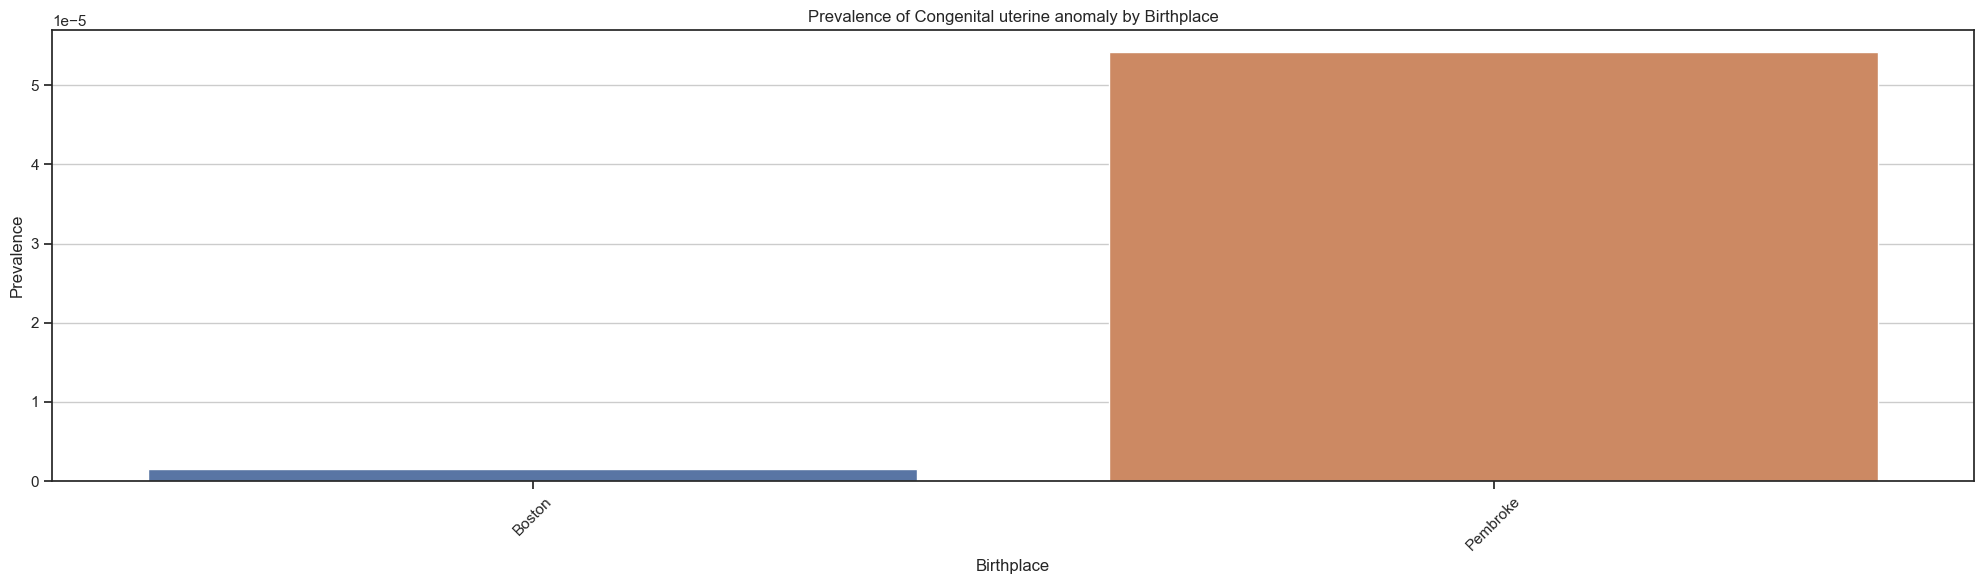

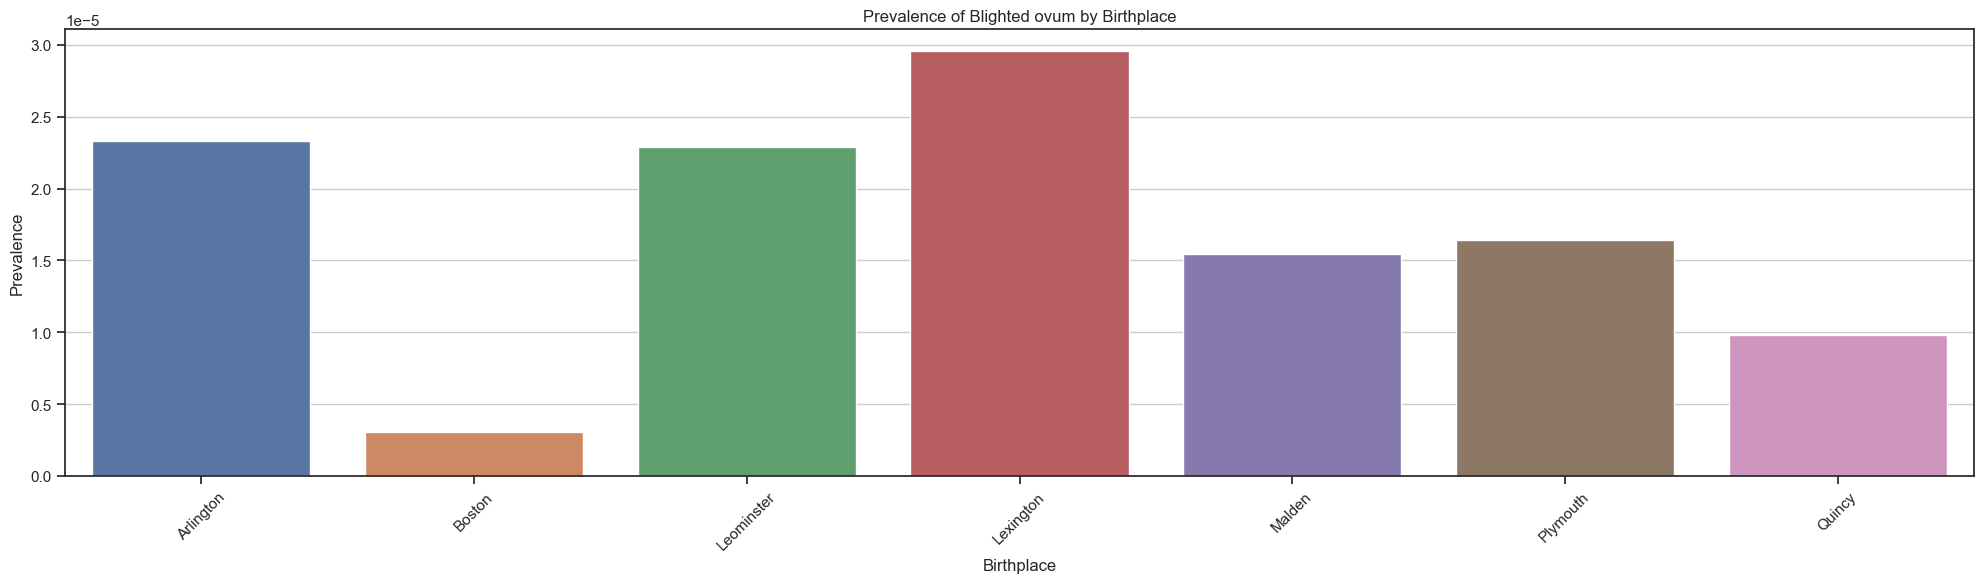

In [98]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdatapreg[prevdatapreg[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For many here as well there are few towns reporting incidents of these conditions, which could make analysis harder in terms of generalizing trends.